In [ ]:
!pip3 install qiskit
!pip3 install pylatexenc

In [ ]:
!pip3 show sympy

In [ ]:
!pip3 uninstall sympy -y
!pip3 install sympy

In [6]:
#!rm -r ~/.qiskit/
!mkdir ~/.qiskit/
!touch ~/.qiskit/settings.conf
!printf "[default]\ncircuit_drawer = mpl" > ~/.qiskit/settings.conf

In [2]:
from qiskit import QuantumCircuit, Aer, assemble, transpile
from qiskit.extensions import UnitaryGate
from qiskit.visualization import plot_histogram


import sympy as smp
import numpy as np
from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.dagger import Dagger

In [4]:
# Sympy arrays
I = smp.Matrix([[1,0], [0,1]])
X = smp.Matrix([[0,1],[1,0]])
Z = smp.Matrix([[1, 0],[0, -1]])
Y = smp.Matrix([[0,-smp.I],[smp.I,0]])
H = smp.Matrix([[1, 1],[1, -1]])*(1/smp.sqrt(2))


def non_hermitian_gate(time, a, b):

    # Desired non-hermitian Hamiltonian
    H = smp.Matrix(smp.I*(a*TensorProduct(X,Y)- b*TensorProduct(Y, X)))
    A = smp.exp(-smp.I*time*H)
    A = smp.Matrix(smp.N(A))
        
    # Singular-value decomposition
    U, S, V = A.singular_value_decomposition()

    # s
    num = max((Dagger(A)*A).eigenvals())
    s = 1/smp.sqrt(num)

    # Sum Tilde
    S_T = (smp.eye(smp.shape(S)[0])-s**2*S**2)**(1/2)

    # C matrix
    C = U*S_T*Dagger(V)

    # Initialise matrix
    init_matrix = (s*A).col_join(C)
    random_matrix = smp.randMatrix(8,4)/100
    to_input = init_matrix.row_join(random_matrix)
    to_input = np.reshape(np.fromiter(to_input, dtype=complex), (8, 8))


    # Simulated matrix
    q, r = np.linalg.qr(to_input) # Using qr algorithm, q is negative of desired unitary
    #simulated_matrix = -smp.Matrix(q) # Unitary matrix to simulate
    q = -q #np.array
    return q

In [6]:
qc = QuantumCircuit(3, 3)

# Apply unitary gate
qc.append(UnitaryGate(non_hermitian_gate(1, 1, 1)), [0, 1, 2])

qc.data

[CircuitInstruction(operation=Instruction(name='unitary', num_qubits=3, num_clbits=0, params=[array([[ 1.35335283e-01-0.00000000e+00j, -0.00000000e+00-0.00000000e+00j,
        -0.00000000e+00-0.00000000e+00j, -0.00000000e+00-0.00000000e+00j,
        -4.94412097e-01-0.00000000e+00j,  5.23217053e-01-2.08416360e-02j,
         5.67389175e-01-1.90453041e-01j, -3.19923478e-01+4.99671143e-02j],
       [ 0.00000000e+00+0.00000000e+00j,  5.09157819e-01-0.00000000e+00j,
        -0.00000000e+00+4.90842181e-01j, -0.00000000e+00-0.00000000e+00j,
        -3.35985156e-01+3.52760377e-01j,  1.76541074e-01+3.06227967e-01j,
        -3.06271686e-01+1.20226352e-01j,  1.68836598e-01-2.83112052e-02j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00-4.90842181e-01j,
         5.09157819e-01-0.00000000e+00j, -0.00000000e+00-0.00000000e+00j,
        -3.52760377e-01-3.35985167e-01j, -3.06227954e-01+1.76541068e-01j,
        -1.20226361e-01-3.06271686e-01j,  2.83112103e-02+1.68836598e-01j],
       [ 0.0000

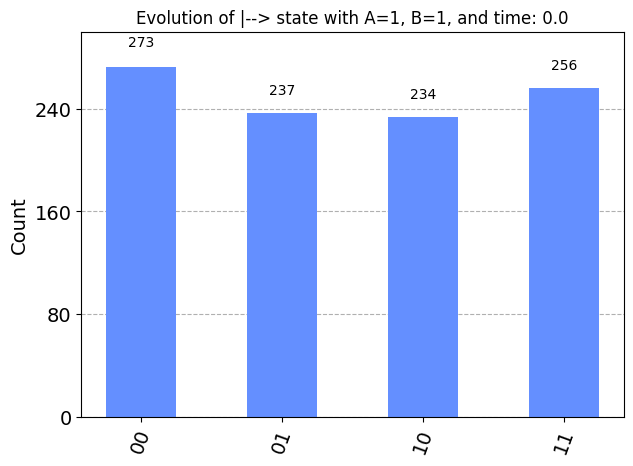

0.0


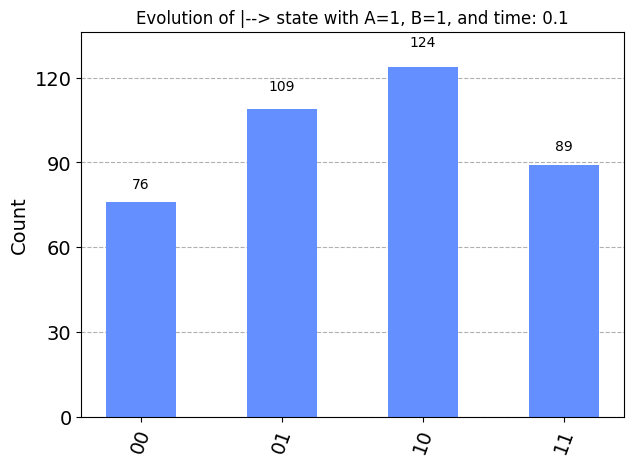

0.1


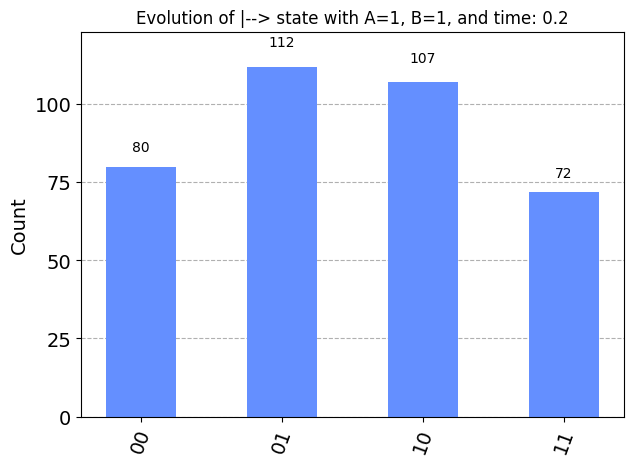

0.2


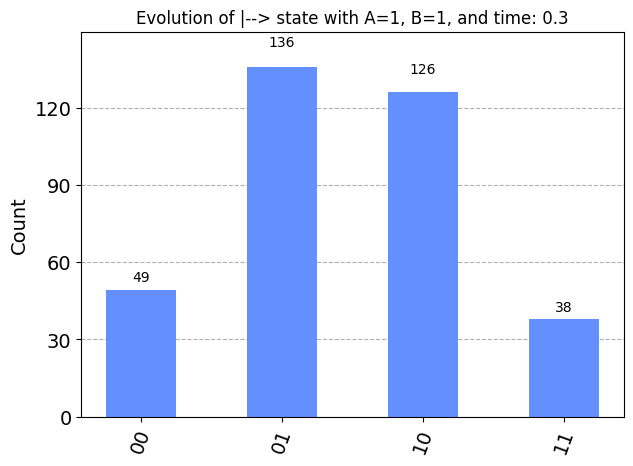

0.30000000000000004


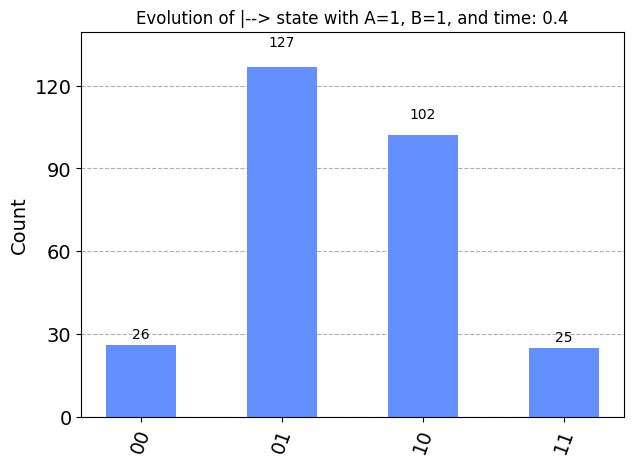

0.4


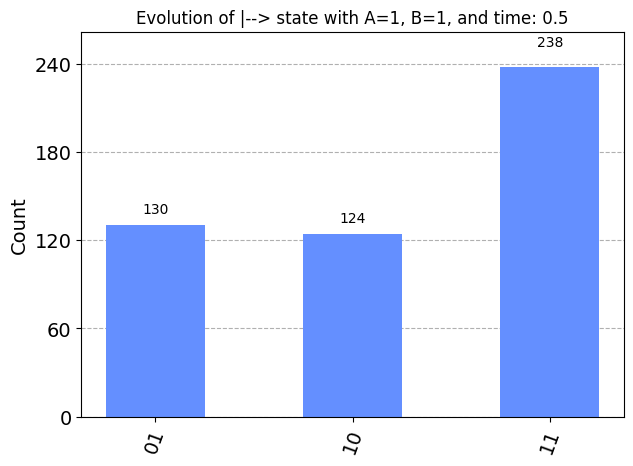

0.5


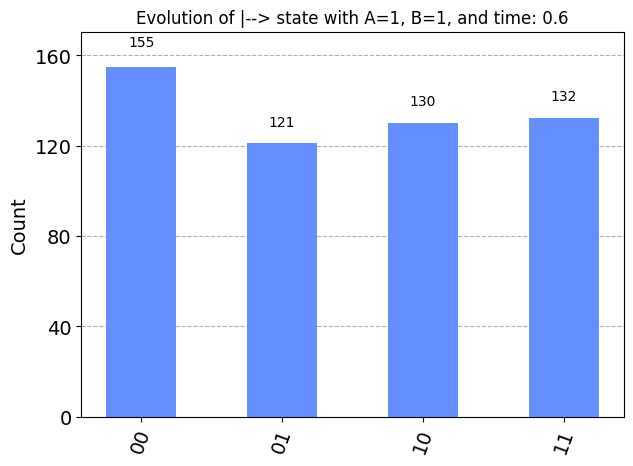

0.6000000000000001


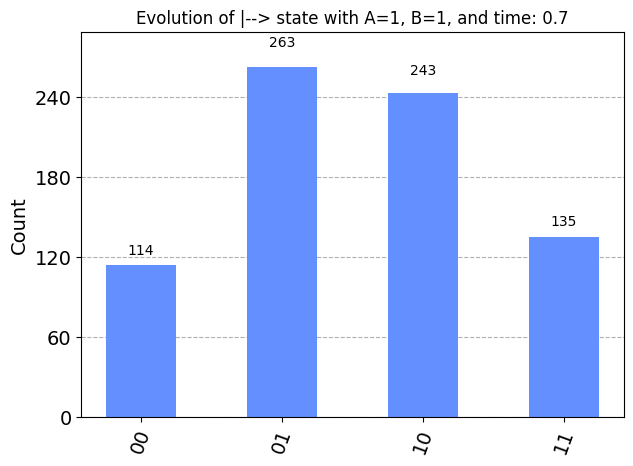

0.7000000000000001


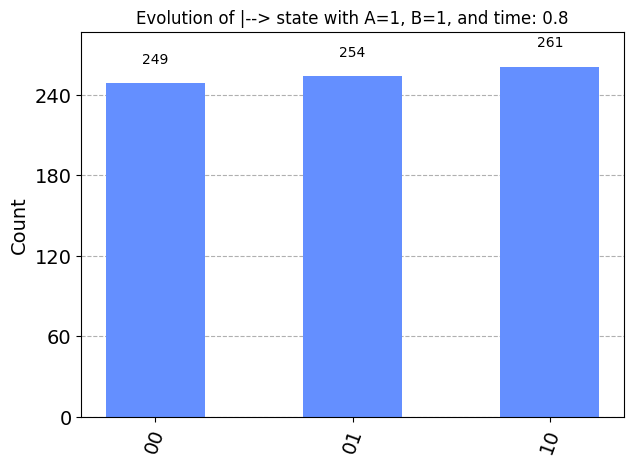

0.8


PrecisionExhausted: 

In [3]:
"""
times = []
res = []
iterations = 10a0
time = 1/100
N = 5
v= 1/2
w= 1
num_time_slices = 1
"""


# Variables
#time = 1
A = 20
B = 1


for time in range(0, 30):
    time *= 0.1
    #for itr in range(iterations):
    # Circuit
    qc = QuantumCircuit(3, 3)

    qc.x(0)
    qc.x(1)

    qc.h(0)
    qc.h(1)
    # Apply unitary gate
    qc.append(UnitaryGate(non_hermitian_gate(time, A, B)), [0, 1, 2])

    # Measurement
    qc.measure(0,0)
    qc.measure(1,1)
    qc.measure(2,2)

    # Simulation
    svsim = Aer.get_backend('aer_simulator')
    shots = 1000 #500
    t_qpe = transpile(qc, svsim)
    qobj = assemble(t_qpe, shots=shots)
    results = svsim.run(qobj).result()
    answer = results.get_counts()
    desired = {}
    for i in answer:
        if i[0] != '1':
            desired[i[1:]] = answer[i]
    hist = plot_histogram(desired, title="Evolution of |--> state with A=1, B=1, and time: %1.1f"% (time))
    display(hist)
    #hist.savefig('A=1_B=1_states=-_-_time:%1.1f.png' % (time))
    print(time)

# Code to create unitary gate from non-unitary


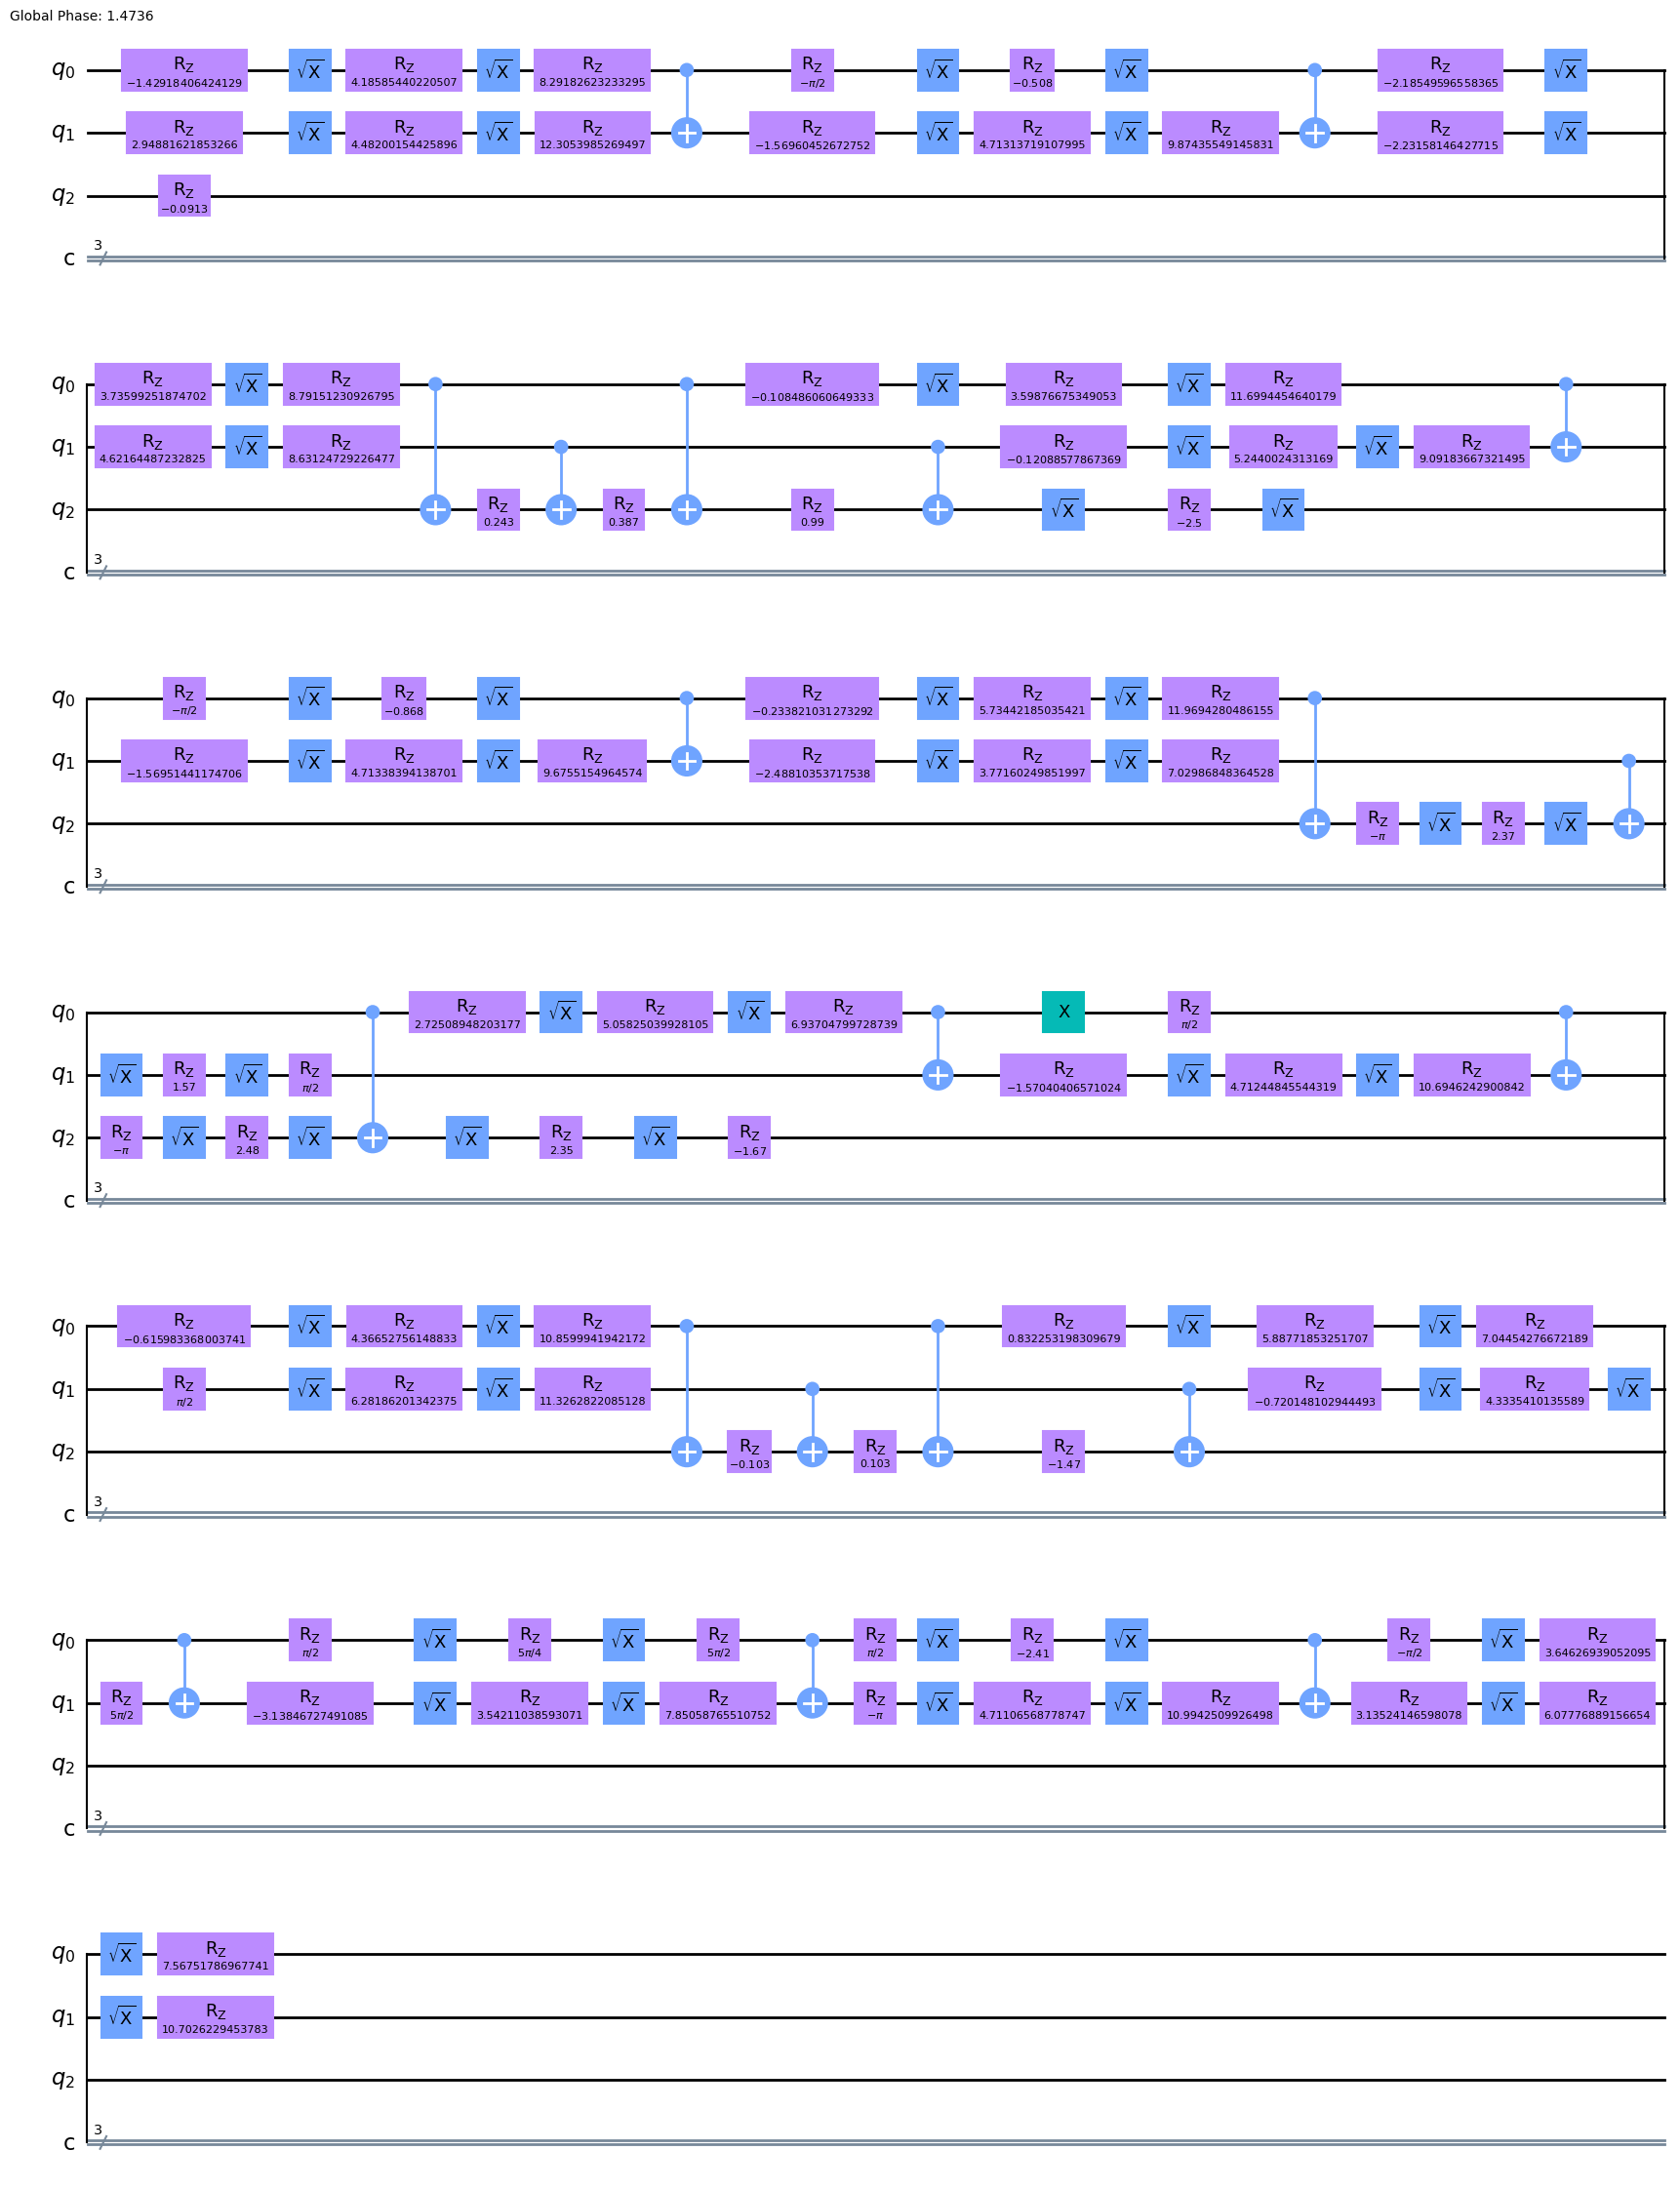

In [50]:
# Sympy arrays
I = smp.Matrix([[1,0], [0,1]])
X = smp.Matrix([[0,1],[1,0]])
Z = smp.Matrix([[1, 0],[0, -1]])
Y = smp.Matrix([[0,-smp.I],[smp.I,0]])

# Variables
time = 1

# Desired non-hermitian Hamiltonian
## a = 1, b = 1
H = smp.Matrix(smp.I*(TensorProduct(X,Y)- TensorProduct(Y, X)))
A = smp.exp(-smp.I*time*H)
A = 0.1*smp.Matrix(smp.N(A))

# Singular-value decomposition
U, S, V = A.singular_value_decomposition()

# s
num = max((Dagger(A)*A).eigenvals())
s = 1/smp.sqrt(num)

# Sum Tilde
S_T = (smp.eye(smp.shape(S)[0])-s**2*S**2)**(1/2)

# C matrix
C = U*S_T*Dagger(V)

# Initialise matrix
init_matrix = (s*A).col_join(C)
random_matrix = smp.randMatrix(8,4)/100
to_input = init_matrix.row_join(random_matrix)
to_input = np.reshape(np.fromiter(to_input, dtype=complex), (8, 8))

# Simulated matrix
q, r = np.linalg.qr(to_input) # Using qr algorithm, q is negative of desired unitary
simulated_matrix = -smp.Matrix(q) # Unitary matrix to simulate

qc = QuantumCircuit(3,3)
qc.append(UnitaryGate(simulated_matrix), [0, 1, 2])
qc_transpile = transpile(qc, basis_gates=['cx','rz','sx','x'])
qc_transpile.draw()

# Analytical solution

In [ ]:
# Sympy arrays
X = smp.Matrix([[0,1],[1,0]])
Y = smp.Matrix([[0,-smp.I],[smp.I,0]])

a, b, time = smp.symbols('a b t')

# Desired non-hermitian Hamiltonian
H = smp.Matrix(smp.I*(a*TensorProduct(X,Y)- b*TensorProduct(Y, X)))
A_g = smp.exp(-smp.I*time*H)
A_g = smp.Matrix(smp.N(A_g))


a_, b_, g_, x_ = smp.symbols('alpha beta gamma xi')

inital_state_1 = smp.Matrix([[a_],[b_]])
inital_state_2 = smp.Matrix([[g_],[x_]])


display(A_g*TensorProduct(inital_state_1,inital_state_2))

Matrix([
[alpha*gamma*(0.5*exp(t*(a - b)) + 0.5*exp(-t*(a - b))) + beta*xi*(-0.5*I*exp(t*(a - b)) + 0.5*I*exp(-t*(a - b)))],
[ alpha*xi*(0.5*exp(t*(a + b)) + 0.5*exp(-t*(a + b))) + beta*gamma*(0.5*I*exp(t*(a + b)) - 0.5*I*exp(-t*(a + b)))],
[alpha*xi*(-0.5*I*exp(t*(a + b)) + 0.5*I*exp(-t*(a + b))) + beta*gamma*(0.5*exp(t*(a + b)) + 0.5*exp(-t*(a + b)))],
[ alpha*gamma*(0.5*I*exp(t*(a - b)) - 0.5*I*exp(-t*(a - b))) + beta*xi*(0.5*exp(t*(a - b)) + 0.5*exp(-t*(a - b)))]])

In [ ]:
print(smp.latex(A_g*TensorProduct(inital_state_2,inital_state_1)))

\left[\begin{matrix}\alpha \gamma \left(0.5 e^{t \left(a - b\right)} + 0.5 e^{- t \left(a - b\right)}\right) + \beta \xi \left(- 0.5 i e^{t \left(a - b\right)} + 0.5 i e^{- t \left(a - b\right)}\right)\\\alpha \xi \left(0.5 i e^{t \left(a + b\right)} - 0.5 i e^{- t \left(a + b\right)}\right) + \beta \gamma \left(0.5 e^{t \left(a + b\right)} + 0.5 e^{- t \left(a + b\right)}\right)\\\alpha \xi \left(0.5 e^{t \left(a + b\right)} + 0.5 e^{- t \left(a + b\right)}\right) + \beta \gamma \left(- 0.5 i e^{t \left(a + b\right)} + 0.5 i e^{- t \left(a + b\right)}\right)\\\alpha \gamma \left(0.5 i e^{t \left(a - b\right)} - 0.5 i e^{- t \left(a - b\right)}\right) + \beta \xi \left(0.5 e^{t \left(a - b\right)} + 0.5 e^{- t \left(a - b\right)}\right)\end{matrix}\right]


In [ ]:
inital_state_1 = smp.Matrix([[1],[0]])
inital_state_2 = smp.Matrix([[1],[0]])

display(A_g*TensorProduct(inital_state_1,inital_state_2))

inital_state_1 = smp.Matrix([[1],[0]])
inital_state_2 = smp.Matrix([[1],[0]])

display(A_g*TensorProduct(inital_state_1,inital_state_2))

Matrix([
[    0.5*exp(t*(a - b)) + 0.5*exp(-t*(a - b))],
[                                           0],
[                                           0],
[0.5*I*exp(t*(a - b)) - 0.5*I*exp(-t*(a - b))]])

Matrix([
[    0.5*exp(t*(a - b)) + 0.5*exp(-t*(a - b))],
[                                           0],
[                                           0],
[0.5*I*exp(t*(a - b)) - 0.5*I*exp(-t*(a - b))]])

In [ ]:
print(smp.latex(smp.simplify(H)))

\left[\begin{matrix}0 & 0 & 0 & a - b\\0 & 0 & - a - b & 0\\0 & a + b & 0 & 0\\- a + b & 0 & 0 & 0\end{matrix}\right]


In [ ]:
inital_state_1 = smp.Matrix([[0],[1]])
inital_state_2 = smp.Matrix([[0],[-1]])

display(A*TensorProduct(inital_state_1,inital_state_2))

Matrix([
[ 0],
[ 0],
[ 0],
[-5]])

Change in $a, b$ determines the rate of oscillation between the different qubit bases and the direction of change (increase or decrease in probability amplitude). Analytically, the value of some  amplitudes can be set as exponential functions with respect to time $t$. Values could tend towards positive or negative infinity (positive exponent, positive or negative sign); stay constant (constant exponent); or tend to zero (negative exponent).

The non-hermitian hamiltonian $H$ is given as:
$$\left[\begin{matrix}0 & 0 & 0 & a - b\\0 & 0 & - a - b & 0\\0 & a + b & 0 & 0\\- a + b & 0 & 0 & 0\end{matrix}\right]
$$

The operator $e^{-iHt}$ is given as:
$$\left[\begin{matrix}0.5 e^{t \left(a - b\right)} + 0.5 e^{- t \left(a - b\right)} & 0 & 0 & - 0.5 i e^{t \left(a - b\right)} + 0.5 i e^{- t \left(a - b\right)}\\0 & 0.5 e^{t \left(a + b\right)} + 0.5 e^{- t \left(a + b\right)} & 0.5 i e^{t \left(a + b\right)} - 0.5 i e^{- t \left(a + b\right)} & 0\\0 & - 0.5 i e^{t \left(a + b\right)} + 0.5 i e^{- t \left(a + b\right)} & 0.5 e^{t \left(a + b\right)} + 0.5 e^{- t \left(a + b\right)} & 0\\0.5 i e^{t \left(a - b\right)} - 0.5 i e^{- t \left(a - b\right)} & 0 & 0 & 0.5 e^{t \left(a - b\right)} + 0.5 e^{- t \left(a - b\right)}\end{matrix}\right]
$$

General case for state initialisations $\alpha |0\rangle + \beta |1\rangle$ on qubit 1 and $\gamma |0\rangle + \xi |1\rangle$ on qubit 2 :
$$
\left[\begin{matrix}\alpha \gamma \left(0.5 e^{t \left(a - b\right)} + 0.5 e^{- t \left(a - b\right)}\right) + \beta \xi \left(- 0.5 i e^{t \left(a - b\right)} + 0.5 i e^{- t \left(a - b\right)}\right)\\\alpha \xi \left(0.5 i e^{t \left(a + b\right)} - 0.5 i e^{- t \left(a + b\right)}\right) + \beta \gamma \left(0.5 e^{t \left(a + b\right)} + 0.5 e^{- t \left(a + b\right)}\right)\\\alpha \xi \left(0.5 e^{t \left(a + b\right)} + 0.5 e^{- t \left(a + b\right)}\right) + \beta \gamma \left(- 0.5 i e^{t \left(a + b\right)} + 0.5 i e^{- t \left(a + b\right)}\right)\\\alpha \gamma \left(0.5 i e^{t \left(a - b\right)} - 0.5 i e^{- t \left(a - b\right)}\right) + \beta \xi \left(0.5 e^{t \left(a - b\right)} + 0.5 e^{- t \left(a - b\right)}\right)\end{matrix}\right]
$$

Example of specific case for initialisations of $|0\rangle$ on each qubit:
$$
\left[\begin{matrix}0.5 e^{t \left(a - b\right)} + 0.5 e^{- t \left(a - b\right)}\\0\\0\\0.5 i e^{t \left(a - b\right)} - 0.5 i e^{- t \left(a - b\right)}\end{matrix}\right]
$$

In [ ]:
import sympy as smp

In [ ]:
I = smp.Matrix([[1,0], [0,1]])
X = smp.Matrix([[0,1],[1,0]])
Z = smp.Matrix([[1, 0],[0, -1]])
Y = smp.Matrix([[0,-smp.I],[smp.I,0]])
H = smp.Matrix([[1, 1],[1, -1]])*(1/smp.sqrt(2)) 


In [ ]:
target = (smp.re(smp.E**(smp.I*smp.pi/4)*I -smp.E**(-smp.I*smp.pi/4)*Z)+smp.im(smp.E**(smp.I*smp.pi/4)*I -smp.E**(-smp.I*smp.pi/4)*Z)*smp.I)/smp.sqrt(2)

In [ ]:
target**2

Matrix([
[-1, 0],
[ 0, 1]])

# Section 2


In [6]:
from qiskit import IBMQ, assemble, transpile
from qiskit import execute

$|q_2q_1q_0\rangle$

In [51]:
"""
IBMQ.save_account('38307034cdda6895f36d0c2886cfd2b29783ddcc09310b10f0376de4b876623bab976052519255846e8854323ef48d56d4143f5565b2b62d7136b29a90144c23')
provider = IBMQ.load_account()
backend = provider.backend.ibm_nairobi
"""

configrc.store_credentials:WARNING:2023-02-20 22:25:32,771: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-02-20 22:25:33,594: Credentials are already in use. The existing account in the session will be replaced.


In [52]:
backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'cx', 'reset']

In [7]:
lst = []
# for i in range(4): #100
qc = QuantumCircuit(3)

a_ = 1
b_ = 1
time = 1

Unitary_to_simulate = UnitaryGate(non_hermitian_gate(time, a_, b_)) #3

qc.append(Unitary_to_simulate, [0, 1, 2])

qc_basis = transpile(qc, basis_gates=['id', 'rz', 'sx', 'x', 'cx', 'reset'])

#display(qc_basis.draw(output='mpl'))

to_add = dict(qc_basis.count_ops())
lst.append(sum(to_add.values()))

counts = dict()
for i in lst:
    counts[i] = counts.get(i, 0) + 1
    
print(counts)

{154: 1}


for $a,b,t=1$, we have a total gate count (in the ibm basis gates) of between 169 and 183, concentrated around 170-174. The differences results from the different values for the random matrix $B, D$.

In [175]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc_basis, backend, shots=8192)
result = job.result()
smp.Matrix(result.get_unitary(qc_basis, 4))

Matrix([
[0.1353,         0,         0,      0,            -0.6354, -0.5672 - 0.0671*I,  0.3915 + 0.1581*I, -0.1295 + 0.2381*I],
[     0,    0.5092,  0.4908*I,      0, -0.3736 + 0.2074*I,   0.001 + 0.0435*I, -0.4586 + 0.1105*I, -0.0053 - 0.3047*I],
[     0, -0.4908*I,    0.5092,      0, -0.2074 - 0.3736*I,  -0.0435 + 0.001*I, -0.1105 - 0.4586*I,  0.3047 - 0.0053*I],
[     0,         0,         0, 0.1353,            -0.2018,  0.3282 - 0.0213*I,  0.5768 - 0.1571*I, -0.1295 - 0.6773*I],
[0.9908,         0,         0,      0,             0.0868,  0.0775 + 0.0092*I, -0.0535 - 0.0216*I,  0.0177 - 0.0325*I],
[     0,    0.4999, -0.4999*I,      0, -0.2539 - 0.1552*I,  0.4422 + 0.2845*I,  0.0009 + 0.0659*I, -0.1962 + 0.3039*I],
[     0,  0.4999*I,    0.4999,      0, -0.1476 + 0.2676*I,   0.286 - 0.4422*I,    0.07 + 0.0159*I,  0.2927 + 0.1964*I],
[     0,         0,         0, 0.9908,             0.0276, -0.0448 + 0.0029*I, -0.0788 + 0.0215*I,  0.0177 + 0.0925*I]])

## Remove gates

In [14]:
from scipy.linalg import logm

In [16]:
len(qc_basis.data)

74

In [12]:
for i in range(len(qc_basis.data)):
    if qc_basis.data[i].operation.name == 'rz':
        qc_basis.data.pop(i)
    """if qc_basis.data[i].operation.name=='cx':
        if qc_basis.data[i].qubits[1].index == 0:
            qc_basis.data.pop(i)"""
            
backend = Aer.get_backend('unitary_simulator')
job = execute(qc_basis, backend, shots=8192)
result = job.result()
smp.Matrix(result.get_unitary(qc_basis, 4))

Matrix([
[               0, 0.7042 - 0.064*I,                0,                0,                0,                0, 0.064 + 0.7042*I,                0],
[               0, 0.064 + 0.7042*I,                0,                0,                0,                0, 0.7042 - 0.064*I,                0],
[0.064 + 0.7042*I,                0,                0,                0,                0,                0,                0, 0.7042 - 0.064*I],
[0.7042 - 0.064*I,                0,                0,                0,                0,                0,                0, 0.064 + 0.7042*I],
[               0,                0, 0.064 + 0.7042*I,                0,                0, 0.7042 - 0.064*I,                0,                0],
[               0,                0, 0.7042 - 0.064*I,                0,                0, 0.064 + 0.7042*I,                0,                0],
[               0,                0,                0, 0.7042 - 0.064*I, 0.064 + 0.7042*I,                0,       

In [18]:
smp.Matrix(logm(np.matrix(result.get_unitary(qc_basis, 4))[1:5,0:4]))

logm result may be inaccurate, approximate err = 4775.468599836454


/home/song12301/.pyenv/versions/3.9.16/lib/python3.9/site-packages/scipy/linalg/_matfuncs_inv_ssq.py:827: LogmExactlySingularWarning: The logm input matrix is exactly singular.
  warnings.warn(exact_singularity_msg, LogmExactlySingularWarning)


Matrix([
[-0.346579950320423 - 0.0906342796618915*I,  8.32667268468867e-17 + 1.5707963267949*I,                     0,                 0],
[ -1.2490009027033e-16 + 1.5707963267949*I, -0.346579950320422 - 0.0906342796618916*I,                     0,                 0],
[                         1.57079632679489,  -0.0906342796618924 - 45.7051219095605*I,     -46.0517018598809,                 0],
[                       28672.0 - 2016.0*I,       -7.042e+19 + 6.39999999999999e+18*I, 6.4e+18 + 7.042e+19*I, -46.0517018598809]])

In [19]:
import qiskit.quantum_info as qi
op = qi.Operator(qc_basis)
smp.Matrix(logm(np.matrix(op.data)[1:5,0:4]))

logm result may be inaccurate, approximate err = 612.2761894482578


Matrix([
[-0.346573590279973 - 0.0906183816041838*I,      -2.22044604925031e-16 + 1.5707963267949*I,                                            0,                 0],
[                        1.5707963267949*I,      -0.346573590279973 - 0.0906183816041831*I,                                            0,                 0],
[1.57079632679489 + 6.21724893790088e-15*I,       -0.0906183816041715 - 45.7051282696009*I,                            -46.0517018598809,                 0],
[                       -8192.0 + 4096.0*I, -7.04205496147899e+19 + 6.39892115523539e+18*I, 6.3989211552354e+18 + 7.04205496147899e+19*I, -46.0517018598809]])

### Misc

In [ ]:
import sympy as smp
from sympy.physics.quantum.dagger import Dagger
from sympy.physics.quantum import TensorProduct as TP
from sympy.vector import *

a, b = smp.symbols('alpha beta')
U = smp.Matrix([[a, 0], [0, b]])
I = smp.Matrix([[1,0], [0,1]])
X = smp.Matrix([[0,1],[1,0]])
Z = smp.Matrix([[1, 0],[0, -1]])
Y = smp.Matrix([[0,-smp.I],[smp.I,0]])
H = smp.Matrix([[1, 1],[1, -1]])*(1/smp.sqrt(2))
S = smp.Matrix([[1, 0],[0, smp.I]])

CX = TP(smp.Matrix([[1,0], [0,0]]), I) + TP(smp.Matrix([[0,0], [0,1]]), X)

CX_1_3 = TP(I, I, smp.Matrix([[1,0], [0,0]])) + TP(X, I, smp.Matrix([[0,0], [0,1]]))

CX_2_1 = TP(I, smp.Matrix([[1,0], [0,0]])) + TP(X, smp.Matrix([[0,0], [0,1]]))
CX_2_1 = TP(I,CX_2_1)


TP(U, TP(I, I))

Matrix([
[alpha,     0,     0,     0,    0,    0,    0,    0],
[    0, alpha,     0,     0,    0,    0,    0,    0],
[    0,     0, alpha,     0,    0,    0,    0,    0],
[    0,     0,     0, alpha,    0,    0,    0,    0],
[    0,     0,     0,     0, beta,    0,    0,    0],
[    0,     0,     0,     0,    0, beta,    0,    0],
[    0,     0,     0,     0,    0,    0, beta,    0],
[    0,     0,     0,     0,    0,    0,    0, beta]])

In [150]:
qc = QuantumCircuit(3)

qc.cx(0, 1)

usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobjU = assemble(qc)
smp.Matrix(usim.run(qobjU).result().get_unitary())

Matrix([
[1.0,   0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0, 1.0,   0,   0,   0,   0],
[  0,   0, 1.0,   0,   0,   0,   0,   0],
[  0, 1.0,   0,   0,   0,   0,   0,   0],
[  0,   0,   0,   0, 1.0,   0,   0,   0],
[  0,   0,   0,   0,   0,   0,   0, 1.0],
[  0,   0,   0,   0,   0,   0, 1.0,   0],
[  0,   0,   0,   0,   0, 1.0,   0,   0]])

In [ ]:
for i in range(len(qc_basis.data)):
    if qc_basis.data[i].qubits[0].index == 2:
        if qc_basis.data[i].operation.name=='rz':
            qc_basis.data.pop(i)
    if qc_basis.data[i].operation.name=='cx':
        if qc_basis.data[i].qubits[1].index == 2:
            qc_basis.data.pop(i)

In [ ]:
display(qc_basis.draw(output='mpl'))

In [107]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc_basis, backend, shots=8192)
result = job.result()
smp.Matrix(result.get_unitary(qc_basis, 4))

Matrix([
[ 0.0169 - 0.8988*I,  0.018 - 0.0332*I, 0.1329 + 0.2618*I, -0.0551 + 0.3181*I,                  0,                 0,                 0,                  0],
[-0.0658 - 0.0279*I, 0.3346 + 0.8518*I, 0.2367 - 0.0307*I, -0.2894 - 0.1291*I,                  0,                 0,                 0,                  0],
[-0.0764 + 0.3547*I,  0.0013 - 0.186*I, 0.4654 + 0.6944*I, -0.3288 + 0.1638*I,                  0,                 0,                 0,                  0],
[ 0.2336 - 0.0232*I, 0.3535 + 0.0389*I, 0.1931 + 0.3474*I,   0.7417 - 0.332*I,                  0,                 0,                 0,                  0],
[                 0,                 0,                 0,                  0,  0.0169 - 0.8988*I,  0.018 - 0.0332*I, 0.1329 + 0.2618*I, -0.0551 + 0.3181*I],
[                 0,                 0,                 0,                  0, -0.0658 - 0.0279*I, 0.3346 + 0.8518*I, 0.2367 - 0.0307*I, -0.2894 - 0.1291*I],
[                 0,                 0,    

### Test

In [193]:
smp.Matrix(UnitaryGate(non_hermitian_gate(time, a_, b_)))

Matrix([
[           0.135,                   0,                                       0,                0,  -0.451305969355128,   0.172450242382456,   0.679525850177941,  -0.535353579297465],
[               0, 0.707106781186547*I, 0.490875538660998 - 0.508960907677864*I,                0,                   0,                   0,                   0,                   0],
[               0,   0.707106781186547, 0.508960907677864 + 0.490875538660998*I,                0,                   0,                   0,                   0,                   0],
[               0,                   0,                                       0,            0.135,  -0.588428351875499,  -0.765329329550766, -0.0215943397755496,   0.222107578727329],
[0.99084559846628,                   0,                                       0,                0,  0.0614892027145799, -0.0234958733809462,  -0.092583536643872,  0.0729404594591004],
[               0,                   0,                                

In [180]:
qc = QuantumCircuit(3)
a_ = 1
b_ = 1
time = 1
Unitary_to_simulate = UnitaryGate(non_hermitian_gate(time, a_, b_))
qc.append(Unitary_to_simulate, [0, 1, 2])
qc_basis = transpile(qc, basis_gates=['id', 'rz', 'sx', 'x', 'cx', 'reset'])

In [182]:
for i in range(len(qc_basis.data)):
    if qc_basis.data[i].qubits[0].index == 0:
        if qc_basis.data[i].operation.name=='sx':
            qc_basis.data.pop(i)

/tmp/ipykernel_161569/2595269841.py:2: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  if qc_basis.data[i].qubits[0].index == 0:


In [183]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc_basis, backend, shots=8192)
result = job.result()
smp.Matrix(result.get_unitary(qc_basis, 4))

Matrix([
[0.0478 - 0.5285*I,                  0,  0.4301 + 0.0747*I,                  0,  0.0879 + 0.6618*I,                  0,  0.1937 + 0.2112*I,                  0],
[                0, -0.0457 + 0.0018*I,                  0, -0.0459 + 0.0132*I,                  0,  0.6118 - 0.6448*I,                  0,  0.4466 + 0.0779*I],
[0.4756 + 0.4476*I,                  0, -0.1484 + 0.3124*I,                  0,  0.5667 + 0.2492*I,                  0,  0.2607 - 0.0517*I,                  0],
[                0,  0.0207 + 0.0526*I,                  0,  0.0268 + 0.1018*I,                  0,  0.4384 - 0.1221*I,                  0, -0.6762 - 0.5669*I],
[0.4432 + 0.2282*I,                  0,  0.2722 - 0.7165*I,                  0, -0.0423 + 0.2001*I,                  0, -0.3159 - 0.1498*I,                  0],
[                0, -0.4553 - 0.3266*I,                  0,  0.8186 + 0.1071*I,                  0,  0.0152 + 0.0183*I,                  0,  0.0481 - 0.0387*I],
[-0.1216 - 0.169*I,      

In [174]:
smp.Matrix(Unitary_to_simulate)

Matrix([
[0.135335283236613,                                         0,                                          0,                 0,                       -0.709604540849758,    -0.304702320518592 + 0.277114744128363*I,  -0.434564142809975 - 0.0392157870588305*I,   -0.28096200520614 + 0.197954920710902*I],
[                0,                         0.509157819444385,                        0.490842180555614*I,                 0, -0.372070760904459 + 0.121045696655122*I,   -0.0637440229267466 - 0.382148501283792*I,    0.115874283188232 + 0.220395113491044*I,    0.209875897305258 - 0.30098842431257*I],
[                0,                       -0.49084218055565*I,                           0.50915781944435,                 0, -0.121045702187612 - 0.372070767594911*I,    0.382148501062264 - 0.0637440155471849*I,   -0.220395097212196 + 0.115874288715916*I,     0.30098842266826 + 0.20987590129921*I],
[                0,                                         0,                          

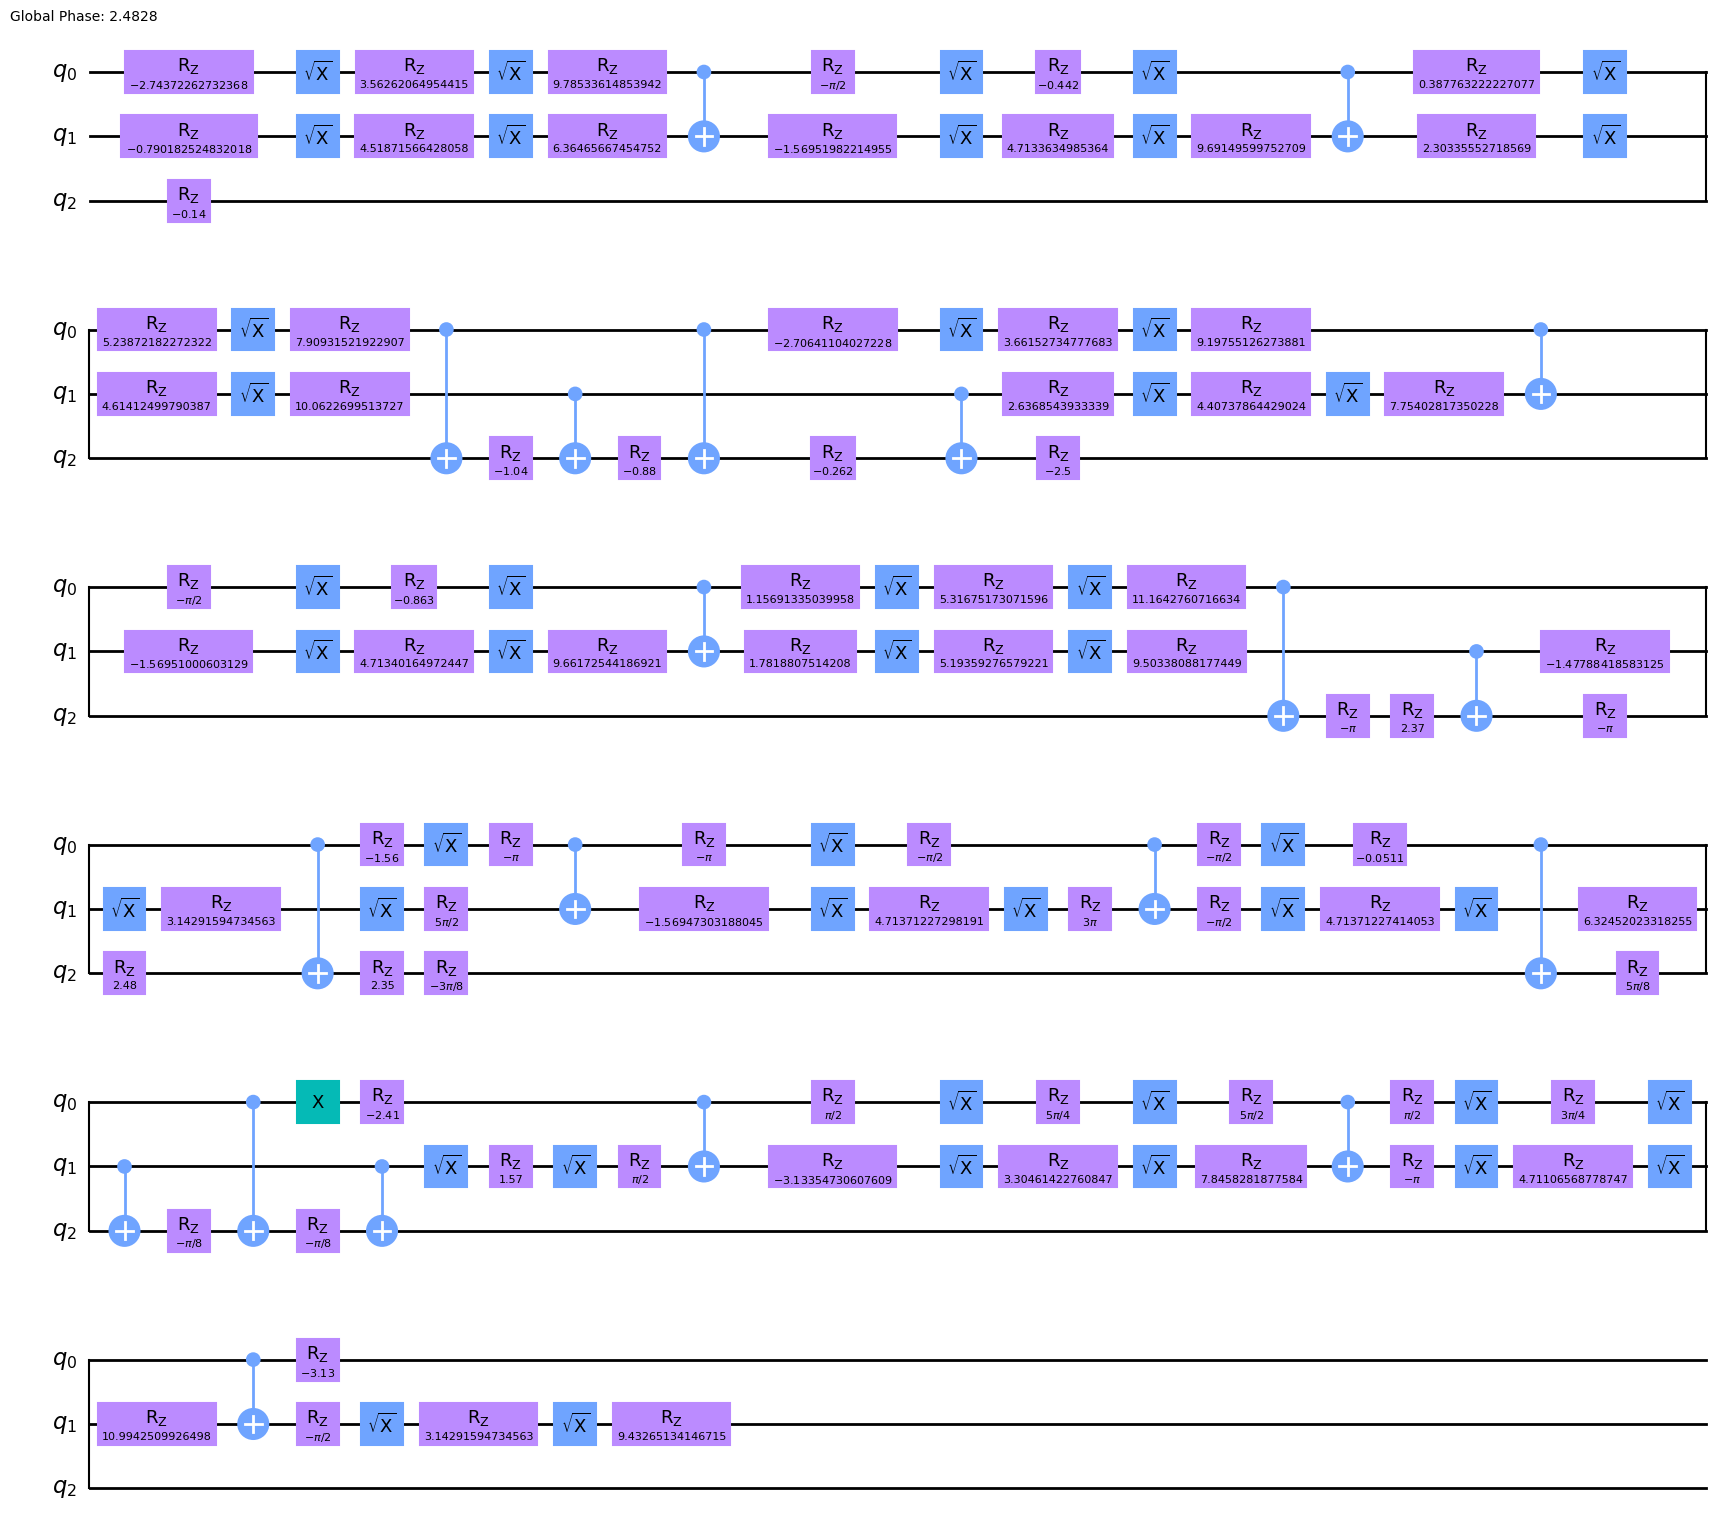

In [172]:
display(qc_basis.draw(output='mpl'))

## Testing

In [196]:
qc_basis.data[0]

CircuitInstruction(operation=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[ParameterExpression(-2.48179620135462)]), qubits=(Qubit(QuantumRegister(3, 'q'), 0),), clbits=())

In [230]:
qc = QuantumCircuit(3)
a_ = 1
b_ = 1
time = 1

Unitary_to_simulate = UnitaryGate(non_hermitian_gate(time, a_, b_))

qc.append(Unitary_to_simulate, [0, 1, 2])

qc_basis = transpile(qc, basis_gates=['id', 'rz', 'sx', 'x', 'cx', 'reset'])

qc_basis1 = qc_basis.copy()
length = len(qc_basis)
for to_pop in range(length):
    qc_check = qc_basis
    qc_check.data.pop(-1)

    backend = Aer.get_backend('unitary_simulator')
    job = execute(qc_check, backend, shots=8192)
    result = job.result()
    smp.Matrix(result.get_unitary(qc_check, 4))

    print(length-to_pop-1)
    #display(smp.Matrix(result.get_unitary(qc_check, 4))[0:4, 0:4])
    display(smp.Matrix(result.get_unitary(qc_check, 4)))

153


Matrix([
[-0.0329 - 0.1313*I,                  0,                  0,                  0,  0.0623 + 0.2487*I,   0.0596 - 0.598*I, -0.1076 - 0.4518*I, -0.5794 - 0.0584*I],
[                 0, -0.1238 - 0.4939*I,  0.4761 - 0.1193*I,                  0,  0.4998 - 0.0775*I, -0.0943 + 0.2381*I,  0.2466 - 0.3402*I, -0.0113 - 0.0413*I],
[                 0,  0.4761 + 0.1193*I, -0.1238 + 0.4939*I,                  0,  0.1674 - 0.4773*I,  0.1656 + 0.1954*I, -0.1837 - 0.3779*I, -0.0417 - 0.0095*I],
[                 0,                  0,                  0, -0.0329 + 0.1313*I,  0.1349 - 0.5384*I, -0.3069 - 0.5845*I,  0.2128 + 0.1854*I,  0.2053 - 0.3405*I],
[-0.2408 - 0.9611*I,                  0,                  0,                  0,  -0.0085 - 0.034*I, -0.0081 + 0.0817*I,  0.0147 + 0.0617*I,   0.0791 + 0.008*I],
[                 0, -0.1215 - 0.4849*I, -0.4849 + 0.1215*I,                  0,  -0.0738 + 0.224*I, -0.1605 - 0.0504*I,  -0.275 - 0.3096*I,  0.4392 - 0.2278*I],
[                 0

152


Matrix([
[-0.0821 - 0.0492*I,  0.1784 + 0.2977*I, -0.3088 + 0.1851*I,                  0,  0.4779 - 0.0618*I, -0.2841 - 0.1483*I, -0.1826 - 0.4529*I,  -0.335 + 0.2349*I],
[                 0, -0.3088 - 0.1851*I,  0.1784 - 0.2977*I, -0.0821 + 0.0492*I,  0.5478 - 0.4904*I,  0.2108 - 0.2795*I, -0.0331 - 0.0943*I,  0.2466 - 0.0825*I],
[ 0.0492 - 0.0821*I,  0.2977 - 0.1784*I,  0.1851 + 0.3088*I,                  0, -0.2481 - 0.1668*I,  0.5093 - 0.2543*I, -0.1087 - 0.3768*I, -0.2861 - 0.3028*I],
[                 0,  0.1851 - 0.3088*I,  0.2977 + 0.1784*I,  0.0492 + 0.0821*I,  0.0869 - 0.1255*I, -0.6119 - 0.0669*I,  0.4926 - 0.0605*I, -0.0526 - 0.2992*I],
[ -0.601 - 0.3601*I, -0.1817 - 0.3032*I, -0.3032 + 0.1817*I,                  0, -0.0291 - 0.1737*I,  0.1563 + 0.0395*I,  0.2842 + 0.1869*I, -0.2063 + 0.2096*I],
[                 0, -0.3032 - 0.1817*I, -0.1817 + 0.3032*I,  -0.601 + 0.3601*I,  0.0291 + 0.1764*I, -0.1244 + 0.1159*I, -0.2942 - 0.0445*I,  0.0684 - 0.3243*I],
[  0.3601 - 0.601*I

151


Matrix([
[ 0.0821 + 0.0491*I, -0.1786 - 0.2976*I,  0.3087 - 0.1853*I,                  0, -0.4778 + 0.0621*I,  0.2842 + 0.1481*I,  0.1829 + 0.4528*I,  0.3349 - 0.2351*I],
[                 0,  0.3089 + 0.1849*I, -0.1782 + 0.2978*I,  0.0821 - 0.0492*I, -0.5475 + 0.4907*I, -0.2106 + 0.2797*I,  0.0331 + 0.0943*I, -0.2465 + 0.0827*I],
[-0.0492 + 0.0821*I, -0.2978 + 0.1782*I, -0.1849 - 0.3089*I,                  0,    0.248 + 0.167*I, -0.5094 + 0.2539*I,  0.1085 + 0.3769*I,   0.2859 + 0.303*I],
[                 0, -0.1853 + 0.3087*I, -0.2976 - 0.1786*I, -0.0491 - 0.0821*I,  -0.087 + 0.1254*I,  0.6119 + 0.0673*I, -0.4926 + 0.0602*I,  0.0524 + 0.2992*I],
[ 0.6012 + 0.3597*I,  0.1819 + 0.3031*I,  0.3031 - 0.1819*I,                  0,  0.0292 + 0.1737*I, -0.1563 - 0.0394*I, -0.2844 - 0.1867*I,  0.2062 - 0.2097*I],
[                 0,  0.3033 + 0.1815*I,  0.1815 - 0.3033*I,  0.6007 - 0.3605*I, -0.0292 - 0.1764*I,   0.1244 - 0.116*I,  0.2942 + 0.0443*I, -0.0682 + 0.3243*I],
[-0.3605 + 0.6007*I

150


Matrix([
[         -0.0001*I, -0.4761 - 0.1193*I,  0.1238 - 0.4939*I,                 0, -0.1674 + 0.4775*I, -0.1655 - 0.1958*I,  0.1836 + 0.3776*I,  0.0414 + 0.0095*I],
[                 0, -0.0001 - 0.0003*I,  0.0003 - 0.0001*I, 0.0329 - 0.1313*I, -0.1346 + 0.5383*I,  0.3068 + 0.5847*I, -0.2127 - 0.1857*I, -0.2053 + 0.3404*I],
[ 0.0329 + 0.1313*I, -0.0003 - 0.0001*I,  0.0001 - 0.0003*I,                 0, -0.0624 - 0.2484*I, -0.0597 + 0.5979*I,  0.1077 + 0.4521*I,  0.5794 + 0.0584*I],
[                 0,  0.1238 + 0.4939*I, -0.4761 + 0.1193*I,         -0.0001*I, -0.4999 + 0.0778*I,  0.0945 - 0.2378*I, -0.2468 + 0.3401*I,  0.0112 + 0.0415*I],
[-0.0002 - 0.0006*I,  0.4849 + 0.1215*I,  0.1215 - 0.4849*I,                 0,  0.1688 + 0.1532*I,  -0.1141 + 0.125*I, -0.4094 + 0.0827*I,  0.0048 - 0.4951*I],
[                 0, -0.0001 - 0.0003*I, -0.0003 + 0.0001*I, 0.2408 - 0.9611*I,  0.0184 - 0.0734*I,  -0.042 - 0.0799*I,  0.0289 + 0.0251*I,  0.0283 - 0.0467*I],
[ 0.2408 + 0.9611*I,  0.0

149


Matrix([
[        -0.0001*I,  -0.2523 - 0.421*I,  0.4367 - 0.2617*I,                  0, -0.4559 + 0.2193*I,  0.0214 - 0.2555*I, -0.1372 + 0.3969*I,  0.0226 + 0.0359*I],
[                0,  0.0002 - 0.0003*I,  0.0003 + 0.0002*I,  0.1161 - 0.0696*I, -0.4758 + 0.2855*I, -0.1965 + 0.6304*I, -0.0191 - 0.2817*I, -0.3859 + 0.0955*I],
[0.1161 + 0.0696*I, -0.0003 + 0.0002*I, -0.0002 - 0.0003*I,                  0, -0.2198 - 0.1315*I,   0.3805 + 0.465*I,  0.3959 + 0.2435*I,   0.451 - 0.3684*I],
[                0,  0.4367 + 0.2617*I,  -0.2523 + 0.421*I,          -0.0001*I, -0.2985 + 0.4085*I, -0.1013 - 0.2349*I,    0.066 + 0.415*I,  0.0373 + 0.0215*I],
[0.0003 - 0.0006*I,   0.257 + 0.4288*I,   0.4288 - 0.257*I,                  0,  0.0111 + 0.2277*I, -0.1691 + 0.0077*I,   -0.348 - 0.231*I,  0.3534 - 0.3467*I],
[                0,  0.0002 - 0.0003*I, -0.0003 - 0.0002*I,  0.8499 - 0.5093*I,  0.0649 - 0.0389*I,  0.0268 - 0.0862*I,  0.0027 + 0.0382*I,    0.053 - 0.013*I],
[0.8499 + 0.5093*I,  0.00

148


Matrix([
[            0.0001,  0.3471 - 0.3471*I,      0.36 + 0.36*I,                  0,  -0.3235 - 0.389*I,   0.253 - 0.0413*I, -0.4183 - 0.0366*I, -0.0294 + 0.0306*I],
[                 0, -0.0002 - 0.0002*I,  0.0002 - 0.0002*I, -0.0393 - 0.1295*I,   0.1613 + 0.531*I,  0.5637 + 0.3438*I, -0.2779 - 0.0499*I, -0.0012 + 0.3976*I],
[-0.0393 + 0.1295*I, -0.0002 - 0.0002*I,  0.0002 - 0.0002*I,                  0,  0.0741 - 0.2452*I, -0.3585 + 0.4821*I,   -0.14 + 0.4432*I,   0.467 + 0.3479*I],
[                 0,      0.36 - 0.36*I,  0.3471 + 0.3471*I,            -0.0001,  0.3237 + 0.3888*I, -0.2525 + 0.0412*I,  0.4186 + 0.0369*I,  0.0299 - 0.0309*I],
[ 0.0006 + 0.0002*I, -0.3535 + 0.3535*I,  0.3535 + 0.3535*I,                  0, -0.2182 + 0.0661*I, -0.0486 - 0.1621*I,  0.1395 - 0.3937*I,  0.4222 + 0.2586*I],
[                 0, -0.0002 - 0.0002*I, -0.0002 + 0.0002*I, -0.2874 - 0.9482*I,  -0.022 - 0.0724*I, -0.0771 - 0.0469*I,  0.0377 + 0.0067*I,  0.0003 - 0.0546*I],
[-0.2874 + 0.9482*I

147


Matrix([
[                 0, -0.0002 - 0.0002*I,  0.0002 - 0.0002*I, -0.0393 - 0.1295*I,   0.1613 + 0.531*I,  0.5637 + 0.3438*I, -0.2779 - 0.0499*I, -0.0012 + 0.3976*I],
[            0.0001,  0.3471 - 0.3471*I,      0.36 + 0.36*I,                  0,  -0.3235 - 0.389*I,   0.253 - 0.0413*I, -0.4183 - 0.0366*I, -0.0294 + 0.0306*I],
[                 0,      0.36 - 0.36*I,  0.3471 + 0.3471*I,            -0.0001,  0.3237 + 0.3888*I, -0.2525 + 0.0412*I,  0.4186 + 0.0369*I,  0.0299 - 0.0309*I],
[-0.0393 + 0.1295*I, -0.0002 - 0.0002*I,  0.0002 - 0.0002*I,                  0,  0.0741 - 0.2452*I, -0.3585 + 0.4821*I,   -0.14 + 0.4432*I,   0.467 + 0.3479*I],
[                 0, -0.0002 - 0.0002*I, -0.0002 + 0.0002*I, -0.2874 - 0.9482*I,  -0.022 - 0.0724*I, -0.0771 - 0.0469*I,  0.0377 + 0.0067*I,  0.0003 - 0.0546*I],
[ 0.0006 + 0.0002*I, -0.3535 + 0.3535*I,  0.3535 + 0.3535*I,                  0, -0.2182 + 0.0661*I, -0.0486 - 0.1621*I,  0.1395 - 0.3937*I,  0.4222 + 0.2586*I],
[                 0

146


Matrix([
[                 0, -0.0002 - 0.0002*I,  0.0002 - 0.0002*I, -0.0393 - 0.1295*I,   0.1613 + 0.531*I,  0.5637 + 0.3438*I, -0.2779 - 0.0499*I, -0.0012 + 0.3976*I],
[-0.0393 + 0.1295*I, -0.0002 - 0.0002*I,  0.0002 - 0.0002*I,                  0,  0.0741 - 0.2452*I, -0.3585 + 0.4821*I,   -0.14 + 0.4432*I,   0.467 + 0.3479*I],
[                 0,      0.36 - 0.36*I,  0.3471 + 0.3471*I,            -0.0001,  0.3237 + 0.3888*I, -0.2525 + 0.0412*I,  0.4186 + 0.0369*I,  0.0299 - 0.0309*I],
[            0.0001,  0.3471 - 0.3471*I,      0.36 + 0.36*I,                  0,  -0.3235 - 0.389*I,   0.253 - 0.0413*I, -0.4183 - 0.0366*I, -0.0294 + 0.0306*I],
[                 0, -0.0002 - 0.0002*I, -0.0002 + 0.0002*I, -0.2874 - 0.9482*I,  -0.022 - 0.0724*I, -0.0771 - 0.0469*I,  0.0377 + 0.0067*I,  0.0003 - 0.0546*I],
[-0.2874 + 0.9482*I,  0.0002 + 0.0002*I,  0.0002 - 0.0002*I,                  0, -0.0101 + 0.0337*I,  0.0489 - 0.0658*I,  0.0189 - 0.0606*I, -0.0636 - 0.0478*I],
[                 0

145


Matrix([
[                0,            -0.0003,          -0.0003*I, -0.1194 - 0.0637*I,  0.4896 + 0.2611*I,  0.6416 - 0.1559*I, -0.2317 + 0.1613*I,  0.2805 + 0.2818*I],
[0.0639 + 0.1193*I,            -0.0003,          -0.0003*I,                  0, -0.1211 - 0.2257*I,  0.0878 + 0.5944*I,  0.2147 + 0.4122*I,  0.5762 - 0.0845*I],
[                0,  0.5092 + 0.0003*I, -0.0003 + 0.4908*I,            -0.0001, -0.0464 + 0.5038*I, -0.2076 - 0.1496*I,  0.2697 + 0.3222*I,   0.043 - 0.0007*I],
[         0.0001*I,  0.4908 + 0.0003*I, -0.0003 + 0.5092*I,                  0,  0.0466 - 0.5038*I,  0.2081 + 0.1498*I, -0.2697 - 0.3219*I, -0.0424 + 0.0008*I],
[                0,            -0.0003,           0.0003*I,  -0.874 - 0.4667*I, -0.0667 - 0.0356*I, -0.0877 + 0.0214*I,  0.0314 - 0.0219*I, -0.0384 - 0.0388*I],
[0.4678 + 0.8734*I,             0.0003,          -0.0003*I,                  0,  0.0167 + 0.0309*I, -0.0121 - 0.0811*I, -0.0295 - 0.0562*I, -0.0788 + 0.0112*I],
[                0,  0.49

144


Matrix([
[                 0,  0.2542 + 0.2549*I, -0.2457 + 0.2451*I, -0.0916 + 0.0278*I,  0.1003 + 0.1144*I,  0.2139 - 0.5773*I, -0.0614 + 0.4925*I,   0.303 + 0.0218*I],
[ 0.0916 + 0.0278*I,  0.2451 + 0.2457*I, -0.2549 + 0.2542*I,                  0,  0.1018 - 0.2809*I,  0.3702 + 0.4322*I,   0.3395 - 0.197*I,  0.2242 - 0.3511*I],
[                 0,  0.2546 - 0.2546*I,  0.2454 + 0.2454*I, -0.0279 - 0.0915*I,   0.343 + 0.6505*I,  0.2202 + 0.2719*I,  0.0995 - 0.0089*I,  0.0205 + 0.2593*I],
[-0.0276 + 0.0916*I,  0.2454 - 0.2454*I,  0.2546 + 0.2546*I,                  0, -0.1763 - 0.4486*I,  -0.0743 + 0.312*I, -0.3945 + 0.2874*I,  0.3096 + 0.2674*I],
[                 0,  0.2496 + 0.2503*I,  0.2503 - 0.2496*I, -0.6705 + 0.2032*I, -0.0878 - 0.1471*I,  0.0825 + 0.0268*I,   0.284 + 0.0614*I, -0.2224 + 0.2974*I],
[ 0.6705 + 0.2032*I, -0.2496 - 0.2503*I, -0.2503 + 0.2496*I,                  0, -0.0228 - 0.1472*I,  0.0681 - 0.0688*I,  0.2355 + 0.0855*I, -0.2168 + 0.3434*I],
[                 0

143


Matrix([
[                 0,   -0.36 - 0.0002*I,  0.0002 - 0.3471*I,  0.0451 - 0.0844*I, -0.1518 - 0.0099*I,  0.2574 + 0.5593*I,  -0.305 - 0.3915*I,  -0.2295 + 0.199*I],
[-0.0844 + 0.0452*I, -0.3471 - 0.0002*I,    0.0002 - 0.36*I,                  0,  0.1268 + 0.2705*I, -0.5674 - 0.0435*I, -0.1005 + 0.3794*I,    0.09 + 0.4067*I],
[                 0,   -0.36 - 0.0002*I,  0.0002 - 0.3471*I, -0.0451 + 0.0844*I,  0.2179 - 0.7023*I,  0.0368 - 0.3479*I, -0.0766 - 0.0641*I,   0.169 - 0.1977*I],
[ 0.0844 - 0.0452*I, -0.3471 - 0.0002*I,    0.0002 - 0.36*I,                  0, -0.1928 + 0.4417*I,  0.2733 - 0.1679*I,  0.4821 + 0.0761*I,  -0.0295 - 0.408*I],
[                 0, -0.3535 - 0.0002*I, -0.0002 + 0.3535*I,     0.33 - 0.618*I,  0.1661 + 0.0419*I, -0.0773 + 0.0394*I, -0.2441 + 0.1576*I, -0.0533 - 0.3676*I],
[-0.6176 + 0.3308*I,  0.3535 + 0.0002*I,  0.0002 - 0.3535*I,                  0,  0.1203 + 0.0878*I,  0.0006 + 0.0968*I, -0.2269 + 0.1062*I, -0.0898 - 0.3961*I],
[                 0

142


Matrix([
[                 0,   -0.36 - 0.0002*I,  0.0002 - 0.3471*I, -0.0844 - 0.0451*I,  0.3792 - 0.1713*I,  0.6007 - 0.0046*I, -0.3545 - 0.1136*I,  0.1681 + 0.1999*I],
[ 0.0452 + 0.0844*I, -0.3471 - 0.0002*I,    0.0002 - 0.36*I,                  0, -0.1186 + 0.1963*I, -0.0849 + 0.3147*I,  0.3425 + 0.5191*I,  0.4376 - 0.0604*I],
[                 0,   -0.36 - 0.0002*I,  0.0002 - 0.3471*I,  0.0844 + 0.0451*I,  -0.3132 - 0.541*I,  -0.3065 + 0.216*I,  -0.0271 - 0.342*I, -0.2286 - 0.1986*I],
[-0.0452 - 0.0844*I, -0.3471 - 0.0002*I,    0.0002 - 0.36*I,                  0,  0.0526 + 0.5159*I,  -0.2093 - 0.526*I,  0.0391 - 0.0635*I, -0.3771 + 0.0591*I],
[                 0, -0.3535 - 0.0002*I, -0.0002 + 0.3535*I,    -0.618 - 0.33*I,  0.0936 + 0.0639*I, -0.1242 + 0.1165*I, -0.2373 + 0.1196*I, -0.1076 - 0.3677*I],
[ 0.3308 + 0.6176*I,  0.3535 + 0.0002*I,  0.0002 - 0.3535*I,                  0,   0.1538 + 0.098*I, -0.0653 + 0.0479*I, -0.2874 + 0.0871*I, -0.1373 - 0.3323*I],
[                 0

141


Matrix([
[                0,   -0.0002 + 0.36*I, -0.3471 - 0.0002*I, -0.0451 + 0.0844*I, -0.1713 - 0.3792*I, -0.0046 - 0.6007*I, -0.1136 + 0.3545*I,  0.1999 - 0.1681*I],
[0.0844 - 0.0452*I, -0.0002 + 0.3471*I,   -0.36 - 0.0002*I,                  0,  0.1963 + 0.1186*I,  0.3147 + 0.0849*I,  0.5191 - 0.3425*I, -0.0604 - 0.4376*I],
[                0,    0.0002 - 0.36*I,  0.3471 + 0.0002*I, -0.0451 + 0.0844*I,   0.541 - 0.3132*I,  -0.216 - 0.3065*I,   0.342 - 0.0271*I,  0.1986 - 0.2286*I],
[0.0844 - 0.0452*I,  0.0002 - 0.3471*I,    0.36 + 0.0002*I,                  0, -0.5159 + 0.0526*I,   0.526 - 0.2093*I,  0.0635 + 0.0391*I, -0.0591 - 0.3771*I],
[                0, -0.0002 + 0.3535*I,  0.3535 + 0.0002*I,    -0.33 + 0.618*I,  0.0639 - 0.0936*I,  0.1165 + 0.1242*I,  0.1196 + 0.2373*I, -0.3677 + 0.1076*I],
[0.6176 - 0.3308*I,  0.0002 - 0.3535*I, -0.3535 - 0.0002*I,                  0,   0.098 - 0.1538*I,  0.0479 + 0.0653*I,  0.0871 + 0.2874*I, -0.3323 + 0.1373*I],
[                0,  0.00

140


Matrix([
[0.0648 + 0.0196*I,  0.0062 + 0.3536*I, -0.3535 - 0.0067*I,  0.0197 + 0.0647*I, -0.2364 + 0.0535*I, -0.1878 - 0.0982*I,  0.5513 + 0.3223*I,   0.2045 - 0.433*I],
[0.0196 - 0.0648*I, -0.0067 + 0.3535*I, -0.3536 + 0.0062*I, -0.0647 + 0.0197*I,  0.2614 - 0.3141*I,  0.4978 - 0.4176*I, -0.1457 - 0.3103*I, -0.0651 - 0.1727*I],
[0.0648 + 0.0196*I, -0.0062 - 0.3536*I,  0.3535 + 0.0067*I,  0.0197 + 0.0647*I, -0.1704 - 0.6588*I,  0.1064 + 0.1131*I,  0.1696 - 0.1332*I,   0.144 - 0.4317*I],
[0.0196 - 0.0648*I,  0.0067 - 0.3535*I,  0.3536 - 0.0062*I, -0.0647 + 0.0197*I,  0.1954 + 0.3982*I,  0.2037 - 0.6289*I,  0.2359 + 0.1452*I,  -0.0045 - 0.174*I],
[0.4742 + 0.1434*I,  0.3535 + 0.0002*I,  0.0002 - 0.3535*I,    0.144 + 0.474*I,   0.111 - 0.1067*I,  0.1116 + 0.0605*I,  0.0783 + 0.2461*I, -0.3648 + 0.1401*I],
[0.1434 - 0.4742*I, -0.3535 - 0.0002*I, -0.0002 + 0.3535*I,   -0.474 + 0.144*I,  0.0509 - 0.1407*I,  0.0527 + 0.1291*I,  0.1284 + 0.2786*I, -0.3351 + 0.1047*I],
[0.4742 + 0.1434*I, -0.35

139


Matrix([
[ 0.0067 + 0.0673*I, -0.3243 + 0.1411*I, -0.1291 - 0.3292*I,  -0.0523 + 0.043*I, -0.1399 - 0.1979*I,  0.0189 - 0.2111*I, -0.0868 + 0.6326*I,  0.4783 + 0.0232*I],
[-0.0523 - 0.0429*I,  0.3241 + 0.1415*I,  -0.1295 + 0.329*I, -0.0066 + 0.0673*I, -0.1901 - 0.3617*I, -0.1953 - 0.6197*I, -0.3425 + 0.0159*I,  -0.1845 - 0.006*I],
[ 0.0067 + 0.0673*I,  0.3243 - 0.1411*I,  0.1291 + 0.3292*I,  -0.0523 + 0.043*I,  0.5434 - 0.4095*I, -0.0638 + 0.1416*I,   0.188 + 0.1057*I,   0.454 - 0.0322*I],
[-0.0523 - 0.0429*I, -0.3241 - 0.1415*I,   0.1295 - 0.329*I, -0.0066 + 0.0673*I,  0.4426 - 0.0282*I, -0.5031 - 0.4288*I,  0.2245 - 0.1624*I, -0.1625 - 0.0624*I],
[   0.049 + 0.493*I,  0.1351 + 0.3267*I,  0.3267 - 0.1351*I, -0.3828 + 0.3145*I,   0.141 + 0.0618*I, -0.0132 + 0.1262*I, -0.1974 + 0.1666*I, -0.2691 - 0.2834*I],
[-0.3832 - 0.3139*I, -0.1355 + 0.3265*I,  0.3265 + 0.1355*I,  -0.0483 + 0.493*I, -0.1105 - 0.1008*I,  0.1394 + 0.0007*I,   0.3066 - 0.012*I, -0.0315 + 0.3497*I],
[   0.049 + 0.493*I

138


Matrix([
[ 0.0323 - 0.0173*I, -0.0003 + 0.4654*I, -0.4584 - 0.0003*I,  -0.0416 + 0.078*I,  -0.0831 - 0.305*I,  0.1161 - 0.5225*I,  0.0937 + 0.1965*I,  0.1615 - 0.3228*I],
[-0.0779 + 0.0417*I,  0.0001 - 0.1829*I,  0.1998 + 0.0001*I, -0.0172 + 0.0323*I, -0.2469 - 0.2547*I, -0.2925 - 0.3083*I,  -0.523 + 0.4521*I,    0.1323 + 0.34*I],
[ 0.0323 - 0.0173*I,  0.0003 - 0.4654*I,  0.4584 + 0.0003*I,  -0.0416 + 0.078*I,  0.3023 - 0.2692*I,  0.0018 - 0.3633*I,  0.3403 - 0.0101*I,  0.1608 - 0.3555*I],
[-0.0779 + 0.0417*I, -0.0001 + 0.1829*I, -0.1998 - 0.0001*I, -0.0172 + 0.0323*I,  0.6837 - 0.1684*I,  -0.5687 + 0.076*I,  0.0722 - 0.0465*I,  0.1306 + 0.2609*I],
[ 0.2363 - 0.1266*I, -0.0001 + 0.1913*I,  0.1913 + 0.0001*I,  -0.3049 + 0.571*I,  0.0966 - 0.1453*I,  0.1259 + 0.1397*I,  0.1439 + 0.3293*I,  -0.4668 + 0.152*I],
[-0.5706 + 0.3056*I, -0.0003 + 0.4619*I,  0.4619 + 0.0003*I, -0.1263 + 0.2365*I,  -0.066 + 0.1063*I,  0.0004 - 0.0128*I, -0.0347 - 0.1747*I,  0.1663 - 0.0856*I],
[ 0.2363 - 0.1266*I

137


Matrix([
[ 0.0351 + 0.0106*I, -0.3293 + 0.3289*I, -0.3239 - 0.3244*I, -0.0846 + 0.0257*I,  0.1569 - 0.2744*I,  0.4516 - 0.2873*I, -0.0726 + 0.2052*I,   0.3425 - 0.114*I],
[-0.0256 + 0.0846*I, -0.1292 - 0.1294*I,  0.1414 - 0.1412*I,   0.0106 + 0.035*I, -0.3547 - 0.0055*I, -0.4248 - 0.0112*I, -0.0502 + 0.6895*I,   0.334 + 0.1469*I],
[ 0.0351 + 0.0106*I,  0.3293 - 0.3289*I,  0.3239 + 0.3244*I, -0.0846 + 0.0257*I,  0.4042 + 0.0234*I,  0.2581 - 0.2556*I,  0.2477 + 0.2335*I,  0.3651 - 0.1377*I],
[-0.0256 + 0.0846*I,  0.1292 + 0.1294*I, -0.1414 + 0.1412*I,   0.0106 + 0.035*I,  0.3643 - 0.6025*I, -0.3483 + 0.4559*I,  0.0181 - 0.0839*I,  0.2769 + 0.0921*I],
[ 0.2566 + 0.0776*I, -0.1354 + 0.1352*I,  0.1352 + 0.1354*I, -0.6193 + 0.1882*I,   0.171 - 0.0345*I, -0.0098 + 0.1878*I, -0.1311 + 0.3345*I, -0.4376 - 0.2227*I],
[-0.1874 + 0.6196*I,  0.3264 + 0.3268*I,  0.3268 - 0.3264*I,  0.0779 + 0.2565*I,  0.0284 + 0.1218*I, -0.0088 - 0.0093*I,  -0.1481 - 0.099*I,   0.057 - 0.1781*I],
[ 0.2566 + 0.0776*I

136


Matrix([
[ 0.0351 + 0.0106*I, -0.3293 + 0.3289*I, -0.3239 - 0.3244*I, -0.0846 + 0.0257*I,  0.1569 - 0.2744*I,  0.4516 - 0.2873*I, -0.0726 + 0.2052*I,   0.3425 - 0.114*I],
[-0.0256 + 0.0846*I,  0.1292 + 0.1294*I, -0.1414 + 0.1412*I,   0.0106 + 0.035*I,  0.3643 - 0.6025*I, -0.3483 + 0.4559*I,  0.0181 - 0.0839*I,  0.2769 + 0.0921*I],
[ 0.0351 + 0.0106*I,  0.3293 - 0.3289*I,  0.3239 + 0.3244*I, -0.0846 + 0.0257*I,  0.4042 + 0.0234*I,  0.2581 - 0.2556*I,  0.2477 + 0.2335*I,  0.3651 - 0.1377*I],
[-0.0256 + 0.0846*I, -0.1292 - 0.1294*I,  0.1414 - 0.1412*I,   0.0106 + 0.035*I, -0.3547 - 0.0055*I, -0.4248 - 0.0112*I, -0.0502 + 0.6895*I,   0.334 + 0.1469*I],
[ 0.2566 + 0.0776*I, -0.1354 + 0.1352*I,  0.1352 + 0.1354*I, -0.6193 + 0.1882*I,   0.171 - 0.0345*I, -0.0098 + 0.1878*I, -0.1311 + 0.3345*I, -0.4376 - 0.2227*I],
[-0.1874 + 0.6196*I, -0.3264 - 0.3268*I, -0.3268 + 0.3264*I,  0.0779 + 0.2565*I, -0.0298 - 0.0388*I,  0.1144 - 0.0514*I,  0.1524 + 0.0163*I, -0.1405 + 0.1455*I],
[ 0.2566 + 0.0776*I

135


Matrix([
[-0.0174 - 0.0322*I,  0.4654 - 0.0007*I,  0.0007 + 0.4584*I,  0.0781 + 0.0415*I, -0.3048 + 0.0838*I,  -0.5227 - 0.115*I,  0.1963 - 0.0941*I, -0.3231 - 0.1609*I],
[ 0.0778 - 0.0419*I, -0.0003 - 0.1829*I,  0.1998 - 0.0003*I,  0.0172 - 0.0323*I, -0.6833 + 0.1699*I,  0.5685 - 0.0772*I, -0.0721 + 0.0467*I, -0.1312 - 0.2607*I],
[-0.0323 + 0.0172*I, -0.0013 + 0.4654*I, -0.4584 - 0.0013*I,  0.0418 - 0.0779*I, -0.3029 + 0.2686*I, -0.0025 + 0.3633*I, -0.3403 + 0.0094*I, -0.1616 + 0.3552*I],
[ -0.0416 - 0.078*I,  0.1829 + 0.0005*I, -0.0006 + 0.1998*I, -0.0323 - 0.0173*I,  0.2552 - 0.2464*I,  0.3089 - 0.2918*I,   -0.451 - 0.524*I, -0.3403 + 0.1316*I],
[-0.1271 - 0.2361*I,  0.1913 - 0.0003*I, -0.0003 - 0.1913*I,  0.5716 + 0.3037*I, -0.1455 - 0.0962*I,  0.1395 - 0.1262*I,   0.329 - 0.1446*I,  0.1529 + 0.4665*I],
[ 0.5699 - 0.3068*I,  0.0007 + 0.4619*I,  0.4619 - 0.0007*I,  0.1258 - 0.2368*I, -0.0063 + 0.0485*I, -0.1174 - 0.0443*I, -0.0965 - 0.1191*I,   0.2022 - 0.004*I],
[-0.2366 + 0.1261*I

134


Matrix([
[ -0.0496 - 0.015*I,   -0.001 - 0.001*I,    0.001 - 0.001*I,  0.1196 - 0.0364*I, -0.3963 + 0.1771*I, -0.5018 + 0.3842*I, -0.1238 - 0.3107*I, -0.5004 + 0.1779*I],
[ 0.0362 - 0.1197*I, -0.0004 + 0.0004*I, -0.0004 - 0.0004*I, -0.0151 - 0.0496*I,  -0.0059 + 0.431*I,   0.546 - 0.3143*I,  0.0238 - 0.4281*I, -0.4319 - 0.1691*I],
[           -0.0001,  0.4651 + 0.4658*I, -0.4587 + 0.4581*I,  0.0003 - 0.0001*I, -0.2114 + 0.1752*I,  -0.0235 - 0.136*I, -0.0203 + 0.2259*I,  0.0157 + 0.0164*I],
[ 0.0001 - 0.0003*I,   0.183 - 0.1828*I,  0.1997 + 0.1999*I,          -0.0001*I, -0.4222 - 0.5075*I,  0.3314 - 0.0548*I, -0.5469 - 0.0492*I,   -0.0396 + 0.04*I],
[-0.3629 - 0.1098*I, -0.0004 - 0.0004*I, -0.0004 + 0.0004*I,  0.8758 - 0.2661*I,  0.0543 - 0.0236*I,  0.0681 - 0.0523*I,   0.0158 + 0.042*I,  0.0691 - 0.0255*I],
[  0.265 - 0.8762*I,    0.001 - 0.001*I,   -0.001 - 0.001*I, -0.1102 - 0.3628*I,  0.0012 - 0.0588*I, -0.0746 + 0.0431*I, -0.0033 + 0.0589*I,  0.0585 + 0.0228*I],
[-0.0008 - 0.0002*I

133


Matrix([
[ 0.0227 - 0.0466*I,  0.0011 - 0.0008*I,  0.0008 + 0.0011*I,  0.0169 + 0.1239*I,  -0.112 - 0.4193*I, -0.2998 - 0.5564*I,  0.3264 - 0.0729*I, -0.0963 - 0.5223*I],
[ 0.1124 + 0.0547*I, -0.0003 - 0.0004*I,  0.0005 - 0.0003*I,   0.0513 - 0.007*I, -0.4246 - 0.0742*I,   0.2237 + 0.589*I,  0.4189 + 0.0914*I,  0.2354 - 0.3996*I],
[          0.0001*I,  0.3861 - 0.5331*I,  0.5251 + 0.3802*I, -0.0001 - 0.0002*I,   0.2066 + 0.181*I, -0.1305 + 0.0447*I,  0.2262 - 0.0158*I,  0.0137 - 0.0181*I],
[           -0.0003, -0.2095 - 0.1517*I,  0.1657 - 0.2289*I,            -0.0001, -0.4341 + 0.4973*I, -0.1066 - 0.3185*I,  0.0382 + 0.5477*I,  0.0458 + 0.0328*I],
[ 0.1659 - 0.3409*I,  0.0005 - 0.0003*I, -0.0003 - 0.0005*I,   0.1238 + 0.907*I,  0.0147 + 0.0574*I,  0.0409 + 0.0755*I,   -0.044 + 0.009*I,  0.0142 + 0.0722*I],
[ 0.8231 + 0.4006*I,  0.0008 + 0.0011*I,  0.0011 - 0.0008*I,  0.3757 - 0.0513*I,  0.0579 + 0.0105*I, -0.0308 - 0.0805*I, -0.0577 - 0.0126*I, -0.0318 + 0.0542*I],
[-0.0001 + 0.0008*I

132


Matrix([
[ -0.012 - 0.0346*I,  0.4598 - 0.0745*I,  0.0734 + 0.4528*I,  0.0705 + 0.0533*I, -0.2529 + 0.0401*I, -0.5157 - 0.1712*I,  0.2478 - 0.0944*I, -0.2934 - 0.2152*I],
[  0.0835 - 0.029*I, -0.0293 - 0.1806*I,   0.1974 - 0.032*I,  0.0221 - 0.0292*I, -0.7152 + 0.2068*I,    0.5123 - 0.03*I,  0.0004 + 0.1292*I, -0.0755 - 0.2782*I],
[ 0.0347 - 0.0119*I, -0.0726 - 0.4594*I,  0.4525 - 0.0715*I, -0.0537 + 0.0703*I,  0.3474 - 0.2785*I,  0.0854 - 0.3404*I,  0.3049 + 0.0057*I,  0.2108 - 0.3252*I],
[ 0.0287 + 0.0837*I, -0.1805 + 0.0285*I, -0.0311 - 0.1972*I,  0.0291 + 0.0222*I, -0.1436 + 0.2163*I, -0.3952 + 0.3004*I,  0.4567 + 0.5099*I,  0.3568 - 0.0886*I],
[-0.0879 - 0.2531*I,   0.189 - 0.0306*I,  -0.0306 - 0.189*I,  0.5158 + 0.3903*I, -0.1638 - 0.0596*I,  0.1152 - 0.1276*I,  0.2927 - 0.1991*I,  0.2181 + 0.4513*I],
[  0.611 - 0.2123*I,  0.0739 + 0.4562*I,  0.4562 - 0.0739*I,  0.1617 - 0.2137*I,  0.0106 + 0.0584*I, -0.1179 - 0.0438*I,  -0.123 - 0.1122*I,  0.1861 - 0.0303*I],
[  0.2538 - 0.087*I

131


Matrix([
[-0.0346 + 0.0119*I, -0.0736 - 0.4599*I,   0.453 - 0.0725*I,  0.0535 - 0.0704*I,   0.0396 + 0.253*I, -0.1722 + 0.5154*I, -0.0939 - 0.2479*I, -0.2158 + 0.293*I],
[-0.0288 - 0.0835*I, -0.1807 + 0.0289*I, -0.0316 - 0.1974*I, -0.0291 - 0.0221*I,  0.2054 + 0.7156*I, -0.0289 - 0.5123*I,  0.1292 - 0.0001*I, -0.2784 + 0.075*I],
[  0.012 + 0.0346*I,  0.4593 - 0.0735*I,  0.0724 + 0.4524*I, -0.0704 - 0.0535*I,  0.2792 + 0.3469*I,  0.3406 + 0.0847*I, -0.0051 + 0.3049*I, 0.3256 + 0.2102*I],
[-0.0836 + 0.0289*I, -0.0289 - 0.1805*I,  0.1972 - 0.0315*I, -0.0222 + 0.0292*I, -0.2166 - 0.1432*I, -0.3012 - 0.3946*I,  -0.509 + 0.4577*I, 0.0893 + 0.3566*I],
[-0.2533 + 0.0874*I,  -0.0302 - 0.189*I,  -0.189 + 0.0302*I,   0.3913 - 0.515*I, -0.0599 + 0.1637*I, -0.1274 - 0.1154*I, -0.1985 - 0.2931*I, 0.4518 - 0.2172*I],
[-0.2111 - 0.6114*I,   0.4564 - 0.073*I,  -0.073 - 0.4564*I, -0.2133 - 0.1621*I,  0.0584 - 0.0105*I, -0.0441 + 0.1178*I, -0.1124 + 0.1228*I,  -0.03 - 0.1862*I],
[ 0.0876 + 0.2536*I,  0.1

130


Matrix([
[ 0.0329 + 0.016*I, -0.2732 + 0.3772*I, -0.3716 - 0.2691*I,  -0.0875 + 0.012*I,  0.1509 - 0.2069*I,  0.4862 - 0.2426*I, -0.1089 + 0.2418*I,  0.3597 - 0.0546*I],
[0.0794 + 0.0387*I,  0.1073 - 0.1482*I,  0.1619 + 0.1173*I,  0.0363 - 0.0049*I, -0.6512 - 0.3608*I,  0.3827 + 0.3418*I, -0.0913 + 0.0915*I,  0.1438 - 0.2499*I],
[ 0.016 - 0.0329*I, -0.3767 - 0.2728*I,  0.2687 - 0.3711*I,   0.012 + 0.0877*I,  0.0479 - 0.4427*I, -0.1809 - 0.3008*I,   0.2192 - 0.212*I, -0.0816 - 0.3788*I],
[0.0387 - 0.0795*I,   0.148 + 0.1072*I, -0.1171 + 0.1617*I,  -0.005 - 0.0363*I,  0.2544 - 0.0519*I,    0.492 + 0.066*I,  0.0363 - 0.6836*I,  -0.3153 - 0.189*I],
[0.2409 + 0.1173*I, -0.1123 + 0.1551*I,  0.1551 + 0.1123*I, -0.6409 + 0.0875*I,  0.1581 - 0.0734*I,  0.0085 + 0.1717*I, -0.0669 + 0.3476*I,  -0.473 - 0.1659*I],
[0.5816 + 0.2831*I, -0.2711 + 0.3743*I,  0.3743 + 0.2711*I,  0.2655 - 0.0362*I, -0.0339 + 0.0487*I, -0.0522 - 0.1145*I, -0.0074 - 0.1663*I,  0.1528 + 0.1104*I],
[0.1174 - 0.2412*I, -0.15

129


Matrix([
[0.0448 + 0.0506*I,  0.1798 + 0.3048*I,  -0.298 + 0.1908*I, -0.0172 + 0.0654*I, -0.1732 - 0.6849*I,  0.1422 - 0.0021*I, -0.0249 + 0.1754*I,  0.3494 - 0.2602*I],
[0.0675 + 0.0041*I, -0.3456 - 0.0757*I,  0.0884 - 0.3426*I, -0.0341 - 0.0584*I, -0.3271 + 0.1172*I,  0.7267 + 0.1013*I, -0.1752 + 0.1578*I,  0.1541 - 0.0443*I],
[0.0507 - 0.0449*I, -0.3044 + 0.1796*I, -0.1906 - 0.2976*I,  0.0655 + 0.0172*I,  -0.0443 - 0.144*I, -0.0279 + 0.2191*I,  0.3635 - 0.5392*I, -0.2934 - 0.4008*I],
[0.0041 - 0.0676*I,  0.0756 - 0.3452*I,  0.3422 + 0.0882*I, -0.0585 + 0.0341*I,  0.3465 - 0.3505*I,  0.3389 - 0.4538*I, -0.1081 - 0.3563*I, -0.1036 - 0.1671*I],
[0.3283 + 0.3705*I, -0.3013 + 0.1853*I,  0.1853 + 0.3013*I, -0.1259 + 0.4788*I,  0.0011 - 0.1083*I,  0.1212 - 0.0017*I,  0.2198 + 0.1204*I, -0.2983 + 0.2852*I],
[0.4942 + 0.0298*I,  -0.082 + 0.3441*I,   0.3441 + 0.082*I, -0.2496 - 0.4276*I,  0.1232 + 0.0836*I, -0.1649 + 0.0589*I, -0.2941 + 0.0609*I, -0.0219 - 0.3406*I],
[ 0.371 - 0.3288*I, -0.18

128


Matrix([
[-0.0639 + 0.0221*I, -0.3504 + 0.0495*I, -0.0623 - 0.3483*I, -0.0538 - 0.0409*I,   0.699 + 0.1021*I, -0.0525 + 0.1322*I, -0.1525 - 0.0902*I,  0.1067 + 0.4224*I],
[-0.0221 - 0.0639*I,  0.0623 + 0.3483*I, -0.3504 + 0.0495*I, -0.0409 + 0.0538*I,  0.2335 + 0.2574*I, -0.1845 - 0.7102*I,  0.2128 + 0.1015*I, -0.0999 - 0.1255*I],
[  0.0221 + 0.064*I, -0.0494 - 0.3499*I,  0.3479 - 0.0622*I,  -0.041 + 0.0539*I,    0.15 + 0.0142*I, -0.1918 - 0.1096*I,  0.3591 + 0.5422*I,  0.4825 - 0.1177*I],
[ -0.064 + 0.0221*I, -0.3479 + 0.0622*I, -0.0494 - 0.3499*I,   0.0539 + 0.041*I,  -0.4565 - 0.186*I,  -0.549 - 0.1395*I, -0.2879 + 0.2362*I, -0.1147 + 0.1596*I],
[ -0.468 + 0.1616*I, -0.0559 - 0.3493*I, -0.3493 + 0.0559*I, -0.3942 - 0.2995*I,  0.0997 + 0.0424*I, -0.0448 + 0.1127*I,  -0.1954 + 0.157*I, -0.1494 - 0.3847*I],
[ -0.1616 - 0.468*I,  0.3493 - 0.0559*I, -0.0559 - 0.3493*I, -0.2995 + 0.3942*I,  0.0301 - 0.1458*I,  0.1176 + 0.1298*I,  0.1688 + 0.2484*I, -0.3063 + 0.1506*I],
[ 0.1618 + 0.4686*I

127


Matrix([
[                 0, -0.2935 + 0.4052*I, -0.4052 - 0.2935*I, -0.0948 + 0.0129*I,   0.3886 - 0.053*I,   0.3027 - 0.355*I, -0.0657 + 0.1884*I,  0.2773 + 0.0452*I],
[ -0.086 - 0.0419*I,  0.0054 - 0.0074*I, -0.0074 - 0.0054*I,                  0,  0.5439 + 0.4125*I,  -0.5397 - 0.223*I,    0.126 - 0.177*I, -0.2705 + 0.2517*I],
[                 0, -0.4047 - 0.2931*I,  0.2931 - 0.4047*I,   0.013 + 0.0949*I, -0.0531 - 0.3891*I, -0.3554 - 0.3031*I,  0.1886 + 0.0658*I,  0.0452 - 0.2777*I],
[-0.0419 + 0.0861*I,  0.0074 + 0.0054*I,  0.0054 - 0.0074*I,                  0, -0.2533 + 0.2174*I, -0.3853 + 0.0541*I, -0.1174 + 0.7127*I,  0.3225 + 0.3196*I],
[                 0,                  0,                  0, -0.6937 + 0.0947*I,   0.159 - 0.0865*I,  0.0278 + 0.2024*I,  -0.059 + 0.3848*I, -0.4955 - 0.1955*I],
[-0.6295 - 0.3064*I,  0.2934 - 0.4052*I, -0.4052 - 0.2934*I,                  0, -0.0292 - 0.0169*I,     0.045 + 0.04*I,  0.0324 + 0.0206*I,  0.0398 - 0.0386*I],
[                 0

126


Matrix([
[                 0,   -0.494 + 0.079*I,   -0.079 - 0.494*I, -0.0761 - 0.0579*I,  0.3123 + 0.2373*I,  0.4651 - 0.0369*I, -0.1796 + 0.0867*I,   0.1641 + 0.228*I],
[-0.0904 + 0.0312*I,  -0.0014 - 0.009*I,  -0.009 + 0.0014*I,                  0,  0.6763 - 0.0929*I, -0.5393 + 0.2239*I, -0.0361 - 0.2143*I, -0.0133 + 0.3693*I],
[                 0, -0.0789 - 0.4934*I,  0.4934 - 0.0789*I, -0.0579 + 0.0762*I,  0.2376 - 0.3127*I,  -0.037 - 0.4657*I,  0.0869 + 0.1799*I,  0.2283 - 0.1643*I],
[ 0.0312 + 0.0905*I,   0.009 - 0.0014*I,  -0.0014 - 0.009*I,                  0, -0.0254 + 0.3328*I, -0.2342 + 0.3107*I,  0.4209 + 0.5869*I,  0.4541 - 0.0021*I],
[                 0,                  0,                  0, -0.5575 - 0.4236*I,  0.1736 + 0.0513*I, -0.1235 + 0.1628*I, -0.3138 + 0.2304*I, -0.2121 - 0.4886*I],
[-0.6618 + 0.2285*I,   -0.079 - 0.494*I,   -0.494 + 0.079*I,                  0, -0.0326 + 0.0087*I,  0.0601 - 0.0035*I,  0.0375 - 0.0083*I,  0.0009 - 0.0554*I],
[                 0

125


Matrix([
[                 0,   -0.494 + 0.079*I,   -0.079 - 0.494*I, -0.0761 - 0.0579*I,  0.3123 + 0.2373*I,  0.4651 - 0.0369*I, -0.1796 + 0.0867*I,   0.1641 + 0.228*I],
[ 0.0312 + 0.0905*I,   0.009 - 0.0014*I,  -0.0014 - 0.009*I,                  0, -0.0254 + 0.3328*I, -0.2342 + 0.3107*I,  0.4209 + 0.5869*I,  0.4541 - 0.0021*I],
[                 0, -0.0789 - 0.4934*I,  0.4934 - 0.0789*I, -0.0579 + 0.0762*I,  0.2376 - 0.3127*I,  -0.037 - 0.4657*I,  0.0869 + 0.1799*I,  0.2283 - 0.1643*I],
[-0.0904 + 0.0312*I,  -0.0014 - 0.009*I,  -0.009 + 0.0014*I,                  0,  0.6763 - 0.0929*I, -0.5393 + 0.2239*I, -0.0361 - 0.2143*I, -0.0133 + 0.3693*I],
[                 0,                  0,                  0, -0.5575 - 0.4236*I,  0.1736 + 0.0513*I, -0.1235 + 0.1628*I, -0.3138 + 0.2304*I, -0.2121 - 0.4886*I],
[ 0.2288 + 0.6627*I,  0.4933 - 0.0789*I, -0.0789 - 0.4933*I,                  0,  0.0075 + 0.0142*I,   0.0049 - 0.056*I,   -0.02 - 0.0476*I,  -0.057 - 0.0006*I],
[                 0

124


Matrix([
[                 0, -0.2935 + 0.4052*I, -0.4052 - 0.2935*I, -0.0948 + 0.0129*I,   0.3886 - 0.053*I,   0.3027 - 0.355*I, -0.0657 + 0.1884*I,  0.2773 + 0.0452*I],
[ 0.0861 + 0.0419*I,  0.0054 - 0.0074*I, -0.0074 - 0.0054*I,                  0,  0.2174 + 0.2533*I,  0.0541 + 0.3853*I,  0.7127 + 0.1174*I,  0.3196 - 0.3225*I],
[                 0,  0.2931 - 0.4047*I,  0.4047 + 0.2931*I,  -0.0949 + 0.013*I,  0.3891 - 0.0531*I,  0.3031 - 0.3554*I, -0.0658 + 0.1886*I,  0.2777 + 0.0452*I],
[ -0.086 - 0.0419*I,  0.0054 - 0.0074*I, -0.0074 - 0.0054*I,                  0,  0.5439 + 0.4125*I,  -0.5397 - 0.223*I,    0.126 - 0.177*I, -0.2705 + 0.2517*I],
[                 0,                  0,                  0, -0.6937 + 0.0947*I,   0.159 - 0.0865*I,  0.0278 + 0.2024*I,  -0.059 + 0.3848*I, -0.4955 - 0.1955*I],
[ 0.6304 + 0.3068*I,   0.293 - 0.4046*I,  -0.4046 - 0.293*I,                  0,  0.0153 + 0.0047*I, -0.0361 - 0.0431*I, -0.0478 - 0.0196*I, -0.0408 + 0.0399*I],
[                 0

123


Matrix([
[                 0, 0.4048 + 0.2935*I, -0.2935 + 0.4048*I, -0.0948 + 0.0129*I,  0.3889 - 0.0528*I,   0.3032 - 0.355*I, -0.0658 + 0.1884*I,  0.2774 + 0.0454*I],
[  0.0419 - 0.086*I, 0.0054 - 0.0074*I, -0.0074 - 0.0054*I,                  0,  0.3011 + 0.4962*I,  0.0613 - 0.2157*I,  0.5665 - 0.3231*I, -0.2626 - 0.3305*I],
[                 0, -0.4052 - 0.293*I,   0.293 - 0.4052*I,  -0.0948 + 0.013*I,  0.3888 - 0.0533*I,  0.3027 - 0.3554*I, -0.0656 + 0.1885*I,   0.2775 + 0.045*I],
[-0.0418 + 0.0861*I, 0.0054 - 0.0074*I, -0.0074 - 0.0054*I,                  0,  0.4602 + 0.1696*I,  -0.5469 + 0.378*I,  0.2721 + 0.2635*I,  0.3117 + 0.2597*I],
[                 0,                 0,                  0, -0.6942 + 0.0943*I, -0.1466 - 0.2048*I,  0.1125 - 0.0205*I,  0.4192 + 0.0424*I,  -0.2274 + 0.451*I],
[  0.307 - 0.6297*I, 0.2935 - 0.4047*I, -0.4047 - 0.2935*I,                  0,  0.0039 - 0.0284*I,  -0.0371 + 0.039*I, -0.0278 + 0.0406*I,   0.0388 + 0.041*I],
[                 0,     

122


Matrix([
[                0,  0.079 + 0.4937*I, -0.4937 + 0.079*I, -0.0762 - 0.0579*I,  0.3125 + 0.2374*I,   0.4654 - 0.037*I, -0.1797 + 0.0868*I,  0.1642 + 0.2282*I],
[0.0905 - 0.0312*I,  0.009 - 0.0014*I, -0.0014 - 0.009*I,                  0, -0.1376 + 0.5638*I,  0.1958 - 0.1093*I,  0.6292 + 0.1717*I,  0.0477 - 0.4194*I],
[                0, -0.4937 + 0.079*I, -0.079 - 0.4937*I, -0.0579 + 0.0762*I,  0.2374 - 0.3125*I,  -0.037 - 0.4654*I,  0.0868 + 0.1797*I,  0.2282 - 0.1642*I],
[0.0312 + 0.0905*I, -0.0014 - 0.009*I, -0.009 + 0.0014*I,                  0,  0.4455 - 0.2052*I,  -0.1198 + 0.654*I,  0.3788 - 0.0058*I,   0.404 - 0.0365*I],
[                0,                 0,                 0, -0.5579 - 0.4238*I,   0.041 - 0.2485*I,   0.0941 + 0.065*I,  0.2666 + 0.3262*I, -0.4796 + 0.1584*I],
[0.6622 - 0.2286*I,  0.4936 - 0.079*I, -0.079 - 0.4936*I,                  0,  0.0228 - 0.0173*I, -0.0538 + 0.0014*I, -0.0484 + 0.0091*I, -0.0015 + 0.0564*I],
[                0,                 0

121


Matrix([
[                0,                  0,                  0, -0.1341 + 0.0183*I,  0.5499 - 0.0751*I,  0.4284 - 0.5023*I, -0.0929 + 0.2665*I,  0.3924 + 0.0639*I],
[                0,  0.0076 - 0.0105*I, -0.0105 - 0.0076*I,                  0,  0.5385 + 0.4709*I, -0.3436 + 0.1145*I,  0.5928 - 0.0423*I,  0.0344 - 0.0498*I],
[                0, -0.4147 + 0.5727*I, -0.5727 - 0.4147*I,                  0,                  0,                  0,                  0,                  0],
[0.1217 + 0.0592*I,                  0,                  0,                  0, -0.2305 - 0.1122*I,  0.4196 + 0.4302*I,  0.4152 + 0.2081*I,  0.4173 - 0.4061*I],
[                0,                  0,                  0,  -0.9817 + 0.134*I, -0.0751 + 0.0103*I, -0.0585 + 0.0686*I,  0.0127 - 0.0364*I, -0.0536 - 0.0087*I],
[                0,  0.4147 - 0.5726*I, -0.5726 - 0.4147*I,                  0, -0.0099 - 0.0086*I,  0.0063 - 0.0021*I, -0.0109 + 0.0008*I, -0.0006 + 0.0009*I],
[                0,      

120


Matrix([
[                0,                  0,                  0, -0.1341 + 0.0183*I,  0.5499 - 0.0751*I,  0.4284 - 0.5023*I, -0.0929 + 0.2665*I,  0.3924 + 0.0639*I],
[                0,  0.0076 - 0.0105*I, -0.0105 - 0.0076*I,                  0,  0.5385 + 0.4709*I, -0.3436 + 0.1145*I,  0.5928 - 0.0423*I,  0.0344 - 0.0498*I],
[                0,                  0,                  0,                  0,  0.2998 - 0.1324*I,  0.0977 + 0.2176*I,  -0.096 + 0.5802*I, -0.6468 - 0.2676*I],
[0.8909 + 0.4336*I,                  0,                  0,                  0,  0.0315 + 0.0153*I, -0.0573 - 0.0588*I, -0.0567 - 0.0284*I,  -0.057 + 0.0555*I],
[                0,                  0,                  0,  -0.9817 + 0.134*I, -0.0751 + 0.0103*I, -0.0585 + 0.0686*I,  0.0127 - 0.0364*I, -0.0536 - 0.0087*I],
[                0,  0.4147 - 0.5726*I, -0.5726 - 0.4147*I,                  0, -0.0099 - 0.0086*I,  0.0063 - 0.0021*I, -0.0109 + 0.0008*I, -0.0006 + 0.0009*I],
[                0, -0.41

119


Matrix([
[                0,                  0,                  0, -0.1279 + 0.0441*I,  0.5247 - 0.1809*I,  0.3222 - 0.5763*I, -0.0391 + 0.2796*I,  0.3973 - 0.0138*I],
[                0,  0.0054 - 0.0118*I, -0.0118 - 0.0054*I,                  0,    0.62 + 0.3568*I, -0.3147 + 0.1793*I,  0.5731 - 0.1571*I,  0.0241 - 0.0556*I],
[                0,                  0,                  0,                  0,  0.2682 - 0.1884*I,  0.1383 + 0.1944*I,   0.019 + 0.5877*I, -0.6865 - 0.1363*I],
[0.9584 + 0.2515*I,                  0,                  0,                  0,  0.0339 + 0.0089*I, -0.0677 - 0.0464*I, -0.0612 - 0.0168*I, -0.0451 + 0.0655*I],
[                0,                  0,                  0,  -0.989 - 0.0601*I, -0.0757 - 0.0046*I, -0.0708 + 0.0559*I,  0.0196 - 0.0332*I,  -0.0509 - 0.019*I],
[                0,  0.5184 - 0.4807*I, -0.4807 - 0.5184*I,                  0,  -0.008 - 0.0104*I,  0.0066 - 0.0008*I, -0.0108 - 0.0014*I, -0.0008 + 0.0008*I],
[                0, -0.51

118


Matrix([
[                0,                  0,                  0, -0.1349 - 0.011*I,  0.5532 + 0.0449*I,  0.5264 - 0.3985*I, -0.1481 + 0.2403*I,  0.3695 + 0.1468*I],
[                0,  0.0002 - 0.0129*I, -0.0129 - 0.0002*I,                 0,   0.711 + 0.0779*I, -0.2162 + 0.2906*I,   0.4619 - 0.374*I, -0.0003 - 0.0605*I],
[                0,                  0,                  0,                 0,  0.3212 - 0.0649*I,  0.0486 + 0.2335*I, -0.2185 + 0.5459*I, -0.5741 - 0.4004*I],
[0.9787 - 0.1543*I,                  0,                  0,                 0,  0.0346 - 0.0055*I, -0.0806 - 0.0154*I, -0.0628 + 0.0091*I,  -0.015 + 0.0781*I],
[                0,                  0,                  0, -0.8817 - 0.452*I, -0.0675 - 0.0346*I, -0.0873 + 0.0228*I,  0.0312 - 0.0226*I,  -0.039 - 0.0378*I],
[                0,  0.2818 - 0.6484*I, -0.6484 - 0.2818*I,                 0, -0.0115 - 0.0063*I,  0.0057 - 0.0034*I, -0.0104 + 0.0031*I,  -0.0004 + 0.001*I],
[                0, -0.6679 + 0

117


Matrix([
[                0,                  0,                  0, -0.1349 - 0.011*I,  0.5532 + 0.0449*I,  0.5264 - 0.3985*I, -0.1481 + 0.2403*I,  0.3695 + 0.1468*I],
[                0,  0.2818 - 0.6484*I, -0.6484 - 0.2818*I,                 0, -0.0115 - 0.0063*I,  0.0057 - 0.0034*I, -0.0104 + 0.0031*I,  -0.0004 + 0.001*I],
[                0,                  0,                  0,                 0,  0.3212 - 0.0649*I,  0.0486 + 0.2335*I, -0.2185 + 0.5459*I, -0.5741 - 0.4004*I],
[0.1316 + 0.0317*I,                  0,                  0,                 0,   -0.2493 - 0.06*I,  0.5023 + 0.3299*I,   0.4503 + 0.114*I,  0.3202 - 0.4863*I],
[                0,                  0,                  0, -0.8817 - 0.452*I, -0.0675 - 0.0346*I, -0.0873 + 0.0228*I,  0.0312 - 0.0226*I,  -0.039 - 0.0378*I],
[                0,  0.0002 - 0.0129*I, -0.0129 - 0.0002*I,                 0,   0.711 + 0.0779*I, -0.2162 + 0.2906*I,   0.4619 - 0.374*I, -0.0003 - 0.0605*I],
[                0, -0.6679 + 0

116


Matrix([
[                0,                  0,                  0, -0.1344 + 0.0156*I,  0.5513 - 0.0639*I,  0.4385 - 0.4935*I, -0.0983 + 0.2646*I,   0.391 + 0.0719*I],
[                0,  0.1499 - 0.6909*I, -0.6909 - 0.1499*I,                  0, -0.0125 - 0.0039*I,  0.0049 - 0.0044*I, -0.0096 + 0.0051*I, -0.0002 + 0.0011*I],
[                0,                  0,                  0,                  0,  0.3024 - 0.1263*I,  0.0933 + 0.2195*I, -0.1078 + 0.5781*I, -0.6412 - 0.2807*I],
[0.1352 + 0.0054*I,                  0,                  0,                  0, -0.2562 - 0.0102*I,   0.557 + 0.2256*I,   0.4639 + 0.024*I,  0.2192 - 0.5395*I],
[                0,                  0,                  0, -0.7766 - 0.6153*I, -0.0594 - 0.0471*I,   -0.09 + 0.0053*I,  0.0351 - 0.0161*I, -0.0308 - 0.0447*I],
[                0,  0.0027 - 0.0127*I, -0.0127 - 0.0027*I,                  0,  0.6822 + 0.2151*I, -0.2688 + 0.2428*I,  0.5259 - 0.2767*I,  0.0115 - 0.0594*I],
[                0, -0.70

115


Matrix([
[                0,                  0,                  0, -0.1344 + 0.0156*I,  0.5513 - 0.0639*I,  0.4385 - 0.4935*I, -0.0983 + 0.2646*I,   0.391 + 0.0719*I],
[                0,  0.1499 - 0.6909*I, -0.6909 - 0.1499*I,                  0, -0.0125 - 0.0039*I,  0.0049 - 0.0044*I, -0.0096 + 0.0051*I, -0.0002 + 0.0011*I],
[                0, -0.7004 + 0.0975*I, -0.0975 - 0.7004*I,                  0,                  0,                  0,                  0,                  0],
[  0.99 + 0.0396*I,                  0,                  0,                  0,   0.035 + 0.0014*I, -0.0761 - 0.0308*I, -0.0634 - 0.0033*I, -0.0299 + 0.0737*I],
[                0,                  0,                  0, -0.7766 - 0.6153*I, -0.0594 - 0.0471*I,   -0.09 + 0.0053*I,  0.0351 - 0.0161*I, -0.0308 - 0.0447*I],
[                0,  0.0027 - 0.0127*I, -0.0127 - 0.0027*I,                  0,  0.6822 + 0.2151*I, -0.2688 + 0.2428*I,  0.5259 - 0.2767*I,  0.0115 - 0.0594*I],
[                0,      

114


Matrix([
[                0,                  0,                  0, -0.0876 - 0.1031*I,  0.3594 + 0.4229*I,   0.654 + 0.0904*I, -0.2746 + 0.0652*I,  0.1575 + 0.3651*I],
[                0,  0.6578 - 0.2592*I, -0.2592 - 0.6578*I,                  0, -0.0037 - 0.0126*I,  0.0064 + 0.0016*I, -0.0096 - 0.0052*I,  -0.001 + 0.0004*I],
[                0, -0.4702 - 0.5282*I,  0.5282 - 0.4702*I,                  0,                  0,                  0,                  0,                  0],
[0.5171 + 0.8451*I,                  0,                  0,                  0,  0.0183 + 0.0299*I, -0.0167 - 0.0804*I, -0.0325 - 0.0545*I,  -0.0779 + 0.016*I],
[                0,                  0,                  0, -0.9431 + 0.3038*I, -0.0722 + 0.0232*I, -0.0456 + 0.0778*I,  0.0061 - 0.0381*I, -0.0543 + 0.0008*I],
[                0,  -0.009 - 0.0093*I,  -0.0093 + 0.009*I,                  0,  0.5579 - 0.4477*I,  0.0526 + 0.3584*I,   0.0622 - 0.591*I,  -0.043 - 0.0426*I],
[                0,      

113


Matrix([
[                0,                  0,                  0, -0.0876 - 0.1031*I,  0.3594 + 0.4229*I,   0.654 + 0.0904*I, -0.2746 + 0.0652*I,  0.1575 + 0.3651*I],
[                0,  -0.009 - 0.0093*I,  -0.0093 + 0.009*I,                  0,  0.5579 - 0.4477*I,  0.0526 + 0.3584*I,   0.0622 - 0.591*I,  -0.043 - 0.0426*I],
[                0, -0.4702 - 0.5282*I,  0.5282 - 0.4702*I,                  0,                  0,                  0,                  0,                  0],
[0.0796 - 0.1094*I,                  0,                  0,                  0, -0.1508 + 0.2073*I,   0.497 - 0.3378*I,  0.2776 - 0.3724*I,  -0.3268 - 0.482*I],
[                0,                  0,                  0, -0.9431 + 0.3038*I, -0.0722 + 0.0232*I, -0.0456 + 0.0778*I,  0.0061 - 0.0381*I, -0.0543 + 0.0008*I],
[                0,  0.6578 - 0.2592*I, -0.2592 - 0.6578*I,                  0, -0.0037 - 0.0126*I,  0.0064 + 0.0016*I, -0.0096 - 0.0052*I,  -0.001 + 0.0004*I],
[                0,      

112


Matrix([
[                0,                  0,                  0, -0.1302 - 0.0371*I,   0.5338 + 0.152*I,   0.594 - 0.2881*I, -0.1921 + 0.2068*I,  0.3337 + 0.2161*I],
[                0, -0.0127 - 0.0027*I, -0.0027 + 0.0127*I,                  0,  0.2151 - 0.6822*I,  0.2428 + 0.2688*I, -0.2767 - 0.5259*I, -0.0594 - 0.0115*I],
[                0, -0.6844 - 0.1779*I,  0.1779 - 0.6844*I,                  0,                  0,                  0,                  0,                  0],
[0.0054 - 0.1352*I,                  0,                  0,                  0, -0.0102 + 0.2562*I,   0.2256 - 0.557*I,   0.024 - 0.4639*I, -0.5395 - 0.2192*I],
[                0,                  0,                  0, -0.9529 - 0.2713*I, -0.0729 - 0.0208*I, -0.0811 + 0.0394*I,  0.0262 - 0.0283*I, -0.0456 - 0.0295*I],
[                0,  0.6909 + 0.1499*I,  0.1499 - 0.6909*I,                  0,  0.0039 - 0.0125*I,  0.0044 + 0.0049*I, -0.0051 - 0.0096*I, -0.0011 - 0.0002*I],
[                0,      

111


Matrix([
[                 0,                  0,                  0, -0.4244 - 0.5656*I,  0.3168 - 0.2378*I,   0.0927 - 0.462*I,  0.0346 + 0.1985*I,  0.2669 - 0.0964*I],
[                 0,  0.2628 + 0.4254*I,  0.4254 - 0.2628*I,                  0, -0.2253 - 0.4529*I,  0.2556 + 0.0177*I,   -0.399 - 0.132*I, -0.0359 + 0.0233*I],
[                 0, -0.4311 + 0.2532*I, -0.2532 - 0.4311*I,                  0,  0.2317 - 0.0007*I,  0.0015 + 0.1687*I, -0.2269 + 0.3485*I, -0.3429 - 0.3569*I],
[-0.5797 + 0.4049*I,                  0,                  0,                  0,    0.1048 + 0.15*I, -0.1123 - 0.4139*I,  -0.1866 - 0.274*I, -0.4012 + 0.1083*I],
[                 0,                  0,                  0, -0.6587 + 0.2572*I,   0.1441 + 0.369*I,  0.4202 + 0.2132*I, -0.2005 - 0.0199*I,  0.0213 + 0.2829*I],
[                 0,  0.4155 - 0.2782*I, -0.2782 - 0.4155*I,                  0,  0.4444 - 0.2417*I,  -0.0083 + 0.256*I,  0.1173 - 0.4036*I,  -0.0246 - 0.035*I],
[                 0

110


Matrix([
[                 0,                  0,                  0,  0.3573 - 0.6102*I,  0.3418 + 0.2002*I,  0.4618 - 0.0933*I, -0.1696 + 0.1087*I,  0.1921 + 0.2088*I],
[                 0, -0.2906 + 0.4069*I,  0.4069 + 0.2906*I,                  0,   0.3305 - 0.383*I,  0.0826 + 0.2425*I,  -0.0327 - 0.419*I, -0.0354 - 0.0241*I],
[                 0, -0.4003 - 0.2996*I,  0.2996 - 0.4003*I,                  0,  0.0903 + 0.2134*I, -0.1549 + 0.0666*I, -0.4091 - 0.0744*I,  0.1964 - 0.4543*I],
[-0.5977 - 0.3779*I,                  0,                  0,                  0, -0.0978 + 0.1547*I,  0.3382 - 0.2637*I,  0.1804 - 0.2781*I, -0.2551 - 0.3281*I],
[                 0,                  0,                  0, -0.0177 + 0.7069*I,   0.396 + 0.0099*I,   0.3592 - 0.305*I, -0.0959 + 0.1772*I,  0.2691 + 0.0898*I],
[                 0, -0.0958 - 0.4907*I, -0.4907 + 0.0958*I,                  0,  -0.051 - 0.5033*I,  0.2329 + 0.1067*I, -0.3268 - 0.2643*I, -0.0418 + 0.0091*I],
[                 0

109


Matrix([
[                 0,                  0,                 0, -0.4887 - 0.1391*I,   0.464 + 0.1321*I,  0.5164 - 0.2505*I,  -0.167 + 0.1798*I,  0.2901 + 0.1878*I],
[                 0,  0.2556 + 0.0555*I, 0.0555 - 0.2556*I,                  0,  0.1999 - 0.6339*I,  0.2256 + 0.2497*I, -0.2571 - 0.4887*I, -0.0552 - 0.0107*I],
[                 0, -0.6311 - 0.1641*I, 0.1641 - 0.6311*I,                  0,  0.0894 - 0.0899*I,  0.0658 + 0.0647*I,  0.0471 + 0.2226*I, -0.2708 - 0.0054*I],
[-0.0103 + 0.2583*I,                  0,                 0,                  0,   -0.01 + 0.2498*I,  0.2199 - 0.5431*I,  0.0234 - 0.4522*I,  -0.526 - 0.2137*I],
[                 0,                  0,                 0,  0.8284 + 0.2358*I,  0.2738 + 0.0779*I,  0.3046 - 0.1478*I, -0.0985 + 0.1061*I,  0.1712 + 0.1108*I],
[                 0,  -0.642 - 0.1393*I, -0.1393 + 0.642*I,                  0,  0.0796 - 0.2524*I,  0.0898 + 0.0995*I, -0.1024 - 0.1946*I,  -0.022 - 0.0043*I],
[                 0, -0.2

108


Matrix([
[                 0,                  0,                  0,  0.3592 + 0.3594*I,  -0.341 - 0.3413*I,  -0.573 - 0.0326*I,  0.2334 - 0.0758*I,  -0.162 - 0.3053*I],
[                 0, -0.1963 - 0.1729*I, -0.1729 + 0.1963*I,                  0, -0.4832 + 0.4564*I,  -0.0755 - 0.328*I,  -0.0133 + 0.552*I,   0.043 + 0.0362*I],
[                 0,  0.6311 - 0.1638*I,  0.1638 + 0.6311*I,                  0, -0.0343 + 0.1221*I,  -0.089 - 0.0244*I, -0.1495 - 0.1715*I,  0.2391 - 0.1271*I],
[-0.1167 - 0.2307*I,                  0,                  0,                  0, -0.1129 - 0.2231*I,  0.0722 + 0.5814*I,  0.1997 + 0.4064*I,  0.5635 - 0.0693*I],
[                 0,                  0,                  0, -0.6088 - 0.6092*I, -0.2012 - 0.2014*I,  -0.338 - 0.0192*I,  0.1377 - 0.0447*I, -0.0956 - 0.1801*I],
[                 0,   0.493 + 0.4342*I,   0.4342 - 0.493*I,                  0, -0.1924 + 0.1817*I, -0.0301 - 0.1306*I, -0.0053 + 0.2198*I,  0.0171 + 0.0144*I],
[                 0

107


Matrix([
[                0,  0.3975 + 0.2336*I, -0.2336 + 0.3975*I,  0.3593 + 0.0001*I, -0.4194 + 0.0438*I,  -0.335 + 0.2135*I,  0.0899 - 0.3151*I, -0.0505 - 0.0156*I],
[ 0.057 - 0.1737*I, -0.1846 + 0.0117*I,  0.0117 + 0.1846*I,                  0,  0.0417 + 0.3018*I, -0.4564 + 0.2006*I,   0.166 + 0.5857*I,   0.356 + 0.2437*I],
[                0,  0.2336 - 0.3975*I,  0.3975 + 0.2336*I, -0.0001 + 0.3593*I,    0.044 - 0.263*I, -0.3269 - 0.2705*I, -0.0059 + 0.0678*I,  0.1277 - 0.4168*I],
[-0.1737 - 0.057*I, -0.0117 - 0.1846*I, -0.1846 + 0.0117*I,                  0, -0.6378 - 0.0685*I,  0.4531 + 0.0529*I,  0.0204 + 0.3727*I,  0.2505 - 0.2768*I],
[                0,   0.1668 + 0.098*I,  -0.098 + 0.1668*I,  -0.609 - 0.0002*I, -0.0149 - 0.1046*I, -0.1017 + 0.2946*I,  0.0202 + 0.2913*I, -0.5743 - 0.1758*I],
[-0.2129 + 0.649*I,  0.4636 - 0.0294*I, -0.0294 - 0.4636*I,                  0,  0.0094 + 0.1421*I, -0.1485 + 0.0372*I,  0.0796 + 0.1937*I,  0.1005 + 0.0648*I],
[                0,   0.0

106


Matrix([
[                 0, -0.4462 + 0.1161*I, -0.1161 - 0.4462*I,  -0.254 + 0.2542*I,  0.2654 - 0.3276*I,  0.0857 - 0.3879*I,  0.1594 + 0.2862*I,  0.0468 - 0.0247*I],
[ 0.0827 + 0.1631*I,  0.1222 - 0.1389*I, -0.1389 - 0.1222*I,                  0,  -0.243 - 0.1838*I,  0.1805 - 0.4647*I, -0.5318 - 0.2964*I,  -0.424 + 0.0797*I],
[                 0, -0.4463 + 0.1156*I, -0.1156 - 0.4463*I,  0.2543 - 0.2538*I, -0.2172 + 0.1547*I,  0.0396 + 0.4225*I,  0.0521 - 0.0437*I, -0.3851 + 0.2042*I],
[ 0.0824 + 0.1632*I, -0.1224 + 0.1387*I,  0.1387 + 0.1224*I,                  0,  0.4022 + 0.4996*I, -0.2828 - 0.3579*I,  0.2493 - 0.2778*I, -0.3728 + 0.0184*I],
[                 0, -0.1872 + 0.0487*I, -0.0487 - 0.1872*I,  0.4305 - 0.4308*I,  0.0846 + 0.0634*I, -0.1366 - 0.2801*I, -0.2204 - 0.1916*I,  0.5302 - 0.2821*I],
[-0.3088 - 0.6093*I, -0.3068 + 0.3488*I,  0.3488 + 0.3068*I,                  0, -0.1072 - 0.0938*I,  0.0786 - 0.1314*I, -0.1933 - 0.0805*I, -0.1168 + 0.0253*I],
[                 0

105


Matrix([
[                 0,  -0.446 + 0.1158*I,  -0.1158 - 0.446*I,  0.2542 + 0.2543*I, -0.2171 - 0.3277*I, -0.3425 - 0.0058*I,  0.2708 + 0.0676*I, -0.2836 - 0.1262*I],
[  0.0825 + 0.163*I, -0.1389 - 0.1223*I, -0.1223 + 0.1389*I,                  0, -0.2621 + 0.4806*I, -0.1045 - 0.6429*I, -0.1505 + 0.1034*I, -0.3677 + 0.0746*I],
[                 0, -0.4466 + 0.1159*I, -0.1159 - 0.4466*I,  -0.2538 - 0.254*I,  0.2653 + 0.1548*I,  0.4678 + 0.0403*I, -0.0592 + 0.1749*I, -0.0547 + 0.3056*I],
[ 0.0826 + 0.1632*I,  0.1387 + 0.1222*I,  0.1222 - 0.1387*I,                  0,  0.4213 - 0.1647*I,  0.0023 - 0.1796*I, -0.1319 - 0.6777*I, -0.4291 + 0.0234*I],
[                 0, -0.1871 + 0.0486*I, -0.0486 - 0.1871*I, -0.4308 - 0.4311*I, -0.2002 + 0.0631*I, -0.3891 - 0.0548*I, -0.1543 - 0.3205*I,  0.3351 - 0.3415*I],
[-0.3082 - 0.6091*I,  0.3488 + 0.3072*I,  0.3072 - 0.3488*I,                  0, -0.1148 + 0.1708*I, -0.0349 - 0.2024*I, -0.0415 + 0.0787*I, -0.0945 + 0.0233*I],
[                 0

104


Matrix([
[                 0, -0.3972 - 0.2335*I,  0.2335 - 0.3972*I, -0.0001 + 0.3596*I,  0.0783 - 0.3852*I, -0.2381 - 0.2463*I,  0.1436 + 0.2393*I, -0.1113 - 0.2898*I],
[-0.0569 + 0.1736*I, -0.0117 - 0.1847*I, -0.1847 + 0.0117*I,                  0, -0.5252 + 0.1545*I,  0.3807 - 0.5285*I, -0.1796 - 0.0333*I, -0.3128 - 0.2073*I],
[                 0, -0.2338 + 0.3977*I, -0.3977 - 0.2338*I, -0.3591 - 0.0001*I,   0.297 - 0.0781*I,  0.3593 - 0.3023*I,  0.0818 + 0.1655*I,  0.1774 + 0.2548*I],
[  0.1738 + 0.057*I,  0.1845 - 0.0117*I, -0.0117 - 0.1845*I,                  0,  0.1814 - 0.4144*I, -0.1254 - 0.1286*I, -0.5725 - 0.3859*I,   -0.2868 + 0.32*I],
[                 0,  -0.1667 - 0.098*I,   0.098 - 0.1667*I,  0.0002 - 0.6094*I, -0.1862 - 0.0969*I, -0.2364 - 0.3138*I,  0.1176 - 0.3357*I,  0.4784 - 0.0045*I],
[ 0.2128 - 0.6486*I,  0.0294 + 0.4639*I,  0.4639 - 0.0294*I,                  0, -0.2019 + 0.0396*I,  0.1184 - 0.1678*I,  -0.085 + 0.0263*I, -0.0833 - 0.0503*I],
[                 0

103


Matrix([
[                 0, -0.1088 - 0.4477*I,  0.4477 - 0.1088*I, -0.2583 + 0.2502*I,  0.3311 - 0.2119*I,  0.0111 - 0.3424*I, -0.0718 + 0.2697*I,  0.1306 - 0.2816*I],
[  0.085 + 0.1617*I, -0.1408 - 0.1202*I, -0.1202 + 0.1408*I,                  0, -0.2546 + 0.4846*I, -0.1145 - 0.6412*I, -0.1489 + 0.1057*I, -0.3665 + 0.0804*I],
[                 0, -0.4483 + 0.1089*I, -0.1089 - 0.4483*I, -0.2498 - 0.2579*I,  0.2628 + 0.1589*I,  0.4672 + 0.0476*I,  -0.0619 + 0.174*I, -0.0595 + 0.3048*I],
[ 0.1619 - 0.0851*I,    0.12 - 0.1406*I,   -0.1406 - 0.12*I,                  0, -0.1712 - 0.4187*I, -0.1797 + 0.0005*I, -0.6755 + 0.1425*I,  0.0301 + 0.4287*I],
[                 0, -0.0456 - 0.1879*I,  0.1879 - 0.0456*I,   0.4377 - 0.424*I,   -0.06 - 0.2011*I,  0.0608 - 0.3882*I,  0.3229 - 0.1492*I,  0.3362 + 0.3404*I],
[-0.3177 - 0.6042*I,  0.3536 + 0.3017*I,  0.3017 - 0.3536*I,                  0, -0.1121 + 0.1726*I, -0.0381 - 0.2018*I, -0.0403 + 0.0793*I, -0.0941 + 0.0248*I],
[                 0

102


Matrix([
[-0.0383 + 0.1234*I, -0.2886 - 0.2999*I,  0.039 - 0.2679*I, -0.0041 + 0.2542*I,   -0.31 - 0.1565*I,  0.0977 - 0.5546*I, -0.0284 + 0.1492*I, -0.2989 - 0.3492*I],
[ 0.1234 + 0.0383*I,   0.039 - 0.2679*I, 0.2886 + 0.2999*I, -0.2542 - 0.0041*I,  0.3865 + 0.4292*I,  -0.2011 - 0.429*I, -0.1923 + 0.2262*I,    0.063 + 0.148*I],
[ 0.1235 + 0.0384*I, -0.0394 + 0.2683*I,   -0.2889 - 0.3*I, -0.2539 - 0.0041*I,  0.3346 - 0.3469*I,  0.1673 - 0.2993*I,  -0.353 - 0.1486*I, -0.0766 + 0.4115*I],
[ 0.0384 - 0.1235*I,    -0.2889 - 0.3*I, 0.0394 - 0.2683*I,  0.0041 - 0.2539*I,  -0.243 + 0.0872*I,  0.1202 + 0.3475*I,  -0.3845 + 0.465*I,  0.0473 + 0.3219*I],
[ 0.1433 - 0.4609*I, -0.0908 + 0.2566*I, 0.3988 - 0.1427*I,  0.0069 - 0.4309*I, -0.2729 - 0.0404*I, -0.0818 - 0.3444*I,   0.027 - 0.2166*I,  0.2789 - 0.0325*I],
[-0.4609 - 0.1433*I,  0.3988 - 0.1427*I, 0.0908 - 0.2566*I,  0.4309 + 0.0069*I,  0.1008 + 0.0118*I,  0.1045 - 0.2455*I,  0.2556 + 0.1466*I, -0.0368 + 0.3977*I],
[-0.4615 - 0.1435*I, -0.3

101


Matrix([
[-0.1144 + 0.0601*I,   0.008 - 0.4161*I,   0.217 - 0.1619*I, -0.1826 + 0.1769*I, -0.1086 - 0.3299*I,  0.4613 - 0.3231*I, -0.1256 + 0.0854*I,  0.0355 - 0.4583*I],
[ 0.1144 - 0.0601*I,  -0.1619 - 0.217*I,   0.4161 + 0.008*I, -0.1826 + 0.1769*I,  0.5768 + 0.0302*I, -0.4456 - 0.1612*I,    0.024 + 0.296*I,    0.1492 + 0.06*I],
[ 0.0602 + 0.1145*I, -0.2176 + 0.1619*I,  0.0078 - 0.4164*I, -0.1767 - 0.1824*I,  0.4819 - 0.0087*I,  0.3299 - 0.0934*I, -0.1445 - 0.3546*I, -0.3452 + 0.2368*I],
[-0.0602 - 0.1145*I, -0.4164 - 0.0078*I, -0.1619 - 0.2176*I, -0.1767 - 0.1824*I, -0.1102 + 0.2335*I,  0.3307 + 0.1607*I,   0.057 + 0.6007*I,   0.261 + 0.1942*I],
[ 0.4272 - 0.2246*I, -0.2456 + 0.1172*I,  0.3829 + 0.1811*I,  0.3095 - 0.2998*I, -0.1644 - 0.2215*I,  0.1857 - 0.3014*I,   0.1722 - 0.134*I,  0.2202 + 0.1742*I],
[-0.4272 + 0.2246*I,  0.1811 - 0.3829*I, -0.1172 - 0.2456*I,  0.3095 - 0.2998*I,  0.0796 - 0.0629*I, -0.0997 - 0.2475*I,   0.2844 - 0.077*I,  0.2553 + 0.3072*I],
[-0.2249 - 0.4278*I

100


Matrix([
[-0.1144 + 0.0601*I,   0.008 - 0.4161*I,   0.217 - 0.1619*I, -0.1826 + 0.1769*I, -0.1086 - 0.3299*I,  0.4613 - 0.3231*I, -0.1256 + 0.0854*I,  0.0355 - 0.4583*I],
[-0.0602 - 0.1145*I, -0.4164 - 0.0078*I, -0.1619 - 0.2176*I, -0.1767 - 0.1824*I, -0.1102 + 0.2335*I,  0.3307 + 0.1607*I,   0.057 + 0.6007*I,   0.261 + 0.1942*I],
[ 0.0602 + 0.1145*I, -0.2176 + 0.1619*I,  0.0078 - 0.4164*I, -0.1767 - 0.1824*I,  0.4819 - 0.0087*I,  0.3299 - 0.0934*I, -0.1445 - 0.3546*I, -0.3452 + 0.2368*I],
[ 0.1144 - 0.0601*I,  -0.1619 - 0.217*I,   0.4161 + 0.008*I, -0.1826 + 0.1769*I,  0.5768 + 0.0302*I, -0.4456 - 0.1612*I,    0.024 + 0.296*I,    0.1492 + 0.06*I],
[ 0.4272 - 0.2246*I, -0.2456 + 0.1172*I,  0.3829 + 0.1811*I,  0.3095 - 0.2998*I, -0.1644 - 0.2215*I,  0.1857 - 0.3014*I,   0.1722 - 0.134*I,  0.2202 + 0.1742*I],
[ 0.2249 + 0.4278*I,  0.1167 + 0.2454*I,  0.1808 - 0.3827*I,  0.2994 + 0.3091*I, -0.0545 + 0.3097*I,  0.0579 - 0.0059*I, -0.2175 - 0.0222*I,  0.4178 - 0.0597*I],
[-0.2249 - 0.4278*I

99


Matrix([
[ 0.0601 + 0.1144*I,  -0.4161 - 0.008*I,  -0.1619 - 0.217*I,  0.1769 + 0.1826*I, -0.3299 + 0.1086*I, -0.3231 - 0.4613*I,  0.0854 + 0.1256*I, -0.4583 - 0.0355*I],
[-0.1145 + 0.0602*I, -0.0078 + 0.4164*I, -0.2176 + 0.1619*I, -0.1824 + 0.1767*I,  0.2335 + 0.1102*I,  0.1607 - 0.3307*I,   0.6007 - 0.057*I,   0.1942 - 0.261*I],
[-0.1145 + 0.0602*I, -0.1619 - 0.2176*I,  0.4164 + 0.0078*I,  0.1824 - 0.1767*I,  0.0087 + 0.4819*I,  0.0934 + 0.3299*I,  0.3546 - 0.1445*I, -0.2368 - 0.3452*I],
[ 0.0601 + 0.1144*I,   0.217 - 0.1619*I,  -0.008 + 0.4161*I, -0.1769 - 0.1826*I, -0.0302 + 0.5768*I,  0.1612 - 0.4456*I,   -0.296 + 0.024*I,   -0.06 + 0.1492*I],
[-0.2246 - 0.4272*I,  0.1172 + 0.2456*I,  0.1811 - 0.3829*I, -0.2998 - 0.3095*I, -0.2215 + 0.1644*I, -0.3014 - 0.1857*I,  -0.134 - 0.1722*I,  0.1742 - 0.2202*I],
[ 0.4278 - 0.2249*I,  0.2454 - 0.1167*I, -0.3827 - 0.1808*I,  0.3091 - 0.2994*I,  0.3097 + 0.0545*I, -0.0059 - 0.0579*I, -0.0222 + 0.2175*I, -0.0597 - 0.4178*I],
[ 0.4278 - 0.2249*I

98


Matrix([
[           -0.0001, -0.1842 + 0.0143*I,  0.0148 + 0.1846*I,  0.3593 + 0.0057*I, -0.3472 + 0.4645*I, -0.5105 + 0.1426*I, 0.3551 + 0.1252*I, -0.1927 - 0.0796*I],
[-0.0543 + 0.1746*I,  0.3938 + 0.2397*I, -0.2399 + 0.3938*I,          -0.0002*I, -0.1316 + 0.2117*I,  0.2183 - 0.3879*I, 0.1119 - 0.4648*I,   -0.138 - 0.183*I],
[-0.0543 + 0.1746*I, -0.3938 - 0.2399*I,  0.2397 - 0.3938*I,           0.0002*I,  0.0261 + 0.1259*I,  0.2808 - 0.2739*I,  0.085 - 0.1441*I, -0.5024 - 0.3011*I],
[           -0.0001, -0.1846 + 0.0148*I,  0.0143 + 0.1842*I, -0.3593 - 0.0057*I,  0.3349 + 0.4753*I,  0.1035 - 0.3884*I, 0.1928 + 0.4318*I,  0.2722 + 0.0712*I],
[ 0.0004 + 0.0001*I,  0.4631 - 0.0367*I,  -0.0365 - 0.463*I, -0.6089 - 0.0097*I, -0.2038 + 0.1838*I, -0.2621 + 0.1076*I, 0.1572 + 0.0205*I, -0.1215 - 0.0458*I],
[ 0.2027 - 0.6523*I,  0.1653 + 0.1009*I, -0.1003 + 0.1652*I,           0.0004*I,  0.1738 - 0.0563*I,  0.1417 + 0.0479*I, -0.006 + 0.3006*I,    -0.52 - 0.205*I],
[ 0.2027 - 0.6523*I, -0.1

97


Matrix([
[ 0.0001 - 0.0001*I,  0.1202 - 0.1403*I, -0.1409 - 0.1201*I, -0.2583 + 0.2498*I, -0.0825 - 0.5741*I,  0.2604 - 0.4616*I, -0.3397 + 0.1623*I,  0.1926 - 0.0799*I],
[ -0.085 - 0.1619*I,  -0.448 + 0.1087*I, -0.1085 - 0.4482*I,  0.0002 + 0.0002*I, -0.0564 - 0.2428*I,  0.1196 + 0.4288*I,   0.2493 + 0.408*I,    0.227 + 0.032*I],
[ 0.1618 - 0.0852*I,   0.1091 + 0.448*I, -0.4479 + 0.1092*I,  0.0002 - 0.0002*I,  0.0705 - 0.1075*I, -0.3922 - 0.0046*I,  -0.162 + 0.0419*I,  0.1427 + 0.5681*I],
[ 0.0001 + 0.0001*I,  0.1411 + 0.1199*I,  0.1201 - 0.1405*I,  0.2502 + 0.2579*I,   0.0989 - 0.573*I, -0.3477 + 0.2017*I,  0.1687 - 0.4418*I, -0.1423 - 0.2427*I],
[-0.0004 + 0.0002*I, -0.3018 + 0.3533*I,   0.353 + 0.3018*I,  0.4377 - 0.4234*I,   0.0143 - 0.274*I,  0.1094 - 0.2613*I, -0.1257 + 0.0966*I,  0.1183 - 0.0534*I],
[ 0.3175 + 0.6048*I, -0.1882 + 0.0454*I, -0.0458 - 0.1878*I, -0.0003 - 0.0003*I, -0.0832 + 0.1627*I, -0.1341 + 0.0663*I, -0.2081 - 0.2169*I,  0.5128 - 0.2224*I],
[-0.6044 + 0.3183*I

96


Matrix([
[ 0.1235 + 0.0382*I, -0.1795 + 0.1483*I, -0.4091 - 0.1589*I,  -0.0041 + 0.254*I, -0.2393 - 0.2643*I, -0.2944 - 0.5594*I,  -0.1906 + 0.191*I, -0.1563 + 0.2191*I],
[-0.1235 - 0.0384*I, -0.1591 + 0.4088*I, -0.1481 - 0.1801*I,  -0.0037 + 0.254*I,  0.1863 - 0.3302*I, -0.0005 + 0.0816*I,  0.6339 - 0.0572*I,    0.1797 - 0.29*I],
[ 0.0384 - 0.1235*I,  0.4089 + 0.1594*I,  -0.1797 + 0.148*I,  -0.254 - 0.0044*I,  0.2272 - 0.4173*I,  0.1626 + 0.0932*I,  -0.311 + 0.0133*I,  0.4916 + 0.2691*I],
[ 0.0385 - 0.1234*I, -0.1478 - 0.1803*I,  0.1596 - 0.4086*I,   0.254 + 0.0041*I, -0.1439 - 0.4855*I, -0.2276 + 0.5489*I, -0.2159 + 0.0234*I,  -0.095 + 0.0793*I],
[-0.4614 - 0.1427*I, -0.0451 + 0.4444*I,  0.2105 - 0.0969*I,  0.0069 - 0.4306*I,  -0.026 - 0.0013*I, -0.2351 - 0.1795*I, -0.3423 + 0.0699*I,  0.0856 - 0.3324*I],
[ 0.4612 + 0.1434*I, -0.0975 - 0.2106*I, -0.4442 - 0.0448*I,  0.0063 - 0.4306*I,  0.1743 - 0.0178*I, -0.1793 + 0.0296*I, -0.0702 - 0.0476*I,  0.1752 - 0.4759*I],
[-0.1434 + 0.4612*I

95


Matrix([
[ 0.1144 - 0.0602*I, -0.0222 + 0.2318*I, -0.4017 + 0.1766*I,  0.1766 + 0.1826*I,  -0.356 - 0.0179*I, -0.6036 - 0.1878*I,  0.0001 + 0.2698*I,  0.0443 + 0.2655*I],
[-0.1145 + 0.0601*I,  0.1763 + 0.4017*I,  -0.232 - 0.0228*I,  0.1769 + 0.1824*I, -0.1015 - 0.3653*I,  0.0573 + 0.0581*I,  0.4081 - 0.4884*I, -0.0778 - 0.3322*I],
[ 0.1144 - 0.0602*I,  0.1766 + 0.4017*I, -0.2318 - 0.0222*I, -0.1766 - 0.1826*I,  0.4557 - 0.1347*I,  0.0492 + 0.1809*I, -0.2294 - 0.2104*I,  0.1577 + 0.5378*I],
[ 0.1145 - 0.0601*I,   0.0228 - 0.232*I,  0.4017 - 0.1763*I,  0.1769 + 0.1824*I,  0.2413 - 0.4452*I, -0.5489 + 0.2275*I,  -0.1693 - 0.136*I,  -0.1232 - 0.011*I],
[-0.4274 + 0.2251*I,  0.2821 + 0.3463*I,  0.0805 - 0.2173*I, -0.2994 - 0.3095*I, -0.0194 + 0.0175*I, -0.2932 + 0.0391*I, -0.1928 + 0.2913*I, -0.1743 - 0.2957*I],
[ 0.4277 - 0.2245*I, -0.2178 - 0.0801*I,  -0.346 + 0.2822*I, -0.2998 - 0.3091*I,  0.1108 - 0.1358*I,  -0.106 + 0.1476*I,  -0.0833 + 0.016*I, -0.2123 - 0.4605*I],
[-0.4274 + 0.2251*I

94


Matrix([
[ 0.0383 - 0.1235*I,  0.1482 + 0.1796*I,  -0.1592 + 0.409*I,   0.254 + 0.0042*I, -0.2644 + 0.2391*I,  -0.5596 + 0.294*I,  0.1909 + 0.1907*I,   0.219 + 0.1564*I],
[-0.1234 - 0.0385*I, -0.1594 + 0.4087*I, -0.1479 - 0.1802*I,  -0.0039 + 0.254*I,  0.1865 - 0.3301*I, -0.0005 + 0.0816*I,  0.6339 - 0.0568*I,  0.1799 - 0.2899*I],
[ 0.0383 - 0.1235*I,   0.409 + 0.1592*I, -0.1796 + 0.1482*I,  -0.254 - 0.0042*I,   0.227 - 0.4175*I,  0.1627 + 0.0931*I,  -0.311 + 0.0135*I,  0.4918 + 0.2688*I],
[ 0.1234 + 0.0385*I,  0.1802 - 0.1479*I,  0.4087 + 0.1594*I,  -0.0039 + 0.254*I,  0.4854 - 0.1442*I,  -0.549 - 0.2272*I, -0.0235 - 0.2159*I, -0.0793 - 0.0949*I],
[-0.1431 + 0.4613*I,  0.4443 + 0.0454*I, -0.0968 - 0.2106*I, -0.4306 - 0.0072*I,  -0.0013 + 0.026*I,  -0.1797 + 0.235*I,  0.0697 + 0.3424*I, -0.3323 - 0.0858*I],
[ 0.4611 + 0.1437*I, -0.0973 - 0.2106*I, -0.4442 - 0.0451*I,  0.0066 - 0.4306*I,  0.1743 - 0.0177*I, -0.1793 + 0.0295*I, -0.0702 - 0.0476*I,  0.1755 - 0.4757*I],
[-0.1431 + 0.4613*I

93


Matrix([
[-0.0851 - 0.1618*I, -0.1202 + 0.1404*I,     0.141 + 0.12*I,  0.0002 + 0.0002*I,   0.2457 + 0.18*I, -0.1739 + 0.4673*I,  0.5362 + 0.2885*I,  0.4226 - 0.0863*I],
[-0.0001 - 0.0001*I,  0.1089 + 0.4479*I, -0.4481 + 0.1088*I,    0.25 + 0.2581*I, -0.3236 - 0.271*I, -0.3863 - 0.0918*I,  0.2886 - 0.1546*I, -0.0237 - 0.0472*I],
[-0.0001 + 0.0001*I,  0.4481 - 0.1088*I,  0.1089 + 0.4479*I,   -0.2581 + 0.25*I, 0.2196 - 0.1516*I,  -0.033 - 0.4229*I, -0.0526 + 0.0426*I,  0.3881 - 0.1987*I],
[ 0.1618 - 0.0851*I,     0.141 + 0.12*I,  0.1202 - 0.1404*I,  0.0002 - 0.0002*I, 0.4929 - 0.4101*I, -0.3533 + 0.2888*I,  -0.2819 - 0.245*I,  0.0244 + 0.3725*I],
[ 0.3179 + 0.6046*I,  0.3015 - 0.3535*I, -0.3532 - 0.3016*I, -0.0003 - 0.0003*I,  0.1084 + 0.092*I, -0.0768 + 0.1324*I,  0.1947 + 0.0775*I,  0.1165 - 0.0269*I],
[ 0.0002 + 0.0004*I,  0.0455 + 0.1882*I, -0.1878 + 0.0459*I, -0.4237 - 0.4375*I, 0.0646 - 0.0837*I, -0.2822 + 0.1321*I, -0.1952 + 0.2173*I, -0.2734 - 0.5347*I],
[ 0.0004 - 0.0002*I,  0.1

92


Matrix([
[-0.1618 + 0.0851*I,  0.1404 + 0.1202*I,     0.12 - 0.141*I,  0.0002 - 0.0002*I,    0.18 - 0.2457*I,  0.4673 + 0.1739*I,  0.2885 - 0.5362*I, -0.0863 - 0.4226*I],
[ 0.0001 - 0.0001*I, -0.4479 + 0.1089*I, -0.1088 - 0.4481*I,   -0.2581 + 0.25*I,   0.271 - 0.3236*I,  0.0918 - 0.3863*I,  0.1546 + 0.2886*I,  0.0472 - 0.0237*I],
[ 0.0001 + 0.0001*I, -0.1088 - 0.4481*I,  0.4479 - 0.1089*I,    0.25 + 0.2581*I, -0.1516 - 0.2196*I,  -0.4229 + 0.033*I,  0.0426 + 0.0526*I, -0.1987 - 0.3881*I],
[ 0.0851 + 0.1618*I,    -0.12 + 0.141*I,  0.1404 + 0.1202*I,  0.0002 + 0.0002*I,  0.4101 + 0.4929*I, -0.2888 - 0.3533*I,   0.245 - 0.2819*I, -0.3725 + 0.0244*I],
[ 0.6046 - 0.3179*I, -0.3535 - 0.3015*I, -0.3016 + 0.3532*I, -0.0003 + 0.0003*I,   0.092 - 0.1084*I,  0.1324 + 0.0768*I,  0.0775 - 0.1947*I, -0.0269 - 0.1165*I],
[-0.0004 + 0.0002*I, -0.1882 + 0.0455*I, -0.0459 - 0.1878*I,  0.4375 - 0.4237*I,  0.0837 + 0.0646*I, -0.1321 - 0.2822*I, -0.2173 - 0.1952*I,  0.5347 - 0.2734*I],
[-0.0002 - 0.0004*I

91


Matrix([
[-0.1618 + 0.0851*I,  0.1404 + 0.1202*I,     0.12 - 0.141*I,  0.0002 - 0.0002*I,    0.18 - 0.2457*I,  0.4673 + 0.1739*I,  0.2885 - 0.5362*I, -0.0863 - 0.4226*I],
[ 0.0851 + 0.1618*I,    -0.12 + 0.141*I,  0.1404 + 0.1202*I,  0.0002 + 0.0002*I,  0.4101 + 0.4929*I, -0.2888 - 0.3533*I,   0.245 - 0.2819*I, -0.3725 + 0.0244*I],
[ 0.0001 + 0.0001*I, -0.1088 - 0.4481*I,  0.4479 - 0.1089*I,    0.25 + 0.2581*I, -0.1516 - 0.2196*I,  -0.4229 + 0.033*I,  0.0426 + 0.0526*I, -0.1987 - 0.3881*I],
[ 0.0001 - 0.0001*I, -0.4479 + 0.1089*I, -0.1088 - 0.4481*I,   -0.2581 + 0.25*I,   0.271 - 0.3236*I,  0.0918 - 0.3863*I,  0.1546 + 0.2886*I,  0.0472 - 0.0237*I],
[ 0.6046 - 0.3179*I, -0.3535 - 0.3015*I, -0.3016 + 0.3532*I, -0.0003 + 0.0003*I,   0.092 - 0.1084*I,  0.1324 + 0.0768*I,  0.0775 - 0.1947*I, -0.0269 - 0.1165*I],
[-0.3179 - 0.6046*I,  0.3016 - 0.3532*I, -0.3535 - 0.3015*I, -0.0003 - 0.0003*I,  0.1527 + 0.1758*I,  -0.1076 - 0.087*I,  0.1164 - 0.0749*I, -0.0966 + 0.0022*I],
[-0.0002 - 0.0004*I

90


Matrix([
[-0.0767 + 0.2469*I, -0.0002 + 0.0004*I, -0.0004 - 0.0002*I,                  0, -0.0742 + 0.2386*I,  0.3529 - 0.4678*I,  0.1396 - 0.4308*I, -0.4529 - 0.3422*I],
[                 0,  0.0206 + 0.2608*I,  0.2608 - 0.0206*I,             0.0003,  0.6643 + 0.0085*I, -0.1743 + 0.2883*I,  0.3938 - 0.3873*I,  -0.0059 - 0.056*I],
[ 0.0002 + 0.0001*I, -0.5569 - 0.3392*I,  0.3392 - 0.5569*I,                  0,  0.1117 - 0.0603*I,  0.0441 + 0.0807*I, -0.0194 + 0.2266*I,  -0.2579 - 0.083*I],
[                 0,             0.0002,          -0.0002*I, -0.0081 + 0.5081*I,  0.0077 - 0.4829*I,  -0.3752 - 0.434*I,  0.2166 + 0.1146*I,  0.1064 - 0.3288*I],
[ 0.2867 - 0.9225*I, -0.0001 + 0.0002*I, -0.0002 - 0.0001*I,                  0, -0.0198 + 0.0641*I,  0.0943 - 0.1251*I,   0.037 - 0.1153*I, -0.1211 - 0.0921*I],
[                 0, -0.0518 - 0.6549*I, -0.6549 + 0.0518*I,            -0.0006,  0.2645 + 0.0034*I, -0.0695 + 0.1149*I,  0.1568 - 0.1542*I, -0.0024 - 0.0223*I],
[-0.0006 - 0.0002*I

89


Matrix([
[ 0.0056 + 0.2585*I, -0.0001 + 0.0004*I, -0.0004 - 0.0001*I,                  0,  0.0053 + 0.2499*I,  0.1861 - 0.5556*I, -0.0043 - 0.4529*I, -0.5381 - 0.1808*I],
[                 0, -0.0632 + 0.2538*I,  0.2538 + 0.0632*I,  0.0003 + 0.0001*I,  0.6272 + 0.2189*I, -0.2568 + 0.2181*I,  0.4964 - 0.2422*I,   0.0122 - 0.055*I],
[            0.0002, -0.6357 - 0.1449*I,  0.1449 - 0.6357*I,                  0,  0.0868 - 0.0926*I,  0.0674 + 0.0625*I,  0.0535 + 0.2211*I, -0.2709 + 0.0032*I],
[                 0,             0.0002,          -0.0002*I, -0.1689 + 0.4792*I,  0.1606 - 0.4554*I, -0.2181 - 0.5306*I,   0.169 + 0.1774*I,   0.2053 - 0.278*I],
[-0.0209 - 0.9658*I,           0.0002*I,            -0.0002,                  0,   0.0016 + 0.067*I,  0.0497 - 0.1486*I, -0.0016 - 0.1211*I,  -0.144 - 0.0489*I],
[                 0,  0.1587 - 0.6375*I, -0.6375 - 0.1587*I, -0.0005 - 0.0002*I,  0.2497 + 0.0872*I, -0.1023 + 0.0869*I,  0.1977 - 0.0965*I,  0.0048 - 0.0219*I],
[           -0.0006

88


Matrix([
[ 0.0056 + 0.2585*I, -0.0001 + 0.0004*I, -0.0004 - 0.0001*I,                  0,  0.0053 + 0.2499*I,  0.1861 - 0.5556*I, -0.0043 - 0.4529*I, -0.5381 - 0.1808*I],
[                 0,  0.1587 - 0.6375*I, -0.6375 - 0.1587*I, -0.0005 - 0.0002*I,  0.2497 + 0.0872*I, -0.1023 + 0.0869*I,  0.1977 - 0.0965*I,  0.0048 - 0.0219*I],
[            0.0002, -0.6357 - 0.1449*I,  0.1449 - 0.6357*I,                  0,  0.0868 - 0.0926*I,  0.0674 + 0.0625*I,  0.0535 + 0.2211*I, -0.2709 + 0.0032*I],
[                 0, -0.0004 - 0.0001*I, -0.0001 + 0.0004*I,  0.2863 - 0.8123*I,  0.0947 - 0.2686*I, -0.1287 - 0.3131*I,  0.0997 + 0.1047*I,   0.1211 - 0.164*I],
[-0.0209 - 0.9658*I,           0.0002*I,            -0.0002,                  0,   0.0016 + 0.067*I,  0.0497 - 0.1486*I, -0.0016 - 0.1211*I,  -0.144 - 0.0489*I],
[                 0, -0.0632 + 0.2538*I,  0.2538 + 0.0632*I,  0.0003 + 0.0001*I,  0.6272 + 0.2189*I, -0.2568 + 0.2181*I,  0.4964 - 0.2422*I,   0.0122 - 0.055*I],
[           -0.0006

87


Matrix([
[ 0.6045 - 0.3669*I,  0.0001 + 0.0003*I, -0.0003 + 0.0001*I,                  0,  0.0949 + 0.1566*I, -0.0856 - 0.4203*I, -0.1688 - 0.2856*I,  -0.407 + 0.0822*I],
[                 0, -0.3979 - 0.3028*I, -0.3028 + 0.3979*I, -0.0003 + 0.0004*I,  0.3726 + 0.3418*I, -0.2452 + 0.0752*I,    0.4199 - 0.02*I,  0.0251 - 0.0348*I],
[-0.0002 - 0.0004*I, -0.4933 + 0.0817*I, -0.0817 - 0.4933*I,                  0, -0.2164 - 0.0826*I,  0.0588 - 0.1579*I,  0.3366 - 0.2438*I,  0.1921 + 0.4564*I],
[                 0, -0.0002 + 0.0003*I,  0.0003 + 0.0002*I, -0.5871 - 0.3942*I,   0.221 - 0.3291*I, -0.0646 - 0.4665*I,   0.098 + 0.1757*I,  0.2202 - 0.1789*I],
[-0.6198 - 0.3404*I, -0.0002 + 0.0003*I, -0.0003 - 0.0002*I,                  0,  -0.088 + 0.1603*I,  0.3214 - 0.2839*I,  0.1629 - 0.2884*I, -0.2751 - 0.3119*I],
[                 0,  0.4934 - 0.0808*I, -0.0808 - 0.4934*I,          -0.0005*I,  0.5044 - 0.0357*I,  -0.114 + 0.2297*I,  0.2742 - 0.3187*I,  -0.008 - 0.0422*I],
[-0.0002 + 0.0004*I

86


Matrix([
[ 0.5427 + 0.4533*I, -0.0003 + 0.0002*I, -0.0002 - 0.0003*I,                  0, -0.1175 + 0.1404*I,    0.37 - 0.2169*I,  0.2156 - 0.2521*I, -0.2095 - 0.3586*I],
[                 0,  0.1578 - 0.4744*I, -0.4744 - 0.1578*I, -0.0005 - 0.0001*I, -0.2029 + 0.4631*I, -0.1505 - 0.2077*I,  0.1548 + 0.3909*I,   0.041 + 0.0125*I],
[ 0.0003 - 0.0004*I, -0.2368 - 0.4403*I,  0.4403 - 0.2368*I,                  0,  0.0081 - 0.2315*I,  0.1684 + 0.0046*I,  0.3395 + 0.2396*I, -0.3697 + 0.3294*I],
[                 0, -0.0003 - 0.0001*I, -0.0001 + 0.0003*I,   0.1831 - 0.683*I,  0.3829 + 0.1027*I,  0.4206 - 0.2121*I, -0.1345 + 0.1496*I,  0.2406 + 0.1505*I],
[-0.5226 + 0.4763*I,  0.0002 + 0.0003*I, -0.0003 + 0.0002*I,                  0,  0.1233 + 0.1351*I,  -0.1646 - 0.396*I, -0.2202 - 0.2474*I, -0.3841 + 0.1594*I],
[                 0,   0.0831 - 0.493*I,  -0.493 - 0.0831*I, -0.0004 - 0.0002*I,  0.1294 - 0.4888*I,  0.1805 + 0.1822*I, -0.2129 - 0.3625*I, -0.0425 - 0.0061*I],
[ 0.0003 + 0.0003*I

85


Matrix([
[-0.0015 - 0.0678*I, -0.0001 + 0.0005*I, -0.0005 - 0.0001*I,                  0,  0.0056 + 0.2581*I,  0.1922 - 0.5738*I, -0.0046 - 0.4677*I, -0.5558 - 0.1869*I],
[                 0,  0.1298 - 0.5211*I, -0.5211 - 0.1298*I, -0.0004 - 0.0001*I,  0.4392 + 0.1533*I, -0.1799 + 0.1527*I,  0.3476 - 0.1697*I,  0.0085 - 0.0385*I],
[                 0, -0.6878 - 0.1567*I,  0.1567 - 0.6878*I,                  0,  0.0154 - 0.0162*I,  0.0115 + 0.0109*I,  0.0091 + 0.0388*I, -0.0476 + 0.0009*I],
[                 0, -0.0003 - 0.0001*I, -0.0001 + 0.0003*I,  0.2163 - 0.6136*I,  0.1415 - 0.4015*I, -0.1923 - 0.4679*I,  0.1491 + 0.1565*I,   0.181 - 0.2451*I],
[ 0.0216 + 0.9975*I,                  0,                  0,                  0,  0.0002 + 0.0174*I,  0.0132 - 0.0391*I,  0.0001 - 0.0319*I, -0.0378 - 0.0122*I],
[                 0,  0.1112 - 0.4464*I, -0.4464 - 0.1112*I, -0.0005 - 0.0002*I,  -0.5127 - 0.179*I,  0.2099 - 0.1783*I,  -0.4058 + 0.198*I,    -0.01 + 0.045*I],
[            0.0007

84


Matrix([
[-0.0678 + 0.0015*I,  0.0005 + 0.0001*I, -0.0001 + 0.0005*I,                  0,  0.2581 - 0.0056*I, -0.5738 - 0.1922*I, -0.4677 + 0.0046*I, -0.1869 + 0.5558*I],
[                 0, -0.5211 - 0.1298*I, -0.1298 + 0.5211*I, -0.0001 + 0.0004*I,  0.1533 - 0.4392*I,  0.1527 + 0.1799*I, -0.1697 - 0.3476*I, -0.0385 - 0.0085*I],
[                 0, -0.1567 + 0.6878*I, -0.6878 - 0.1567*I,                  0, -0.0162 - 0.0154*I,  0.0109 - 0.0115*I,  0.0388 - 0.0091*I,  0.0009 + 0.0476*I],
[                 0, -0.0001 + 0.0003*I,  0.0003 + 0.0001*I, -0.6136 - 0.2163*I, -0.4015 - 0.1415*I, -0.4679 + 0.1923*I,  0.1565 - 0.1491*I,  -0.2451 - 0.181*I],
[-0.9975 + 0.0216*I,                  0,                  0,                  0, -0.0174 + 0.0002*I,  0.0391 + 0.0132*I,  0.0319 + 0.0001*I,  0.0122 - 0.0378*I],
[                 0,  0.4464 + 0.1112*I,  0.1112 - 0.4464*I,  0.0002 - 0.0005*I,   0.179 - 0.5127*I,  0.1783 + 0.2099*I,  -0.198 - 0.4058*I,    -0.045 - 0.01*I],
[          0.0007*I

83


Matrix([
[ -0.0469 + 0.049*I,  0.0004 - 0.0002*I,  0.0002 + 0.0004*I,                  0,  0.1786 - 0.1865*I, -0.5417 + 0.2698*I,  -0.3274 + 0.334*I,  0.2609 + 0.5251*I],
[                 0, -0.4602 + 0.2767*I,  0.2767 + 0.4602*I,  0.0002 + 0.0004*I, -0.2021 - 0.4189*I,  0.2352 + 0.0192*I, -0.3658 - 0.1258*I, -0.0333 + 0.0212*I],
[                 0, -0.5972 + 0.3755*I, -0.3755 - 0.5972*I,                  0, -0.0006 - 0.0223*I,  0.0158 - 0.0005*I,   0.0339 + 0.021*I,  -0.033 + 0.0343*I],
[                 0, -0.0003 + 0.0002*I,  0.0002 + 0.0003*I, -0.2809 - 0.5868*I,  -0.1838 - 0.384*I, -0.4668 - 0.1949*I,  0.2161 + 0.0053*I, -0.0453 - 0.3013*I],
[-0.6901 + 0.7206*I,                  0,                  0,                  0, -0.0121 + 0.0125*I,   0.037 - 0.0183*I,  0.0226 - 0.0225*I, -0.0181 - 0.0354*I],
[                 0,  0.3943 - 0.2371*I, -0.2371 - 0.3943*I, -0.0002 - 0.0005*I,  -0.236 - 0.4891*I,  0.2745 + 0.0224*I, -0.4269 - 0.1469*I, -0.0389 + 0.0247*I],
[-0.0005 + 0.0005*I

82


Matrix([
[  0.001 + 0.0479*I, -0.4863 - 0.1112*I,  0.1112 - 0.4863*I,                  0,   0.0069 - 0.194*I, -0.1278 + 0.4134*I,  0.0097 + 0.3581*I,  0.3593 + 0.1327*I],
[                 0,  -0.092 + 0.3684*I,   0.3684 + 0.092*I,  0.1532 - 0.4338*I, -0.2105 - 0.3923*I, -0.0088 - 0.4389*I, -0.1404 + 0.2306*I,   0.122 - 0.1461*I],
[-0.0479 + 0.0011*I, -0.1105 + 0.4865*I, -0.4865 - 0.1105*I,                  0,   0.171 - 0.0148*I,  -0.3981 - 0.144*I, -0.3033 - 0.0032*I, -0.1315 + 0.4266*I],
[                 0, -0.3685 - 0.0915*I, -0.0915 + 0.3685*I,  -0.434 - 0.1527*I, -0.1755 - 0.4106*I, -0.2228 + 0.2632*I, -0.0093 - 0.3512*I,  -0.2006 - 0.134*I],
[ 0.0148 + 0.7053*I, -0.0331 - 0.0076*I,  0.0076 - 0.0331*I,                  0, -0.1578 + 0.1811*I, -0.1142 - 0.1419*I,  -0.098 - 0.4256*I,  0.4671 - 0.0138*I],
[                 0,  0.0788 - 0.3156*I, -0.3156 - 0.0788*I, -0.1789 + 0.5063*I, -0.2768 - 0.3698*I,   0.032 - 0.4095*I, -0.1966 + 0.2348*I,  0.1026 - 0.1167*I],
[-0.7053 + 0.0157*I

81


Matrix([
[ -0.001 - 0.0479*I,  0.4864 + 0.1108*I, -0.1108 + 0.4864*I,                  0,  -0.0068 + 0.194*I,  0.1275 - 0.4135*I, -0.0099 - 0.3581*I, -0.3594 - 0.1325*I],
[                 0,  0.0918 - 0.3685*I, -0.3685 - 0.0918*I,  -0.153 + 0.4339*I,  0.2107 + 0.3922*I,  0.0091 + 0.4389*I,  0.1403 - 0.2307*I, -0.1219 + 0.1462*I],
[  0.0479 - 0.001*I,  0.1108 - 0.4864*I,  0.4864 + 0.1108*I,                  0,  -0.171 + 0.0147*I,   0.398 + 0.1443*I,  0.3033 + 0.0034*I,  0.1318 - 0.4266*I],
[                 0,  0.3685 + 0.0918*I,  0.0918 - 0.3685*I,   0.4339 + 0.153*I,  0.1752 + 0.4107*I,   0.223 - 0.2631*I,  0.0091 + 0.3512*I,  0.2005 + 0.1342*I],
[-0.0153 - 0.7053*I,  0.0331 + 0.0075*I, -0.0075 + 0.0331*I,                  0,  0.1577 - 0.1812*I,  0.1143 + 0.1418*I,  0.0983 + 0.4256*I,  -0.467 + 0.0141*I],
[                 0, -0.0786 + 0.3157*I,  0.3157 + 0.0786*I,  0.1785 - 0.5064*I,   0.277 + 0.3697*I, -0.0317 + 0.4095*I,  0.1965 - 0.2349*I, -0.1025 + 0.1168*I],
[ 0.7053 - 0.0153*I

80


Matrix([
[                0,  0.5972 - 0.3755*I,  0.3755 + 0.5972*I,                 0,  0.0007 + 0.0222*I, -0.0162 + 0.0006*I, -0.0341 - 0.0207*I,  0.0332 - 0.0339*I],
[                0,                  0,                  0, 0.2809 + 0.5868*I,  0.1837 + 0.3837*I,   0.467 + 0.1949*I, -0.2163 - 0.0053*I,  0.0453 + 0.3014*I],
[ 0.0469 - 0.049*I,                  0,                  0,                 0, -0.1786 + 0.1865*I,  0.5416 - 0.2698*I,   0.3274 - 0.334*I, -0.2608 - 0.5251*I],
[                0,  0.4602 - 0.2767*I, -0.2767 - 0.4602*I,                 0,  0.2023 + 0.4192*I, -0.2349 - 0.0191*I,  0.3656 + 0.1258*I,   0.0333 - 0.021*I],
[                0,  0.0406 - 0.0255*I,  0.0255 + 0.0406*I,                 0, -0.0109 - 0.3268*I,  0.2378 - 0.0094*I,   0.5012 + 0.305*I, -0.4886 + 0.4989*I],
[                0,                  0,                  0, -0.3279 - 0.685*I,  0.1574 + 0.3287*I,   0.4001 + 0.167*I, -0.1853 - 0.0046*I,  0.0388 + 0.2582*I],
[0.6901 - 0.7206*I,            

79


Matrix([
[                 0,  0.4086 + 0.5751*I, -0.5751 + 0.4086*I,                0,  -0.0221 + 0.002*I, -0.0015 - 0.0161*I,  0.0188 - 0.0352*I,  0.0357 + 0.0313*I],
[                 0,                  0,                  0, -0.57 + 0.3136*I,  -0.3728 + 0.205*I, -0.1682 + 0.4772*I, -0.0069 - 0.2163*I, -0.2983 + 0.0622*I],
[-0.0463 - 0.0496*I,                  0,                  0,                0,  0.1761 + 0.1888*I,  -0.2388 - 0.556*I,  -0.315 - 0.3457*I,  -0.539 + 0.2308*I],
[                 0, -0.2503 - 0.4751*I, -0.4751 + 0.2503*I,                0,  0.4299 - 0.1783*I, -0.0323 + 0.2335*I,   0.1463 - 0.358*I, -0.0191 - 0.0344*I],
[                 0,  0.0278 + 0.0391*I, -0.0391 + 0.0278*I,                0,  0.3256 - 0.0293*I,  0.0227 + 0.2369*I, -0.2763 + 0.5176*I, -0.5257 - 0.4597*I],
[                 0,                  0,                  0, 0.6654 - 0.366*I, -0.3193 + 0.1757*I, -0.1441 + 0.4088*I, -0.0059 - 0.1853*I, -0.2556 + 0.0533*I],
[-0.6805 - 0.7296*I,           

78


Matrix([
[                 0,  0.4086 + 0.5751*I, -0.5751 + 0.4086*I,                0,  -0.0221 + 0.002*I, -0.0015 - 0.0161*I,  0.0188 - 0.0352*I,  0.0357 + 0.0313*I],
[                 0,                  0,                  0, -0.57 + 0.3136*I,  -0.3728 + 0.205*I, -0.1682 + 0.4772*I, -0.0069 - 0.2163*I, -0.2983 + 0.0622*I],
[-0.6805 - 0.7296*I,                  0,                  0,                0,  -0.012 - 0.0128*I,  0.0162 + 0.0378*I,  0.0214 + 0.0235*I,  0.0366 - 0.0157*I],
[                 0,   0.2144 + 0.407*I,   0.407 - 0.2144*I,                0,  0.5019 - 0.2081*I, -0.0377 + 0.2725*I,  0.1707 - 0.4178*I, -0.0223 - 0.0402*I],
[                 0,  0.0278 + 0.0391*I, -0.0391 + 0.0278*I,                0,  0.3256 - 0.0293*I,  0.0227 + 0.2369*I, -0.2763 + 0.5176*I, -0.5257 - 0.4597*I],
[                 0,                  0,                  0, 0.6654 - 0.366*I, -0.3193 + 0.1757*I, -0.1441 + 0.4088*I, -0.0059 - 0.1853*I, -0.2556 + 0.0533*I],
[-0.0463 - 0.0496*I,           

77


Matrix([
[                 0,  0.4862 + 0.1167*I, -0.1167 + 0.4862*I,                 0,  0.1674 + 0.1602*I, -0.1159 + 0.1225*I, -0.4051 + 0.0937*I,  0.0005 - 0.4949*I],
[                 0,                  0,                  0, 0.3875 + 0.5915*I, -0.3313 + 0.2171*I,  -0.122 + 0.4551*I, -0.0219 - 0.2003*I, -0.2725 + 0.0792*I],
[-0.7034 - 0.0725*I,                  0,                  0,                 0,  -0.0188 + 0.182*I,  0.1856 - 0.3866*I,  0.0378 - 0.3293*I, -0.3744 - 0.1803*I],
[                 0,  0.4231 - 0.2664*I, -0.2664 - 0.4231*I,                 0,   0.451 - 0.2292*I, -0.0155 + 0.2557*I,  0.1286 - 0.4001*I, -0.0236 - 0.0357*I],
[                 0, -0.0498 + 0.4975*I, -0.4975 - 0.0498*I,                 0,  0.1361 - 0.1875*I,  0.1371 + 0.0982*I,  0.1476 + 0.3887*I, -0.4904 + 0.0665*I],
[                 0,                  0,                  0, -0.2921 - 0.644*I, -0.3607 + 0.1636*I,  -0.1904 + 0.431*I,  0.0091 - 0.2012*I, -0.2814 + 0.0364*I],
[-0.0234 - 0.7067*I,     

76


Matrix([
[                 0,  0.076 + 0.4942*I,  -0.4942 + 0.076*I,                  0,  -0.085 + 0.2156*I, -0.1573 - 0.0609*I,   -0.24 - 0.3395*I,  0.4583 - 0.1868*I],
[                 0,                 0,                  0, -0.4009 + 0.5825*I, -0.3263 - 0.2246*I, -0.4674 + 0.0593*I,   0.1771 - 0.096*I, -0.1764 - 0.2223*I],
[-0.1991 - 0.6785*I,                 0,                  0,                  0, -0.1756 + 0.0515*I,  0.4281 + 0.0255*I,  0.3191 - 0.0896*I,  0.0252 - 0.4148*I],
[                 0, 0.4067 + 0.2908*I,  0.2908 - 0.4067*I,                  0,  0.3828 + 0.3307*I, -0.2425 + 0.0824*I,   0.419 - 0.0324*I,  0.0241 - 0.0354*I],
[                 0, 0.4417 + 0.2344*I, -0.2344 + 0.4417*I,                  0,  -0.1221 - 0.197*I,  0.1428 - 0.0897*I,  0.4157 + 0.0105*I, -0.1241 + 0.4791*I],
[                 0,                 0,                  0, -0.7066 + 0.0267*I,  0.0149 + 0.3958*I,  0.3269 + 0.3393*I, -0.1828 - 0.0846*I, -0.0728 + 0.2742*I],
[ -0.663 - 0.2458*I,     

75


Matrix([
[                 0, 0.3887 + 0.5471*I, -0.5471 + 0.3887*I,                  0,  0.1028 - 0.0092*I,  0.0072 + 0.0747*I, -0.0872 + 0.1633*I, -0.1659 - 0.1451*I],
[                 0,                 0,                  0, -0.2758 + 0.1517*I, -0.4659 + 0.2563*I, -0.2103 + 0.5965*I, -0.0086 - 0.2703*I, -0.3728 + 0.0778*I],
[-0.6474 - 0.6941*I,                 0,                  0,                  0,  0.0556 + 0.0596*I, -0.0754 - 0.1754*I, -0.0994 - 0.1091*I, -0.1701 + 0.0728*I],
[                 0, 0.1038 + 0.1969*I,  0.1969 - 0.1038*I,                  0,  0.6272 - 0.2601*I, -0.0471 + 0.3406*I,  0.2134 - 0.5222*I, -0.0279 - 0.0502*I],
[                 0, 0.1289 + 0.1815*I, -0.1815 + 0.1289*I,                  0, -0.3098 + 0.0279*I, -0.0216 - 0.2254*I,  0.2628 - 0.4924*I,  0.5001 + 0.4374*I],
[                 0,                 0,                  0, -0.8316 + 0.4575*I,   0.1545 - 0.085*I,  0.0697 - 0.1978*I,  0.0028 + 0.0896*I,  0.1237 - 0.0258*I],
[-0.2147 - 0.2302*I,     

74


Matrix([
[                 0,  0.5471 - 0.3887*I,  0.3887 + 0.5471*I,                  0, -0.0092 - 0.1028*I,  0.0747 - 0.0072*I,  0.1633 + 0.0872*I, -0.1451 + 0.1659*I],
[                 0,                  0,                  0,  0.1517 + 0.2758*I,  0.2563 + 0.4659*I,  0.5965 + 0.2103*I, -0.2703 + 0.0086*I,  0.0778 + 0.3728*I],
[-0.6941 + 0.6474*I,                  0,                  0,                  0,  0.0596 - 0.0556*I, -0.1754 + 0.0754*I, -0.1091 + 0.0994*I,  0.0728 + 0.1701*I],
[                 0,  0.1969 - 0.1038*I, -0.1038 - 0.1969*I,                  0, -0.2601 - 0.6272*I,  0.3406 + 0.0471*I, -0.5222 - 0.2134*I, -0.0502 + 0.0279*I],
[                 0, -0.1815 + 0.1289*I, -0.1289 - 0.1815*I,                  0, -0.0279 - 0.3098*I,  0.2254 - 0.0216*I,  0.4924 + 0.2628*I, -0.4374 + 0.5001*I],
[                 0,                  0,                  0, -0.4575 - 0.8316*I,   0.085 + 0.1545*I,  0.1978 + 0.0697*I, -0.0896 + 0.0028*I,  0.0258 + 0.1237*I],
[ 0.2302 - 0.2147*I

73


Matrix([
[                 0,  0.5471 - 0.3887*I,  0.3887 + 0.5471*I,                  0, -0.0092 - 0.1028*I,  0.0747 - 0.0072*I,  0.1633 + 0.0872*I, -0.1451 + 0.1659*I],
[                 0,                  0,                  0, -0.4575 - 0.8316*I,   0.085 + 0.1545*I,  0.1978 + 0.0697*I, -0.0896 + 0.0028*I,  0.0258 + 0.1237*I],
[-0.6941 + 0.6474*I,                  0,                  0,                  0,  0.0596 - 0.0556*I, -0.1754 + 0.0754*I, -0.1091 + 0.0994*I,  0.0728 + 0.1701*I],
[                 0, -0.5938 + 0.3129*I,  0.3129 + 0.5938*I,                  0,  -0.0863 - 0.208*I,   0.113 + 0.0156*I, -0.1732 - 0.0708*I, -0.0167 + 0.0092*I],
[                 0, -0.1815 + 0.1289*I, -0.1289 - 0.1815*I,                  0, -0.0279 - 0.3098*I,  0.2254 - 0.0216*I,  0.4924 + 0.2628*I, -0.4374 + 0.5001*I],
[                 0,                  0,                  0,  0.1517 + 0.2758*I,  0.2563 + 0.4659*I,  0.5965 + 0.2103*I, -0.2703 + 0.0086*I,  0.0778 + 0.3728*I],
[ 0.2302 - 0.2147*I

72


Matrix([
[                0,  -0.076 - 0.4942*I,   0.4942 - 0.076*I,                  0,   0.085 - 0.2156*I,  0.1573 + 0.0609*I,    0.24 + 0.3395*I, -0.4583 + 0.1868*I],
[                0,                  0,                  0, -0.7066 + 0.0267*I,  0.0149 + 0.3958*I,  0.3269 + 0.3393*I, -0.1828 - 0.0846*I, -0.0728 + 0.2742*I],
[0.1991 + 0.6785*I,                  0,                  0,                  0,  0.1756 - 0.0515*I, -0.4281 - 0.0255*I, -0.3191 + 0.0896*I, -0.0252 + 0.4148*I],
[                0,  0.0099 + 0.4999*I,  0.4999 - 0.0099*I,                  0,  0.0364 - 0.5046*I,   0.211 + 0.1452*I, -0.2764 - 0.3166*I, -0.0428 + 0.0018*I],
[                0,  0.4417 + 0.2344*I, -0.2344 + 0.4417*I,                  0,  -0.1221 - 0.197*I,  0.1428 - 0.0897*I,  0.4157 + 0.0105*I, -0.1241 + 0.4791*I],
[                0,                  0,                  0,  0.4009 - 0.5825*I,  0.3263 + 0.2246*I,  0.4674 - 0.0593*I,  -0.1771 + 0.096*I,  0.1764 + 0.2223*I],
[-0.663 - 0.2458*I,      

71


Matrix([
[                0, -0.493 - 0.0834*I,  0.0834 - 0.493*I,                  0, -0.1779 - 0.1485*I,  0.1073 - 0.1301*I,  0.3978 - 0.1209*I,   0.033 + 0.4938*I],
[                0,                 0,                 0, -0.1971 + 0.6791*I,  0.3804 + 0.1104*I,   0.425 - 0.2034*I, -0.1379 + 0.1469*I,  0.2374 + 0.1554*I],
[0.7067 + 0.0246*I,                 0,                 0,                  0,  0.0064 - 0.1829*I, -0.1589 + 0.3983*I, -0.0154 + 0.3311*I,  0.3858 + 0.1545*I],
[                0,  0.4776 + 0.148*I,  0.148 - 0.4776*I,                  0, -0.4675 - 0.1934*I,  0.2042 - 0.1546*I, -0.3875 + 0.1627*I, -0.0118 + 0.0412*I],
[                0, -0.0834 + 0.493*I, -0.493 - 0.0834*I,                  0,  0.1485 - 0.1779*I,  0.1301 + 0.1073*I,  0.1209 + 0.3978*I,  -0.4938 + 0.033*I],
[                0,                 0,                 0,  0.6791 + 0.1971*I, -0.1104 + 0.3804*I,   0.2034 + 0.425*I, -0.1469 - 0.1379*I, -0.1554 + 0.2374*I],
[0.0246 - 0.7067*I,                 0

70


Matrix([
[                0, -0.5764 + 0.4096*I, -0.4096 - 0.5764*I,                0,                  0,                  0,                  0,                  0],
[                0,                  0,                  0, 0.482 + 0.8762*I,                  0,                  0,                  0,                  0],
[0.7313 - 0.6821*I,                  0,                  0,                0,                  0,                  0,                  0,                  0],
[                0,  0.6256 - 0.3296*I, -0.3296 - 0.6256*I,                0,                  0,                  0,                  0,                  0],
[                0,                  0,                  0,                0, -0.0294 - 0.3264*I,  0.2374 - 0.0228*I,  0.5188 + 0.2769*I, -0.4608 + 0.5269*I],
[                0,                  0,                  0,                0,    0.27 + 0.4908*I,  0.6284 + 0.2215*I,  -0.2848 + 0.009*I,   0.082 + 0.3928*I],
[                0,                  

69


Matrix([
[                 0,  0.5928 - 0.3855*I, 0.3855 + 0.5928*I,                  0,                  0,                  0,                 0,                  0],
[                 0,                  0,                 0, -0.4455 - 0.8953*I,                  0,                  0,                 0,                  0],
[-0.7026 + 0.7116*I,                  0,                 0,                  0,                  0,                  0,                 0,                  0],
[                 0, -0.6115 + 0.3551*I, 0.3551 + 0.6115*I,                  0,                  0,                  0,                 0,                  0],
[                 0,                  0,                 0,                  0,  0.0159 + 0.3273*I,  -0.2382 + 0.013*I, -0.5069 - 0.298*I,  0.4821 - 0.5075*I],
[                 0,                  0,                 0,                  0, -0.2496 - 0.5015*I, -0.6188 - 0.2472*I, 0.2849 + 0.0027*I, -0.0657 - 0.3959*I],
[                 0,           

68


Matrix([
[-0.7071 + 0.0045*I,  0.1036 - 0.4891*I,  0.4891 + 0.1036*I,                  0,                  0,                  0,                 0,                 0],
[                 0, -0.4833 - 0.1282*I, -0.1282 + 0.4833*I, -0.6704 - 0.2249*I,                  0,                  0,                 0,                 0],
[ 0.0045 + 0.7071*I,  0.4891 + 0.1036*I, -0.1036 + 0.4891*I,                  0,                  0,                  0,                 0,                 0],
[                 0, -0.1282 + 0.4833*I,  0.4833 + 0.1282*I,  0.2249 - 0.6704*I,                  0,                  0,                 0,                 0],
[                 0,                  0,                  0,                  0, -0.0114 + 0.1569*I,    0.292 + 0.268*I, -0.071 + 0.1062*I, 0.1258 - 0.8866*I],
[                 0,                  0,                  0,                  0,  -0.5495 + 0.349*I, -0.5959 - 0.0119*I, 0.3223 + 0.2394*I, -0.1892 - 0.155*I],
[                 0,           

67


Matrix([
[0.3855 - 0.5928*I,  0.3513 + 0.3558*I, -0.3558 + 0.3513*I,                  0,                  0,                  0,                  0,                  0],
[                0,  0.3731 - 0.3329*I, -0.3329 - 0.3731*I,  0.5568 - 0.4359*I,                  0,                  0,                  0,                  0],
[ 0.5879 - 0.393*I, -0.1827 - 0.4654*I,  0.4654 - 0.1827*I,                  0,                  0,                  0,                  0,                  0],
[                0,   0.4741 - 0.159*I,  -0.159 - 0.4741*I, -0.6835 + 0.1813*I,                  0,                  0,                  0,                  0],
[                0,                  0,                  0,                  0, -0.1247 - 0.0958*I, -0.3845 + 0.0962*I, -0.0496 - 0.1178*I,    0.671 + 0.593*I],
[                0,                  0,                  0,                  0,  0.0111 - 0.6509*I,  0.3379 - 0.4909*I, -0.3773 + 0.1373*I,  0.2335 - 0.0726*I],
[                0,      

66


Matrix([
[0.3868 - 0.3917*I,  0.4949 - 0.3219*I,  0.3219 + 0.4949*I,                  0,                  0,                  0,                  0,                  0],
[                0,  0.3366 - 0.1954*I, -0.1954 - 0.3366*I, -0.3719 - 0.7474*I,                  0,                  0,                  0,                  0],
[0.5866 - 0.5941*I, -0.3263 + 0.2122*I, -0.2122 - 0.3263*I,                  0,                  0,                  0,                  0,                  0],
[                0,  0.5105 - 0.2964*I, -0.2964 - 0.5105*I,  0.2452 + 0.4928*I,                  0,                  0,                  0,                  0],
[                0,                  0,                  0,                  0,  0.1134 + 0.1719*I, -0.4999 + 0.1552*I, -0.6067 - 0.0673*I,  0.5419 - 0.1318*I],
[                0,                  0,                  0,                  0,  -0.3741 - 0.776*I, -0.3181 - 0.1872*I,  -0.0699 - 0.109*I, -0.0833 - 0.3131*I],
[                0,      

65


Matrix([
[-0.1376 - 0.533*I, -0.0221 - 0.5899*I,  0.5899 - 0.0221*I,                  0,                  0,                  0,                  0,                  0],
[                0,  0.0051 - 0.3892*I, -0.3892 - 0.0051*I, -0.8324 - 0.0645*I,                  0,                  0,                  0,                  0],
[0.8109 + 0.1984*I, -0.3496 - 0.1711*I,  0.1711 - 0.3496*I,                  0,                  0,                  0,                  0,                  0],
[                0,  0.5165 + 0.2859*I,  0.2859 - 0.5165*I,  -0.297 + 0.4635*I,                  0,                  0,                  0,                  0],
[                0,                  0,                  0,                  0,   0.2057 - 0.009*I, -0.1235 + 0.5087*I,  -0.3692 + 0.486*I,  0.1651 - 0.5327*I],
[                0,                  0,                  0,                  0, -0.8579 - 0.0774*I,  -0.324 + 0.1769*I,  -0.1294 + 0.004*I, -0.3115 - 0.0892*I],
[                0,      

64


Matrix([
[-0.2972 - 0.4634*I, -0.2053 - 0.5535*I,  0.5535 - 0.2053*I,                  0,                  0,                  0,                  0,                  0],
[                 0,  0.1264 - 0.3681*I, -0.3681 - 0.1264*I, -0.7706 - 0.3213*I,                  0,                  0,                  0,                  0],
[ 0.8323 - 0.0649*I, -0.3856 - 0.0533*I,  0.0533 - 0.3856*I,                  0,                  0,                  0,                  0,                  0],
[                 0,  0.4013 + 0.4329*I,  0.4329 - 0.4013*I, -0.4269 + 0.3475*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,  0.1926 - 0.0728*I,  0.0416 + 0.5218*I, -0.1989 + 0.5771*I, -0.0095 - 0.5576*I],
[                 0,                  0,                  0,                  0, -0.7908 - 0.3415*I,  -0.363 + 0.0668*I, -0.1241 - 0.0366*I,  -0.268 - 0.1821*I],
[                 0

63


Matrix([
[-0.3803 - 0.0831*I,  -0.1321 - 0.295*I, 0.0532 - 0.6267*I, -0.2246 - 0.5459*I,                  0,                  0,                  0,                  0],
[ 0.0831 - 0.3803*I,  0.0532 - 0.6267*I,  0.1321 + 0.295*I, -0.5459 + 0.2246*I,                  0,                  0,                  0,                  0],
[ 0.3837 - 0.4486*I, -0.2352 + 0.5833*I,  0.251 - 0.2036*I, -0.3872 - 0.0397*I,                  0,                  0,                  0,                  0],
[ 0.4486 + 0.3837*I,   0.251 - 0.2036*I, 0.2352 - 0.5833*I, -0.0397 + 0.3872*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                 0,                  0, -0.1648 - 0.6989*I,   0.0668 + 0.092*I,  0.1453 + 0.3076*I, -0.3265 - 0.4991*I],
[                 0,                  0,                 0,                  0, -0.4334 + 0.2846*I, -0.3882 + 0.4966*I, -0.4684 + 0.2328*I,   0.049 - 0.2406*I],
[                 0,     

62


Matrix([
[ 0.3617 - 0.1438*I,  0.2745 + 0.1706*I,  0.3064 + 0.5493*I, 0.4915 + 0.3269*I,                  0,                  0,                  0,                  0],
[-0.2816 + 0.2688*I, -0.3946 + 0.4897*I,  0.0554 - 0.3184*I, 0.5782 + 0.1191*I,                  0,                  0,                  0,                  0],
[-0.0672 + 0.5865*I, -0.1312 - 0.6151*I, -0.0942 + 0.3092*I, 0.3432 - 0.1836*I,                  0,                  0,                  0,                  0],
[ -0.1573 - 0.569*I, -0.3219 + 0.0284*I,  -0.5212 + 0.352*I, 0.2495 - 0.2988*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                 0,  0.5275 + 0.4872*I,  -0.1068 - 0.039*I, -0.2925 - 0.1738*I,  0.5498 + 0.2311*I],
[                 0,                  0,                  0,                 0,  0.5185 + 0.0065*I,  0.5995 - 0.1945*I,  0.5185 + 0.0689*I,  -0.1752 + 0.172*I],
[                 0,     

61


Matrix([
[-0.1662 - 0.2591*I, -0.2196 - 0.0044*I,    0.6147 - 0.01*I, 0.6388 + 0.2664*I,                  0,                  0,                  0,                  0],
[ 0.2463 + 0.3841*I,  0.0995 + 0.6647*I, -0.2529 + 0.2409*I,  0.431 + 0.1797*I,                  0,                  0,                  0,                  0],
[ 0.4655 - 0.0363*I, -0.5483 - 0.3887*I,  -0.3291 + 0.117*I, 0.3539 - 0.2881*I,                  0,                  0,                  0,                  0],
[  -0.69 + 0.0538*I,   0.0952 - 0.198*I, -0.2863 + 0.5441*I, 0.2388 - 0.1944*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                 0,  0.7633 + 0.2423*I,  0.3242 + 0.2364*I, -0.0083 + 0.3531*I,  0.2169 - 0.1609*I],
[                 0,                  0,                  0,                 0,  0.2826 + 0.2514*I,  0.1686 - 0.4699*I,  0.2343 - 0.4579*I,  0.1578 + 0.5641*I],
[                 0,     

60


Matrix([
[-0.0203 - 0.3072*I,   -0.1902 - 0.11*I,  0.5431 + 0.2882*I, 0.4306 + 0.5418*I,                  0,                  0,                  0,                  0],
[ 0.4013 + 0.2173*I,  0.4083 + 0.5339*I, -0.1051 + 0.3331*I, 0.4642 - 0.0509*I,                  0,                  0,                  0,                  0],
[ 0.4251 + 0.1932*I, -0.2923 - 0.6052*I, -0.3447 - 0.0565*I,  0.449 - 0.0812*I,                  0,                  0,                  0,                  0],
[-0.5781 + 0.3804*I, -0.0123 - 0.2193*I,  0.0122 + 0.6147*I, 0.1151 - 0.2855*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                 0,   0.5512 + 0.581*I,  0.1696 + 0.3636*I, -0.1779 + 0.3051*I,  0.2676 - 0.0361*I],
[                 0,                  0,                  0,                 0,  0.3689 + 0.0835*I, -0.0795 - 0.4929*I, -0.0161 - 0.5141*I,  0.4107 + 0.4176*I],
[                 0,     

59


Matrix([
[-0.0203 - 0.3072*I,   -0.1902 - 0.11*I,  0.5431 + 0.2882*I, 0.4306 + 0.5418*I,                  0,                  0,                  0,                  0],
[-0.5781 + 0.3804*I, -0.0123 - 0.2193*I,  0.0122 + 0.6147*I, 0.1151 - 0.2855*I,                  0,                  0,                  0,                  0],
[ 0.4251 + 0.1932*I, -0.2923 - 0.6052*I, -0.3447 - 0.0565*I,  0.449 - 0.0812*I,                  0,                  0,                  0,                  0],
[ 0.4013 + 0.2173*I,  0.4083 + 0.5339*I, -0.1051 + 0.3331*I, 0.4642 - 0.0509*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                 0,   0.5512 + 0.581*I,  0.1696 + 0.3636*I, -0.1779 + 0.3051*I,  0.2676 - 0.0361*I],
[                 0,                  0,                  0,                 0, -0.2425 + 0.3924*I,  0.1314 - 0.4452*I,  0.2354 - 0.0323*I,   0.273 - 0.6639*I],
[                 0,     

58


Matrix([
[-0.3078 + 0.0056*I, -0.1189 + 0.1847*I,  0.3138 - 0.5287*I,  0.5617 - 0.4042*I,                  0,                  0,                  0,                  0],
[ 0.3525 + 0.5956*I, -0.2196 + 0.0019*I,  0.6146 + 0.0171*I, -0.2797 - 0.1286*I,                  0,                  0,                  0,                  0],
[-0.1727 + 0.4338*I,  0.5906 - 0.3208*I,     0.04 - 0.347*I,  0.1025 + 0.4446*I,                  0,                  0,                  0,                  0],
[-0.1979 + 0.4112*I, -0.5138 + 0.4333*I, -0.3377 - 0.0891*I,   0.073 + 0.4612*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,  0.6066 - 0.5229*I,   0.3713 - 0.152*I,  0.2963 + 0.1923*I,  -0.0233 - 0.269*I],
[                 0,                  0,                  0,                  0,  0.3804 + 0.2609*I, -0.4384 - 0.1525*I, -0.0211 - 0.2367*I, -0.6501 - 0.3044*I],
[                 0

57


Matrix([
[-0.4543 + 0.2873*I,  0.4886 + 0.2867*I, 0.0861 - 0.5747*I, -0.0923 - 0.2094*I,                 0,                 0,                  0,                  0],
[ 0.1695 + 0.2282*I, -0.5824 + 0.0705*I, 0.1915 - 0.5121*I, -0.3983 + 0.3426*I,                 0,                 0,                  0,                  0],
[-0.0262 + 0.1522*I, -0.0169 - 0.4228*I,  0.2678 - 0.301*I,  0.7566 + 0.2498*I,                 0,                 0,                  0,                  0],
[-0.0149 + 0.7786*I,  -0.151 + 0.3647*I, 0.0853 + 0.4402*I,    0.1915 - 0.01*I,                 0,                 0,                  0,                  0],
[                 0,                  0,                 0,                  0,  0.0377 - 0.602*I, 0.3746 + 0.0803*I,  0.2031 - 0.5768*I, -0.1433 - 0.3081*I],
[                 0,                  0,                 0,                  0, 0.1015 + 0.0936*I, 0.0003 + 0.3358*I,  0.1478 + 0.1283*I, -0.8911 + 0.1892*I],
[                 0,                 

56


Matrix([
[ 0.1184 - 0.5244*I, -0.5483 + 0.1424*I,  0.3453 + 0.4674*I,  0.2133 + 0.0829*I,                  0,                  0,                  0,                  0],
[-0.2812 - 0.0417*I,  0.3623 - 0.4615*I,  0.2264 + 0.4977*I,  0.0397 - 0.5239*I,                  0,                  0,                  0,                  0],
[  0.126 - 0.0892*I, -0.2869 + 0.3111*I, -0.4021 + 0.0237*I, -0.3588 - 0.7114*I,                  0,                  0,                  0,                  0],
[ 0.5608 - 0.5403*I,  0.3646 - 0.1513*I,  0.2507 - 0.3717*I, -0.1426 - 0.1282*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,  0.3988 + 0.4526*I, -0.3218 + 0.2078*I,  0.2639 + 0.5516*I,  0.3192 + 0.1167*I],
[                 0,                  0,                  0,                  0, -0.1379 + 0.0055*I, -0.2375 - 0.2374*I, -0.1952 + 0.0137*I,  0.4968 - 0.7636*I],
[                 0

55


Matrix([
[-0.0954 - 0.303*I, -0.5019 + 0.3575*I,  0.1934 - 0.1281*I,  0.3244 - 0.6003*I,                  0,                  0,                  0,                  0],
[  0.3891 + 0.13*I,  0.2083 - 0.3052*I,  0.6733 + 0.0751*I, -0.2493 - 0.4172*I,                  0,                  0,                  0,                  0],
[0.3398 - 0.3106*I,  -0.3333 + 0.096*I, -0.2503 + 0.6193*I, -0.4699 - 0.0282*I,                  0,                  0,                  0,                  0],
[-0.1095 - 0.712*I,  0.5185 - 0.3075*I, -0.1962 + 0.0508*I,  0.1463 - 0.2349*I,                  0,                  0,                  0,                  0],
[                0,                  0,                  0,                  0,   0.458 - 0.3461*I,   -0.167 - 0.162*I,  0.6098 + 0.4781*I,   0.1126 - 0.057*I],
[                0,                  0,                  0,                  0,  0.3154 - 0.0791*I,  -0.6555 - 0.035*I, -0.3777 - 0.1386*I, -0.1781 - 0.5194*I],
[                0,      

54


Matrix([
[-0.2816 - 0.147*I, -0.1025 + 0.6076*I,  0.0463 - 0.2273*I, -0.1946 - 0.654*I,                  0,                  0,                  0,                  0],
[ 0.3672 - 0.183*I, -0.0683 - 0.3632*I,  0.5295 - 0.4226*I, -0.4712 - 0.119*I,                  0,                  0,                  0,                  0],
[0.4599 + 0.0204*I, -0.3037 - 0.1676*I, -0.6147 + 0.2613*I, -0.3126 - 0.352*I,                  0,                  0,                  0,                  0],
[0.4256 - 0.5812*I,  0.5842 + 0.1488*I, -0.1747 - 0.1026*I, 0.2696 - 0.0628*I,                  0,                  0,                  0,                  0],
[                0,                  0,                  0,                 0,  0.0795 - 0.5685*I, -0.2327 + 0.0034*I,  0.7693 - 0.0927*I,  0.0394 - 0.1199*I],
[                0,                  0,                  0,                 0,  0.1672 - 0.2789*I, -0.4885 + 0.4384*I, -0.3652 + 0.1689*I, -0.4931 - 0.2416*I],
[                0,            

53


Matrix([
[0.0608 + 0.1594*I,     0.4 + 0.1393*I,  0.3855 - 0.0834*I, -0.6004 - 0.5248*I,                  0,                  0,                  0,                  0],
[0.0248 - 0.4893*I, -0.5708 + 0.1051*I,  0.1903 - 0.5666*I, -0.0654 - 0.2482*I,                  0,                  0,                  0,                  0],
[0.7435 - 0.2975*I, -0.0179 + 0.4346*I, -0.2127 + 0.2993*I, -0.1661 + 0.0836*I,                  0,                  0,                  0,                  0],
[ 0.142 - 0.2632*I,  0.2985 - 0.4533*I, -0.5767 - 0.1407*I,  0.1231 - 0.4985*I,                  0,                  0,                  0,                  0],
[                0,                  0,                  0,                  0, -0.0215 - 0.3798*I,  -0.5781 + 0.093*I,  0.0713 - 0.5291*I,   -0.166 - 0.447*I],
[                0,                  0,                  0,                  0,  0.2682 - 0.4676*I, -0.1431 + 0.3489*I,  0.3328 + 0.6053*I, -0.2877 + 0.0854*I],
[                0,      

52


Matrix([
[0.1282 + 0.1126*I,  0.4188 - 0.0636*I,   0.302 - 0.2538*I,  -0.776 - 0.1838*I,                  0,                  0,                  0,                  0],
[0.2504 - 0.4211*I, -0.5538 - 0.1736*I,  0.4328 - 0.4122*I,   0.058 - 0.2501*I,                  0,                  0,                  0,                  0],
[0.5186 - 0.6103*I,   0.187 + 0.3927*I,  -0.0484 + 0.364*I, -0.1078 + 0.1515*I,                  0,                  0,                  0,                  0],
[0.2485 - 0.1665*I,  0.4756 - 0.2615*I, -0.4443 - 0.3937*I,  0.3416 - 0.3833*I,                  0,                  0,                  0,                  0],
[                0,                  0,                  0,                  0, -0.1963 - 0.3259*I, -0.4678 + 0.3522*I,  -0.184 - 0.5012*I, -0.3555 - 0.3178*I],
[                0,                  0,                  0,                  0,  0.4555 - 0.2883*I, -0.2894 + 0.2417*I,  0.0117 + 0.6907*I, -0.2943 - 0.0588*I],
[                0,      

51


Matrix([
[ 0.4561 - 0.0932*I, -0.0125 - 0.6049*I,  0.4466 - 0.2676*I, -0.3258 + 0.2001*I,                  0,                  0,                  0,                  0],
[-0.0776 - 0.2154*I, -0.1225 + 0.3678*I,  0.2882 - 0.3984*I, -0.3921 - 0.6339*I,                  0,                  0,                  0,                  0],
[ 0.1616 - 0.5234*I,  0.6584 + 0.2099*I,  0.1325 - 0.2128*I,  0.3843 + 0.1088*I,                  0,                  0,                  0,                  0],
[ 0.6054 - 0.2533*I,  0.0042 - 0.0787*I, -0.6252 + 0.1831*I, -0.1505 - 0.3406*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,  0.1108 + 0.0188*I, -0.3234 + 0.3861*I, -0.6821 + 0.1926*I, -0.4544 - 0.1577*I],
[                 0,                  0,                  0,                  0,   0.1484 - 0.633*I, -0.4338 + 0.2077*I,  0.5098 - 0.0031*I, -0.1954 - 0.2189*I],
[                 0

50


Matrix([
[ 0.2567 - 0.3884*I, -0.4366 - 0.4189*I,   0.1266 - 0.505*I, -0.0889 + 0.3719*I,                  0,                  0,                  0,                  0],
[ 0.0975 - 0.2072*I, -0.3467 + 0.1734*I,  0.4855 - 0.0779*I,   0.171 - 0.7255*I,                  0,                  0,                  0,                  0],
[-0.2558 - 0.4844*I,  0.6139 - 0.3172*I, -0.0568 - 0.2442*I,  0.3487 - 0.1948*I,                  0,                  0,                  0,                  0],
[  0.6072 + 0.249*I,  0.0586 - 0.0526*I, -0.5716 - 0.3126*I,  0.1344 - 0.3473*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,   0.0916 - 0.065*I,  0.0444 + 0.5017*I, -0.3461 + 0.6185*I, -0.4328 + 0.2098*I],
[                 0,                  0,                  0,                  0,  0.5525 - 0.3426*I, -0.4537 - 0.1599*I,  0.3627 + 0.3583*I,  0.0166 - 0.2929*I],
[                 0

49


Matrix([
[ 0.2567 - 0.3884*I, -0.4366 - 0.4189*I,   0.1266 - 0.505*I, -0.0889 + 0.3719*I,                  0,                  0,                  0,                  0],
[  0.6072 + 0.249*I,  0.0586 - 0.0526*I, -0.5716 - 0.3126*I,  0.1344 - 0.3473*I,                  0,                  0,                  0,                  0],
[-0.2558 - 0.4844*I,  0.6139 - 0.3172*I, -0.0568 - 0.2442*I,  0.3487 - 0.1948*I,                  0,                  0,                  0,                  0],
[ 0.0975 - 0.2072*I, -0.3467 + 0.1734*I,  0.4855 - 0.0779*I,   0.171 - 0.7255*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,   0.0916 - 0.065*I,  0.0444 + 0.5017*I, -0.3461 + 0.6185*I, -0.4328 + 0.2098*I],
[                 0,                  0,                  0,                  0,  -0.139 - 0.4575*I, -0.1317 - 0.6279*I, -0.2735 + 0.0063*I, -0.2442 + 0.4747*I],
[                 0

48


Matrix([
[-0.2472 - 0.3945*I, -0.5621 + 0.2238*I, -0.4072 - 0.3244*I,   0.3016 + 0.235*I,                  0,                  0,                  0,                 0],
[ 0.4782 - 0.4495*I, -0.0236 - 0.0752*I, -0.5213 + 0.3907*I, -0.2604 - 0.2662*I,                  0,                  0,                  0,                 0],
[ 0.3349 - 0.4336*I,   0.543 + 0.4273*I,  0.1987 - 0.1528*I,  0.3218 + 0.2366*I,                  0,                  0,                  0,                 0],
[ 0.2289 + 0.0029*I, -0.3015 - 0.2437*I,  0.2721 + 0.4095*I,   0.7311 - 0.145*I,                  0,                  0,                  0,                 0],
[                 0,                  0,                  0,                  0, -0.0212 - 0.1103*I,   0.475 + 0.1675*I,  0.4195 + 0.5713*I, 0.0116 + 0.4809*I],
[                 0,                  0,                  0,                  0,   -0.474 - 0.063*I,  -0.626 - 0.1403*I, -0.1076 + 0.2515*I, 0.3308 + 0.4189*I],
[                 0,     

47


Matrix([
[ 0.0634 - 0.123*I, -0.1113 + 0.8781*I,   -0.19 + 0.0643*I, 0.3109 + 0.2459*I,                  0,                  0,                  0,                 0],
[0.1274 - 0.3479*I, -0.0783 - 0.2983*I,  -0.134 + 0.7968*I, 0.1748 + 0.2902*I,                  0,                  0,                  0,                 0],
[0.0243 - 0.7051*I,   0.0923 - 0.227*I, -0.0184 - 0.5415*I, 0.3125 + 0.2257*I,                  0,                  0,                  0,                 0],
[0.5797 - 0.0987*I, -0.2468 - 0.0205*I, -0.1152 + 0.0034*I,  0.296 - 0.7014*I,                  0,                  0,                  0,                 0],
[                0,                  0,                  0,                 0,  0.3207 + 0.0922*I,  0.1596 + 0.0062*I,  0.5422 - 0.2056*I, 0.2528 + 0.6804*I],
[                0,                  0,                  0,                 0, -0.1785 + 0.6563*I, -0.1648 - 0.0179*I, -0.2552 + 0.3309*I, 0.5648 + 0.1276*I],
[                0,                  

46


Matrix([
[ 0.0926 + 0.1029*I, -0.7817 - 0.4153*I,  0.0072 - 0.2005*I, -0.3401 + 0.2036*I,                  0,                  0,                 0,                  0],
[ 0.2802 + 0.2424*I,  0.3067 + 0.0325*I, -0.6976 - 0.4077*I, -0.3333 + 0.0606*I,                  0,                  0,                 0,                  0],
[ -0.668 + 0.2271*I,  -0.245 - 0.0058*I, -0.4999 + 0.2091*I,  0.1004 - 0.3722*I,                  0,                  0,                 0,                  0],
[-0.2977 - 0.5072*I,  0.0683 + 0.2381*I,   0.044 + 0.1065*I, -0.7608 - 0.0282*I,                  0,                  0,                 0,                  0],
[                 0,                  0,                  0,                  0, -0.1998 + 0.2672*I, -0.0624 + 0.1471*I, 0.0002 + 0.5798*I, -0.7259 - 0.0047*I],
[                 0,                  0,                  0,                  0, -0.5504 - 0.3995*I,  0.0752 - 0.1478*I, -0.219 - 0.3559*I, -0.3195 + 0.4829*I],
[                 0,     

45


Matrix([
[-0.3498 - 0.2153*I, -0.7181 + 0.0578*I, -0.4511 - 0.2492*I,   0.168 + 0.1359*I,                  0,                  0,                  0,                  0],
[  0.366 - 0.4213*I,  0.0847 + 0.0161*I, -0.5839 + 0.2202*I, -0.5026 - 0.1976*I,                  0,                  0,                  0,                  0],
[-0.2256 + 0.5452*I, -0.3086 - 0.4789*I, -0.0415 + 0.2579*I, -0.4078 - 0.3046*I,                  0,                  0,                  0,                  0],
[-0.3835 + 0.1566*I,  0.2903 + 0.2545*I, -0.0697 - 0.5214*I, -0.5914 + 0.2299*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0, -0.2052 - 0.0147*I,  0.4447 + 0.0427*I,  0.4754 + 0.6506*I,  -0.1494 + 0.294*I],
[                 0,                  0,                  0,                  0, -0.6348 - 0.1868*I, -0.5703 + 0.0386*I, -0.0383 + 0.0656*I,  0.2125 + 0.4294*I],
[                 0

44


Matrix([
[-0.4087 + 0.0413*I, -0.5355 + 0.4819*I, -0.5098 + 0.0758*I,    0.216 + 0.006*I,                  0,                  0,                  0,                  0],
[  0.0351 - 0.557*I,  0.0771 - 0.0387*I, -0.3303 + 0.5295*I, -0.5193 + 0.1481*I,                  0,                  0,                  0,                  0],
[-0.5103 + 0.2963*I,  0.0455 - 0.5679*I, -0.1895 + 0.1797*I, -0.1391 - 0.4896*I,                  0,                  0,                  0,                  0],
[-0.3998 - 0.1084*I,  0.0762 + 0.3785*I,  0.2612 - 0.4566*I, -0.6096 - 0.1763*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,  -0.172 + 0.1129*I,  0.3793 - 0.2361*I,  0.7728 + 0.2283*I,  0.0597 + 0.3244*I],
[                 0,                  0,                  0,                  0,  -0.6179 + 0.237*I, -0.4298 + 0.3769*I,  0.0094 + 0.0754*I,  0.4295 + 0.2122*I],
[                 0

43


Matrix([
[-0.4087 + 0.0413*I, -0.5355 + 0.4819*I, -0.5098 + 0.0758*I,    0.216 + 0.006*I,                  0,                  0,                  0,                  0],
[  0.0351 - 0.557*I,  0.0771 - 0.0387*I, -0.3303 + 0.5295*I, -0.5193 + 0.1481*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0, -0.5483 - 0.0758*I,   0.086 - 0.3874*I, -0.0072 + 0.1261*I,  0.0134 - 0.7211*I],
[                 0,                  0,                  0,                  0, -0.0771 - 0.4554*I, -0.0943 + 0.5543*I,  0.4867 - 0.3035*I, -0.2666 - 0.2654*I],
[                 0,                  0,                  0,                  0,  -0.172 + 0.1129*I,  0.3793 - 0.2361*I,  0.7728 + 0.2283*I,  0.0597 + 0.3244*I],
[                 0,                  0,                  0,                  0,  -0.6179 + 0.237*I, -0.4298 + 0.3769*I,  0.0094 + 0.0754*I,  0.4295 + 0.2122*I],
[-0.5103 + 0.2963*I

42


Matrix([
[-0.4101 + 0.0233*I, -0.5561 + 0.4579*I, -0.5126 + 0.0534*I,  0.2155 + 0.0155*I,                  0,                  0,                  0,                  0],
[  0.0595 - 0.555*I,  0.0787 - 0.0352*I, -0.3532 + 0.5144*I, -0.5253 + 0.1252*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0, -0.5445 - 0.0998*I,   0.103 - 0.3832*I, -0.0127 + 0.1257*I,   0.045 - 0.7198*I],
[                 0,                  0,                  0,                  0,  -0.057 - 0.4584*I, -0.1186 + 0.5496*I,  0.4996 - 0.2818*I, -0.2547 - 0.2769*I],
[                 0,                  0,                  0,                  0, -0.1669 + 0.1203*I,  0.3686 - 0.2525*I,   0.782 + 0.1942*I,  0.0739 + 0.3214*I],
[                 0,                  0,                  0,                  0, -0.6069 + 0.2639*I, -0.4128 + 0.3954*I,   0.0127 + 0.075*I,  0.4384 + 0.1932*I],
[-0.4967 + 0.3184*I

41


Matrix([
[0.3838 + 0.1463*I,  0.6947 - 0.1907*I,  0.4897 + 0.1607*I, -0.1904 - 0.1022*I,                 0,                  0,                  0,                  0],
[0.1724 + 0.5309*I, -0.0574 + 0.0643*I,  0.1122 - 0.6139*I,  0.4284 - 0.3288*I,                 0,                  0,                  0,                  0],
[                0,                  0,                  0,                  0, 0.4562 + 0.3135*I, -0.2505 + 0.3077*I,  0.0629 - 0.1095*I, -0.3352 + 0.6386*I],
[                0,                  0,                  0,                  0, 0.2393 + 0.3951*I, -0.1163 - 0.5501*I, -0.3409 + 0.4613*I,  0.3456 + 0.1487*I],
[                0,                  0,                  0,                  0, 0.2015 - 0.0417*I, -0.4396 + 0.0799*I, -0.6345 - 0.4967*I,  0.0638 - 0.3236*I],
[                0,                  0,                  0,                  0, 0.4461 - 0.4888*I,  0.2153 - 0.5296*I, -0.0422 - 0.0632*I, -0.4791 + 0.0028*I],
[0.5835 - 0.0877*I, -0.2513 + 0

40


Matrix([
[0.0858 + 0.2328*I,  0.1911 - 0.4393*I,  0.6883 - 0.4153*I, 0.2323 + 0.0939*I,                 0,                  0,                  0,                  0],
[0.4704 + 0.4443*I,  0.4461 + 0.3128*I, -0.0863 - 0.0378*I, 0.0057 - 0.5249*I,                 0,                  0,                  0,                  0],
[                0,                  0,                  0,                 0,  0.307 + 0.2459*I,  0.2455 - 0.0541*I,  -0.4244 - 0.026*I,   0.2502 + 0.734*I],
[                0,                  0,                  0,                 0, 0.3885 + 0.4628*I, -0.6123 - 0.1883*I,  0.1464 + 0.3778*I, -0.2398 + 0.0533*I],
[                0,                  0,                  0,                 0, 0.5473 - 0.1429*I,  0.1926 + 0.1026*I, -0.5551 + 0.0162*I, -0.3708 - 0.4319*I],
[                0,                  0,                  0,                 0, 0.1003 - 0.3875*I, -0.4169 - 0.5522*I, -0.1216 - 0.5761*I, -0.0445 + 0.1111*I],
[ 0.492 - 0.1738*I,  0.1632 + 0.1104*

39


Matrix([
[-0.2369 - 0.0739*I, 0.2317 + 0.4193*I, -0.0904 + 0.7988*I,  -0.216 + 0.1269*I,                  0,                  0,                  0,                  0],
[ 0.0654 - 0.6437*I, -0.024 - 0.5444*I,  0.0226 + 0.0915*I, -0.4195 + 0.3155*I,                  0,                  0,                  0,                  0],
[                 0,                 0,                  0,                  0,  -0.382 + 0.0934*I, -0.1068 + 0.2276*I,  0.2794 - 0.3205*I, -0.7343 - 0.2492*I],
[                 0,                 0,                  0,                  0,    0.13 - 0.5901*I,   0.224 + 0.6002*I,  0.2102 - 0.3464*I,  0.1884 + 0.1576*I],
[                 0,                 0,                  0,                  0,  -0.2204 + 0.521*I, -0.1988 + 0.0901*I,  0.3256 - 0.4499*I,  0.5684 - 0.0307*I],
[                 0,                 0,                  0,                  0, -0.3683 + 0.1568*I, -0.1836 + 0.6671*I, -0.3825 + 0.4476*I,  0.1151 - 0.0325*I],
[-0.1622 + 0.4959*I, -0.1

38


Matrix([
[ 0.1991 - 0.2077*I,  0.5857 - 0.1904*I,  0.3197 + 0.5016*I, -0.4121 + 0.1195*I,                  0,                  0,                  0,                  0],
[  -0.3706 - 0.51*I,  -0.378 + 0.0653*I, -0.3875 + 0.3886*I,  -0.2235 + 0.323*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,  0.2157 + 0.0077*I, -0.1277 + 0.5793*I,  0.2577 - 0.3681*I, -0.4763 + 0.4156*I],
[                 0,                  0,                  0,                  0, -0.4678 - 0.5043*I,  0.2449 + 0.2484*I,  0.2318 - 0.2989*I, -0.0696 - 0.5072*I],
[                 0,                  0,                  0,                  0, -0.1123 + 0.2649*I, -0.4797 + 0.3862*I, -0.4772 - 0.3552*I,  0.3427 - 0.2582*I],
[                 0,                  0,                  0,                  0, -0.4765 + 0.4128*I,   0.0973 + 0.371*I,  0.4203 + 0.3529*I,  0.3409 + 0.1951*I],
[  0.215 - 0.0194*I

37


Matrix([
[ -0.068 - 0.2796*I,  0.1544 - 0.5962*I,  0.5949 + 0.0002*I, -0.1209 + 0.4117*I,                  0,                  0,                  0,                  0],
[ 0.2307 - 0.5867*I, -0.2583 - 0.2836*I,  -0.536 - 0.1178*I, -0.3925 - 0.0147*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,  0.1225 - 0.1778*I,  0.4198 + 0.4192*I, -0.1717 - 0.4152*I,  0.0942 + 0.6251*I],
[                 0,                  0,                  0,                  0,  0.1737 - 0.6656*I, -0.0778 + 0.3401*I,  0.3766 + 0.0348*I,  0.3902 - 0.3314*I],
[                 0,                  0,                  0,                  0,   0.163 + 0.2371*I,  0.0677 + 0.6121*I, -0.5561 + 0.2114*I, -0.0334 - 0.4278*I],
[                 0,                  0,                  0,                  0, -0.6043 - 0.1797*I, -0.2605 + 0.2816*I, -0.0716 + 0.5441*I,  0.0188 + 0.3923*I],
[ 0.0993 - 0.1917*I

36


Matrix([
[ -0.068 - 0.2796*I,  0.1544 - 0.5962*I,  0.5949 + 0.0002*I, -0.1209 + 0.4117*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0, -0.6043 - 0.1797*I, -0.2605 + 0.2816*I, -0.0716 + 0.5441*I,  0.0188 + 0.3923*I],
[                 0,                  0,                  0,                  0,  0.1225 - 0.1778*I,  0.4198 + 0.4192*I, -0.1717 - 0.4152*I,  0.0942 + 0.6251*I],
[-0.4644 - 0.5074*I,  0.2433 + 0.2501*I,  0.2338 - 0.2973*I, -0.0662 - 0.5076*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,   0.163 + 0.2371*I,  0.0677 + 0.6121*I, -0.5561 + 0.2114*I, -0.0334 - 0.4278*I],
[ 0.2307 - 0.5867*I, -0.2583 - 0.2836*I,  -0.536 - 0.1178*I, -0.3925 - 0.0147*I,                  0,                  0,                  0,                  0],
[ 0.0993 - 0.1917*I

35


Matrix([
[ 0.1185 - 0.2622*I,  0.4887 - 0.3747*I,  0.4687 + 0.3663*I,  -0.3487 + 0.25*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                 0, -0.3655 - 0.5136*I, -0.3786 + 0.0615*I, -0.3914 + 0.3847*I, -0.2267 + 0.3207*I],
[                 0,                  0,                  0,                 0,  0.2059 - 0.0647*I,  0.0727 + 0.5888*I,  0.1203 - 0.4329*I, -0.3106 + 0.5506*I],
[-0.0536 - 0.6858*I,  0.0377 + 0.3468*I,  0.3673 - 0.0904*I, 0.2603 - 0.4408*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                 0,  0.2744 + 0.0865*I,  0.4302 + 0.4407*I, -0.3081 + 0.5089*I, -0.2897 - 0.3165*I],
[-0.1794 - 0.6043*I, -0.3781 - 0.0644*I, -0.4949 + 0.2372*I,  -0.3183 + 0.23*I,                  0,                  0,                  0,                  0],
[-0.0398 - 0.2122*I,  0.5

34


Matrix([
[ 0.1185 - 0.2622*I,  0.4887 - 0.3747*I,  0.4687 + 0.3663*I,  -0.3487 + 0.25*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                 0, -0.3655 - 0.5136*I, -0.3786 + 0.0615*I, -0.3914 + 0.3847*I, -0.2267 + 0.3207*I],
[-0.0398 - 0.2122*I,  0.5932 - 0.0023*I, -0.4156 - 0.1709*I, 0.5098 + 0.3738*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                 0, -0.2729 - 0.6314*I,  0.1481 + 0.3159*I,  0.3182 - 0.2045*I,  0.1035 - 0.5014*I],
[                 0,                  0,                  0,                 0,  0.2744 + 0.0865*I,  0.4302 + 0.4407*I, -0.3081 + 0.5089*I, -0.2897 - 0.3165*I],
[-0.1794 - 0.6043*I, -0.3781 - 0.0644*I, -0.4949 + 0.2372*I,  -0.3183 + 0.23*I,                  0,                  0,                  0,                  0],
[                 0,     

33


Matrix([
[ 0.2199 - 0.1856*I, 0.6025 - 0.1277*I,  0.2651 + 0.5325*I, -0.4224 + 0.0754*I,                 0,                  0,                  0,                  0],
[                 0,                 0,                  0,                  0, -0.1086 - 0.621*I, -0.3682 - 0.1076*I, -0.5189 + 0.1786*I, -0.3427 + 0.1918*I],
[ 0.0555 - 0.2086*I, 0.5363 + 0.2535*I, -0.3014 - 0.3332*I,   0.299 + 0.5569*I,                 0,                  0,                  0,                  0],
[                 0,                 0,                  0,                  0, 0.0258 - 0.6874*I, -0.0025 + 0.3488*I,  0.3753 - 0.0474*I,  0.3094 - 0.4079*I],
[                 0,                 0,                  0,                  0, 0.2849 - 0.0401*I,   0.578 + 0.2124*I,  -0.0588 + 0.592*I, -0.3978 - 0.1608*I],
[-0.4223 - 0.4681*I, -0.369 + 0.1048*I, -0.3444 + 0.4273*I, -0.1882 + 0.3447*I,                 0,                  0,                  0,                  0],
[                 0,           

32


Matrix([
[ 0.2199 - 0.1856*I, 0.6025 - 0.1277*I,  0.2651 + 0.5325*I, -0.4224 + 0.0754*I,                 0,                  0,                  0,                  0],
[-0.4223 - 0.4681*I, -0.369 + 0.1048*I, -0.3444 + 0.4273*I, -0.1882 + 0.3447*I,                 0,                  0,                  0,                  0],
[ 0.0555 - 0.2086*I, 0.5363 + 0.2535*I, -0.3014 - 0.3332*I,   0.299 + 0.5569*I,                 0,                  0,                  0,                  0],
[-0.3438 - 0.5958*I, 0.1835 + 0.2967*I,  0.2925 - 0.2398*I,   0.045 - 0.5099*I,                 0,                  0,                  0,                  0],
[                 0,                 0,                  0,                  0, 0.2849 - 0.0401*I,   0.578 + 0.2124*I,  -0.0588 + 0.592*I, -0.3978 - 0.1608*I],
[                 0,                 0,                  0,                  0, -0.1086 - 0.621*I, -0.3682 - 0.1076*I, -0.5189 + 0.1786*I, -0.3427 + 0.1918*I],
[                 0,           

31


Matrix([
[ 0.2627 - 0.1174*I,  0.6142 + 0.0441*I,  0.1074 + 0.5851*I, -0.4268 - 0.0445*I,                  0,                  0,                  0,                  0],
[-0.2762 - 0.5667*I, -0.3836 - 0.0015*I, -0.4492 + 0.3152*I, -0.2763 + 0.2791*I,                  0,                  0,                  0,                  0],
[ 0.1111 - 0.1851*I,  0.4452 + 0.3921*I, -0.1974 - 0.4036*I,   0.1332 + 0.618*I,                  0,                  0,                  0,                  0],
[-0.1655 - 0.6677*I,  0.0942 + 0.3359*I,  0.3475 - 0.1494*I,  0.1844 - 0.4776*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,  0.2627 - 0.1174*I,  0.6142 + 0.0441*I,  0.1074 + 0.5851*I, -0.4268 - 0.0445*I],
[                 0,                  0,                  0,                  0, -0.2762 - 0.5667*I, -0.3836 - 0.0015*I, -0.4492 + 0.3152*I, -0.2763 + 0.2791*I],
[                 0

30


Matrix([
[  0.261 - 0.1212*I, 0.6148 + 0.0353*I,  0.1157 + 0.5835*I, -0.4273 - 0.0384*I,                  0,                 0,                  0,                  0],
[-0.2843 - 0.5627*I, -0.3836 + 0.004*I, -0.4447 + 0.3216*I,  -0.2723 + 0.283*I,                  0,                 0,                  0,                  0],
[ 0.1137 - 0.1835*I, 0.4396 + 0.3984*I, -0.1916 - 0.4064*I,  0.1244 + 0.6198*I,                  0,                 0,                  0,                  0],
[   -0.156 - 0.67*I, 0.0894 + 0.3372*I,  0.3496 - 0.1445*I,  0.1912 - 0.4749*I,                  0,                 0,                  0,                  0],
[                 0,                 0,                  0,                  0,   0.261 - 0.1212*I, 0.6148 + 0.0353*I,  0.1157 + 0.5835*I, -0.4273 - 0.0384*I],
[                 0,                 0,                  0,                  0, -0.2843 - 0.5627*I, -0.3836 + 0.004*I, -0.4447 + 0.3216*I,  -0.2723 + 0.283*I],
[                 0,           

29


Matrix([
[  0.2185 - 0.226*I,  0.3457 + 0.1292*I,   0.457 - 0.0651*I, -0.4806 + 0.5666*I,                  0,                  0,                  0,                  0],
[-0.1665 - 0.5522*I, -0.3137 + 0.4071*I,  0.1855 + 0.4857*I,  0.3384 + 0.1358*I,                  0,                  0,                  0,                  0],
[ 0.1562 - 0.0787*I,  0.7087 + 0.3045*I, -0.5329 + 0.2422*I,  0.1776 + 0.0148*I,                  0,                  0,                  0,                  0],
[-0.2738 - 0.6805*I,  0.0195 - 0.0659*I, -0.2806 - 0.3086*I, -0.4195 - 0.3276*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,   0.2185 - 0.226*I,  0.3457 + 0.1292*I,   0.457 - 0.0651*I, -0.4806 + 0.5666*I],
[                 0,                  0,                  0,                  0, -0.1665 - 0.5522*I, -0.3137 + 0.4071*I,  0.1855 + 0.4857*I,  0.3384 + 0.1358*I],
[                 0

28


Matrix([
[ 0.0194 + 0.3137*I,  -0.3286 + 0.168*I, -0.2602 + 0.3813*I, -0.0941 - 0.7369*I,                  0,                  0,                  0,                  0],
[   0.52 + 0.2495*I, -0.0889 - 0.5062*I, -0.4837 - 0.1907*I, -0.3285 + 0.1582*I,                  0,                  0,                  0,                  0],
[-0.1634 - 0.0622*I, -0.2533 - 0.7286*I,    0.5383 + 0.23*I, -0.1088 - 0.1411*I,                  0,                  0,                  0,                  0],
[-0.3177 + 0.6611*I,   -0.0618 + 0.03*I, -0.0385 + 0.4153*I,  0.0411 + 0.5307*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,  0.0194 + 0.3137*I,  -0.3286 + 0.168*I, -0.2602 + 0.3813*I, -0.0941 - 0.7369*I],
[                 0,                  0,                  0,                  0,    0.52 + 0.2495*I, -0.0889 - 0.5062*I, -0.4837 - 0.1907*I, -0.3285 + 0.1582*I],
[                 0

27


Matrix([
[  0.116 + 0.0343*I,  0.1574 - 0.2426*I,  0.2147 + 0.7049*I, -0.3994 - 0.4464*I,                  0,                  0,                  0,                  0],
[-0.1046 + 0.0365*I, -0.3435 - 0.2245*I, -0.5641 + 0.3349*I, -0.3299 + 0.5293*I,                  0,                  0,                  0,                  0],
[  -0.26 + 0.2172*I, -0.7392 - 0.3179*I,  0.0634 - 0.0936*I,  0.1964 - 0.4317*I,                  0,                  0,                  0,                  0],
[ 0.3069 + 0.8741*I,  0.1927 - 0.2516*I,  0.0419 - 0.1103*I,  0.0425 + 0.1597*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,   0.116 + 0.0343*I,  0.1574 - 0.2426*I,  0.2147 + 0.7049*I, -0.3994 - 0.4464*I],
[                 0,                  0,                  0,                  0, -0.1046 + 0.0365*I, -0.3435 - 0.2245*I, -0.5641 + 0.3349*I, -0.3299 + 0.5293*I],
[                 0

26


Matrix([
[ 0.0261 + 0.1181*I,  0.2885 + 0.0203*I,  -0.5129 + 0.529*I,  0.1973 - 0.5655*I,                  0,                  0,                  0,                  0],
[-0.0826 - 0.0739*I,  0.0302 - 0.4092*I, -0.5661 - 0.3315*I, -0.6229 - 0.0325*I,                  0,                  0,                  0,                  0],
[ 0.0642 + 0.3326*I,   -0.636 + 0.493*I, -0.0512 - 0.1008*I, -0.2827 - 0.3808*I,                  0,                  0,                  0,                  0],
[ 0.9135 + 0.1545*I, -0.1269 - 0.2904*I, -0.0762 - 0.0901*I,  0.1603 + 0.0401*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,  0.0261 + 0.1181*I,  0.2885 + 0.0203*I,  -0.5129 + 0.529*I,  0.1973 - 0.5655*I],
[                 0,                  0,                  0,                  0, -0.0826 - 0.0739*I,  0.0302 - 0.4092*I, -0.5661 - 0.3315*I, -0.6229 - 0.0325*I],
[                 0

25


Matrix([
[ 0.0445 + 0.1124*I,   0.288 - 0.0258*I, -0.4223 + 0.6038*I,  0.1049 - 0.5897*I,                  0,                  0,                  0,                  0],
[-0.0698 - 0.0861*I,  0.0949 - 0.3992*I, -0.5062 - 0.4173*I, -0.6098 - 0.1311*I,                  0,                  0,                  0,                  0],
[ 0.1163 + 0.3182*I, -0.5496 + 0.5878*I, -0.0666 - 0.0914*I, -0.3396 - 0.3311*I,                  0,                  0,                  0,                  0],
[ 0.8773 + 0.2977*I, -0.0791 - 0.3069*I,  -0.0609 - 0.101*I,   0.1519 + 0.065*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,  0.0445 + 0.1124*I,   0.288 - 0.0258*I, -0.4223 + 0.6038*I,  0.1049 - 0.5897*I],
[                 0,                  0,                  0,                  0, -0.0698 - 0.0861*I,  0.0949 - 0.3992*I, -0.5062 - 0.4173*I, -0.6098 - 0.1311*I],
[                 0

24


Matrix([
[  0.0866 - 0.044*I,  0.3781 - 0.3091*I,  0.0463 + 0.0513*I, -0.4817 - 0.7178*I,                  0,                  0,                  0,                  0],
[-0.1119 + 0.0703*I,  0.0048 - 0.1159*I, -0.9748 + 0.1352*I, -0.0231 - 0.0031*I,                  0,                  0,                  0,                  0],
[  0.507 + 0.6885*I,   0.133 + 0.3757*I, -0.0589 - 0.0934*I, -0.2919 + 0.1127*I,                  0,                  0,                  0,                  0],
[ 0.4866 - 0.0726*I, -0.7617 - 0.0948*I,  -0.0685 - 0.099*I,  0.1042 - 0.3787*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,   0.0866 - 0.044*I,  0.3781 - 0.3091*I,  0.0463 + 0.0513*I, -0.4817 - 0.7178*I],
[                 0,                  0,                  0,                  0, -0.1119 + 0.0703*I,  0.0048 - 0.1159*I, -0.9748 + 0.1352*I, -0.0231 - 0.0031*I],
[                 0

23


Matrix([
[-0.0539 + 0.0808*I,  -0.178 + 0.4548*I, -0.0655 - 0.022*I, 0.7718 + 0.3893*I,                  0,                  0,                 0,                 0],
[  0.132 - 0.0064*I,  -0.061 + 0.0987*I, 0.9158 + 0.3602*I,  0.0186 + 0.014*I,                  0,                  0,                 0,                 0],
[-0.7795 - 0.3514*I, -0.3001 - 0.2622*I, 0.0972 + 0.0525*I, 0.1991 - 0.2414*I,                  0,                  0,                 0,                 0],
[-0.4596 - 0.1754*I,  0.6173 + 0.4562*I, 0.0112 + 0.1199*I, -0.2765 + 0.279*I,                  0,                  0,                 0,                 0],
[                 0,                  0,                 0,                 0, -0.0539 + 0.0808*I,  -0.178 + 0.4548*I, -0.0655 - 0.022*I, 0.7718 + 0.3893*I],
[                 0,                  0,                 0,                 0,   0.132 - 0.0064*I,  -0.061 + 0.0987*I, 0.9158 + 0.3602*I,  0.0186 + 0.014*I],
[                 0,                  0,   

22


Matrix([
[ 0.0827 + 0.1302*I,  0.0586 + 0.3352*I,  0.234 + 0.6598*I, 0.5829 - 0.1749*I,                  0,                  0,                 0,                 0],
[-0.0046 - 0.0558*I, -0.2975 + 0.2183*I, 0.6163 - 0.3216*I, 0.2076 + 0.5782*I,                  0,                  0,                 0,                 0],
[-0.7076 - 0.1034*I, -0.2005 + 0.5557*I, 0.0205 + 0.0432*I, -0.2989 - 0.219*I,                  0,                  0,                 0,                 0],
[-0.5316 - 0.4233*I,  0.5178 - 0.3617*I, 0.0879 + 0.1292*I, 0.2215 + 0.2566*I,                  0,                  0,                 0,                 0],
[                 0,                  0,                 0,                 0,  0.0827 + 0.1302*I,  0.0586 + 0.3352*I,  0.234 + 0.6598*I, 0.5829 - 0.1749*I],
[                 0,                  0,                 0,                 0, -0.0046 - 0.0558*I, -0.2975 + 0.2183*I, 0.6163 - 0.3216*I, 0.2076 + 0.5782*I],
[                 0,                  0,   

21


Matrix([
[ 0.0329 + 0.1507*I,  -0.0602 + 0.335*I,    -0.007 + 0.7*I,   0.6075 + 0.036*I,                  0,                  0,                 0,                  0],
[-0.0235 - 0.0508*I, -0.2044 + 0.3073*I, 0.4682 - 0.5138*I,  0.3937 + 0.4717*I,                  0,                  0,                 0,                  0],
[-0.6289 - 0.3403*I,  -0.3793 + 0.453*I, 0.0044 + 0.0476*I, -0.2054 - 0.3084*I,                  0,                  0,                 0,                  0],
[-0.6447 - 0.2148*I,  0.3619 - 0.5177*I, 0.1269 + 0.0911*I,  0.2962 + 0.1649*I,                  0,                  0,                 0,                  0],
[                 0,                  0,                 0,                  0,  0.0329 + 0.1507*I,  -0.0602 + 0.335*I,    -0.007 + 0.7*I,   0.6075 + 0.036*I],
[                 0,                  0,                 0,                  0, -0.0235 - 0.0508*I, -0.2044 + 0.3073*I, 0.4682 - 0.5138*I,  0.3937 + 0.4717*I],
[                 0,           

20


Matrix([
[ 0.0329 + 0.1507*I,  -0.0602 + 0.335*I,    -0.007 + 0.7*I,   0.6075 + 0.036*I,                  0,                  0,                 0,                  0],
[-0.6447 - 0.2148*I,  0.3619 - 0.5177*I, 0.1269 + 0.0911*I,  0.2962 + 0.1649*I,                  0,                  0,                 0,                  0],
[-0.6289 - 0.3403*I,  -0.3793 + 0.453*I, 0.0044 + 0.0476*I, -0.2054 - 0.3084*I,                  0,                  0,                 0,                  0],
[-0.0235 - 0.0508*I, -0.2044 + 0.3073*I, 0.4682 - 0.5138*I,  0.3937 + 0.4717*I,                  0,                  0,                 0,                  0],
[                 0,                  0,                 0,                  0,  0.0329 + 0.1507*I,  -0.0602 + 0.335*I,    -0.007 + 0.7*I,   0.6075 + 0.036*I],
[                 0,                  0,                 0,                  0, -0.6447 - 0.2148*I,  0.3619 - 0.5177*I, 0.1269 + 0.0911*I,  0.2962 + 0.1649*I],
[                 0,           

19


Matrix([
[ 0.1542 + 0.0015*I,  0.3131 + 0.1333*I,  0.6809 + 0.1628*I,  0.1705 - 0.5842*I,                  0,                  0,                  0,                  0],
[-0.3531 + 0.5806*I,  -0.424 - 0.4681*I,  0.1171 - 0.1034*I,   0.2267 - 0.252*I,                  0,                  0,                  0,                  0],
[ 0.1916 - 0.6889*I, -0.5261 - 0.2689*I, -0.0454 + 0.0148*I,   0.2549 - 0.269*I,                  0,                  0,                  0,                  0],
[ 0.0443 - 0.0342*I, -0.3451 - 0.1308*I,   0.6052 + 0.342*I, -0.3721 + 0.4889*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,  0.1542 + 0.0015*I,  0.3131 + 0.1333*I,  0.6809 + 0.1628*I,  0.1705 - 0.5842*I],
[                 0,                  0,                  0,                  0, -0.3531 + 0.5806*I,  -0.424 - 0.4681*I,  0.1171 - 0.1034*I,   0.2267 - 0.252*I],
[                 0

18


Matrix([
[  0.5181 - 0.325*I,  0.0946 - 0.4874*I, 0.3917 - 0.2744*I, 0.0551 - 0.3844*I,                  0,                  0,                 0,                 0],
[  0.153 + 0.4719*I,   -0.5532 - 0.26*I, 0.1384 + 0.3633*I, -0.4431 - 0.181*I,                  0,                  0,                 0,                 0],
[-0.1723 - 0.3624*I, -0.3076 + 0.3518*I,  0.2438 + 0.452*I, 0.3703 - 0.4688*I,                  0,                  0,                 0,                 0],
[-0.4618 + 0.0745*I, -0.2159 - 0.3389*I, 0.5839 - 0.1248*I, 0.2977 + 0.4178*I,                  0,                  0,                 0,                 0],
[                 0,                  0,                 0,                 0,   0.5181 - 0.325*I,  0.0946 - 0.4874*I, 0.3917 - 0.2744*I, 0.0551 - 0.3844*I],
[                 0,                  0,                 0,                 0,   0.153 + 0.4719*I,   -0.5532 - 0.26*I, 0.1384 + 0.3633*I, -0.4431 - 0.181*I],
[                 0,                  0,   

17


Matrix([
[-0.1368 + 0.5961*I,  0.2776 + 0.4116*I, -0.0831 + 0.4709*I,  0.2327 + 0.3108*I,                  0,                  0,                  0,                  0],
[-0.4418 - 0.2256*I,  0.5751 - 0.2071*I, -0.3548 - 0.1591*I,  0.4414 - 0.1852*I,                  0,                  0,                  0,                  0],
[-0.1343 + 0.3782*I,  0.4663 - 0.0315*I,    0.147 - 0.492*I, -0.5933 + 0.0699*I,                  0,                  0,                  0,                  0],
[ 0.3793 + 0.2737*I, -0.0869 + 0.3924*I, -0.5012 - 0.3244*I,   0.0847 - 0.506*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0, -0.1368 + 0.5961*I,  0.2776 + 0.4116*I, -0.0831 + 0.4709*I,  0.2327 + 0.3108*I],
[                 0,                  0,                  0,                  0, -0.4418 - 0.2256*I,  0.5751 - 0.2071*I, -0.3548 - 0.1591*I,  0.4414 - 0.1852*I],
[                 0

16


Matrix([
[-0.0266 + 0.4884*I,  0.5935 + 0.2844*I,  0.5134 + 0.1045*I, -0.0598 - 0.2227*I,                  0,                  0,                  0,                  0],
[-0.2809 + 0.4346*I, -0.0556 - 0.2384*I,  -0.3453 - 0.315*I,  0.4235 - 0.5239*I,                  0,                  0,                  0,                  0],
[-0.2445 + 0.4859*I,  0.1504 + 0.0957*I, -0.4495 - 0.1256*I, -0.3008 + 0.6033*I,                  0,                  0,                  0,                  0],
[ 0.2184 - 0.3865*I,  0.5438 + 0.4236*I, -0.5106 - 0.1686*I,  0.1027 - 0.1673*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0, -0.0266 + 0.4884*I,  0.5935 + 0.2844*I,  0.5134 + 0.1045*I, -0.0598 - 0.2227*I],
[                 0,                  0,                  0,                  0, -0.2809 + 0.4346*I, -0.0556 - 0.2384*I,  -0.3453 - 0.315*I,  0.4235 - 0.5239*I],
[                 0

15


Matrix([
[0.3263 + 0.3643*I,  0.6209 - 0.2181*I,  0.4371 - 0.2889*I, -0.1997 - 0.1153*I,                 0,                  0,                  0,                  0],
[ 0.1084 + 0.506*I, -0.2078 - 0.1293*I,  -0.467 + 0.0212*I,   -0.0706 - 0.67*I,                 0,                  0,                  0,                  0],
[-0.5164 + 0.171*I,   0.0387 + 0.174*I, -0.2293 - 0.4065*I, -0.6392 + 0.2143*I,                 0,                  0,                  0,                  0],
[0.4277 - 0.1191*I,   0.0854 + 0.684*I, -0.2422 - 0.4801*I,  0.1908 - 0.0458*I,                 0,                  0,                  0,                  0],
[                0,                  0,                  0,                  0, 0.3263 + 0.3643*I,  0.6209 - 0.2181*I,  0.4371 - 0.2889*I, -0.1997 - 0.1153*I],
[                0,                  0,                  0,                  0,  0.1084 + 0.506*I, -0.2078 - 0.1293*I,  -0.467 + 0.0212*I,   -0.0706 - 0.67*I],
[                0,            

14


Matrix([
[ 0.1465 + 0.3262*I,  0.1621 - 0.5881*I, -0.1699 - 0.5859*I,  0.1422 - 0.3281*I,                  0,                  0,                  0,                  0],
[ 0.2882 + 0.5441*I,   0.251 + 0.2406*I,  0.1401 + 0.3182*I, -0.4125 - 0.4571*I,                  0,                  0,                  0,                  0],
[  0.1007 + 0.498*I, -0.1929 + 0.4524*I, -0.1989 - 0.4498*I, -0.0941 + 0.4993*I,                  0,                  0,                  0,                  0],
[-0.1894 - 0.4461*I,  0.3171 + 0.4057*I, -0.2725 - 0.4369*I, -0.3542 - 0.3308*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,  0.1465 + 0.3262*I,  0.1621 - 0.5881*I, -0.1699 - 0.5859*I,  0.1422 - 0.3281*I],
[                 0,                  0,                  0,                  0,  0.2882 + 0.5441*I,   0.251 + 0.2406*I,  0.1401 + 0.3182*I, -0.4125 - 0.4571*I],
[                 0

13


Matrix([
[ 0.2369 + 0.2678*I, -0.0201 - 0.6097*I, -0.3365 - 0.5088*I,  0.0382 - 0.3555*I,                  0,                  0,                  0,                  0],
[ 0.1133 + 0.6052*I,   0.168 + 0.3044*I,  0.0391 + 0.3455*I, -0.2579 - 0.5591*I,                  0,                  0,                  0,                  0],
[ 0.2442 + 0.4455*I, -0.0497 + 0.4893*I, -0.3237 - 0.3703*I,  0.0587 + 0.5047*I,                  0,                  0,                  0,                  0],
[-0.0481 - 0.4823*I,  0.1821 + 0.4816*I, -0.1302 - 0.4981*I, -0.2398 - 0.4211*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,  0.2369 + 0.2678*I, -0.0201 - 0.6097*I, -0.3365 - 0.5088*I,  0.0382 - 0.3555*I],
[                 0,                  0,                  0,                  0,  0.1133 + 0.6052*I,   0.168 + 0.3044*I,  0.0391 + 0.3455*I, -0.2579 - 0.5591*I],
[                 0

12


Matrix([
[ 0.0064 + 0.3747*I, -0.3831 - 0.0586*I, -0.5758 + 0.1061*I,  -0.008 - 0.6054*I,                  0,                  0,                  0,                  0],
[ 0.3438 + 0.4983*I,   0.531 - 0.2467*I,  0.2785 - 0.2695*I, -0.2117 - 0.3093*I,                  0,                  0,                  0,                  0],
[ 0.5619 - 0.1646*I,    0.07 + 0.6013*I,  -0.163 - 0.3375*I,  0.3723 - 0.1075*I,                  0,                  0,                  0,                  0],
[-0.3658 + 0.1278*I,  0.0624 + 0.3696*I, -0.2909 - 0.5309*I,  -0.5535 + 0.191*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,  0.0064 + 0.3747*I, -0.3831 - 0.0586*I, -0.5758 + 0.1061*I,  -0.008 - 0.6054*I],
[                 0,                  0,                  0,                  0,  0.3438 + 0.4983*I,   0.531 - 0.2467*I,  0.2785 - 0.2695*I, -0.2117 - 0.3093*I],
[                 0

11


Matrix([
[ 0.2695 + 0.2604*I, -0.3123 + 0.2294*I, -0.3321 + 0.4822*I, -0.4337 - 0.4224*I,                  0,                  0,                  0,                  0],
[-0.1093 + 0.5955*I,   0.5499 + 0.201*I,  0.3875 + 0.0063*I,  0.0691 - 0.3684*I,                  0,                  0,                  0,                  0],
[  0.281 - 0.5137*I,  0.4747 + 0.3757*I, -0.3539 - 0.1234*I,  0.1873 - 0.3393*I,                  0,                  0,                  0,                  0],
[-0.3491 - 0.1683*I, -0.2172 + 0.3054*I,  0.1697 - 0.5811*I, -0.5264 - 0.2563*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,  0.2695 + 0.2604*I, -0.3123 + 0.2294*I, -0.3321 + 0.4822*I, -0.4337 - 0.4224*I],
[                 0,                  0,                  0,                  0, -0.1093 + 0.5955*I,   0.5499 + 0.201*I,  0.3875 + 0.0063*I,  0.0691 - 0.3684*I],
[                 0

10


Matrix([
[ 0.2695 + 0.2604*I, -0.3123 + 0.2294*I, -0.3321 + 0.4822*I, -0.4337 - 0.4224*I,                  0,                  0,                  0,                  0],
[-0.3491 - 0.1683*I, -0.2172 + 0.3054*I,  0.1697 - 0.5811*I, -0.5264 - 0.2563*I,                  0,                  0,                  0,                  0],
[  0.281 - 0.5137*I,  0.4747 + 0.3757*I, -0.3539 - 0.1234*I,  0.1873 - 0.3393*I,                  0,                  0,                  0,                  0],
[-0.1093 + 0.5955*I,   0.5499 + 0.201*I,  0.3875 + 0.0063*I,  0.0691 - 0.3684*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,  0.2695 + 0.2604*I, -0.3123 + 0.2294*I, -0.3321 + 0.4822*I, -0.4337 - 0.4224*I],
[                 0,                  0,                  0,                  0, -0.3491 - 0.1683*I, -0.2172 + 0.3054*I,  0.1697 - 0.5811*I, -0.5264 - 0.2563*I],
[                 0

9


Matrix([
[-0.0564 - 0.3705*I,  0.3875 + 0.0069*I,   0.5565 - 0.182*I, 0.0888 + 0.5989*I,                  0,                  0,                  0,                 0],
[ 0.1755 + 0.3455*I,  0.3579 - 0.1112*I, -0.4873 + 0.3592*I,  0.2632 + 0.523*I,                  0,                  0,                  0,                 0],
[ 0.0881 + 0.5789*I, -0.6053 - 0.0109*I,  0.3562 - 0.1165*I, 0.0568 + 0.3833*I,                  0,                  0,                  0,                 0],
[-0.2742 - 0.5398*I, -0.5592 + 0.1736*I, -0.3119 + 0.2299*I, 0.1685 + 0.3348*I,                  0,                  0,                  0,                 0],
[                 0,                  0,                  0,                 0, -0.0564 - 0.3705*I,  0.3875 + 0.0069*I,   0.5565 - 0.182*I, 0.0888 + 0.5989*I],
[                 0,                  0,                  0,                 0,  0.1755 + 0.3455*I,  0.3579 - 0.1112*I, -0.4873 + 0.3592*I,  0.2632 + 0.523*I],
[                 0,           

8


Matrix([
[-0.4588 + 0.1764*I,    -0.1 - 0.4983*I,  0.4236 - 0.2494*I, 0.1806 + 0.4751*I,                  0,                  0,                  0,                 0],
[  0.3933 - 0.322*I,  -0.243 - 0.4273*I,  -0.335 + 0.3822*I,   0.31 + 0.3816*I,                  0,                  0,                  0,                 0],
[ 0.4905 + 0.0319*I, -0.1178 + 0.4944*I,  0.4891 - 0.0491*I, -0.035 + 0.5071*I,                  0,                  0,                  0,                 0],
[ -0.492 + 0.1277*I,  0.0418 + 0.4898*I, -0.4643 + 0.2068*I, 0.1217 + 0.4763*I,                  0,                  0,                  0,                 0],
[                 0,                  0,                  0,                 0, -0.4588 + 0.1764*I,    -0.1 - 0.4983*I,  0.4236 - 0.2494*I, 0.1806 + 0.4751*I],
[                 0,                  0,                  0,                 0,   0.3933 - 0.322*I,  -0.243 - 0.4273*I,  -0.335 + 0.3822*I,   0.31 + 0.3816*I],
[                 0,           

7


Matrix([
[ 0.2914 - 0.3959*I, 0.3529 + 0.3658*I, -0.2223 + 0.4384*I, -0.4082 - 0.3028*I,                  0,                 0,                  0,                  0],
[-0.1577 + 0.4832*I, 0.4351 + 0.2289*I,  0.0761 - 0.5025*I, -0.4668 - 0.1543*I,                  0,                 0,                  0,                  0],
[-0.3959 - 0.2914*I, 0.3658 - 0.3529*I, -0.4384 - 0.2223*I,  0.3028 - 0.4082*I,                  0,                 0,                  0,                  0],
[ 0.4832 + 0.1577*I, 0.2289 - 0.4351*I,  0.5025 + 0.0761*I,  0.1543 - 0.4668*I,                  0,                 0,                  0,                  0],
[                 0,                 0,                  0,                  0,  0.2914 - 0.3959*I, 0.3529 + 0.3658*I, -0.2223 + 0.4384*I, -0.4082 - 0.3028*I],
[                 0,                 0,                  0,                  0, -0.1577 + 0.4832*I, 0.4351 + 0.2289*I,  0.0761 - 0.5025*I, -0.4668 - 0.1543*I],
[                 0,           

6


Matrix([
[-0.1046 - 0.6873*I, 0.7187 + 0.0129*I,                  0,                 0,                  0,                 0,                  0,                 0],
[ 0.3256 + 0.6409*I, 0.6639 - 0.2062*I,                  0,                 0,                  0,                 0,                  0,                 0],
[                 0,                 0, -0.6608 + 0.2161*I, -0.1054 - 0.711*I,                  0,                 0,                  0,                 0],
[                 0,                 0,  0.5786 - 0.4265*I, -0.3125 - 0.621*I,                  0,                 0,                  0,                 0],
[                 0,                 0,                  0,                 0, -0.1046 - 0.6873*I, 0.7187 + 0.0129*I,                  0,                 0],
[                 0,                 0,                  0,                 0,  0.3256 + 0.6409*I, 0.6639 - 0.2062*I,                  0,                 0],
[                 0,                 0,    

5


Matrix([
[-0.592 - 0.3645*I,   0.4744 - 0.54*I,                 0,                 0,                 0,                 0,                 0,                 0],
[0.6994 + 0.1658*I, 0.2718 - 0.6399*I,                 0,                 0,                 0,                 0,                 0,                 0],
[                0,                 0, -0.592 - 0.3645*I,   0.4744 - 0.54*I,                 0,                 0,                 0,                 0],
[                0,                 0, 0.6994 + 0.1658*I, 0.2718 - 0.6399*I,                 0,                 0,                 0,                 0],
[                0,                 0,                 0,                 0, -0.592 - 0.3645*I,   0.4744 - 0.54*I,                 0,                 0],
[                0,                 0,                 0,                 0, 0.6994 + 0.1658*I, 0.2718 - 0.6399*I,                 0,                 0],
[                0,                 0,                 0,          

4


Matrix([
[-0.6424 - 0.2658*I, 0.3826 - 0.6085*I,                  0,                 0,                  0,                 0,                  0,                 0],
[ 0.6642 + 0.2748*I,   0.37 - 0.5886*I,                  0,                 0,                  0,                 0,                  0,                 0],
[                 0,                 0, -0.6424 - 0.2658*I, 0.3826 - 0.6085*I,                  0,                 0,                  0,                 0],
[                 0,                 0,  0.6642 + 0.2748*I,   0.37 - 0.5886*I,                  0,                 0,                  0,                 0],
[                 0,                 0,                  0,                 0, -0.6424 - 0.2658*I, 0.3826 - 0.6085*I,                  0,                 0],
[                 0,                 0,                  0,                 0,  0.6642 + 0.2748*I,   0.37 - 0.5886*I,                  0,                 0],
[                 0,                 0,    

3


Matrix([
[-0.2594 + 0.6578*I, 0.3663 - 0.6048*I,                  0,                 0,                  0,                 0,                  0,                 0],
[ 0.2812 - 0.6488*I, 0.3863 - 0.5923*I,                  0,                 0,                  0,                 0,                  0,                 0],
[                 0,                 0, -0.2594 + 0.6578*I, 0.3663 - 0.6048*I,                  0,                 0,                  0,                 0],
[                 0,                 0,  0.2812 - 0.6488*I, 0.3863 - 0.5923*I,                  0,                 0,                  0,                 0],
[                 0,                 0,                  0,                 0, -0.2594 + 0.6578*I, 0.3663 - 0.6048*I,                  0,                 0],
[                 0,                 0,                  0,                 0,  0.2812 - 0.6488*I, 0.3863 - 0.5923*I,                  0,                 0],
[                 0,                 0,    

2


Matrix([
[-0.2708 - 0.6532*I,  0.1572 + 0.6894*I,                  0,                  0,                  0,                  0,                  0,                  0],
[-0.6532 + 0.2708*I, -0.6894 + 0.1572*I,                  0,                  0,                  0,                  0,                  0,                  0],
[                 0,                  0, -0.2708 - 0.6532*I,  0.1572 + 0.6894*I,                  0,                  0,                  0,                  0],
[                 0,                  0, -0.6532 + 0.2708*I, -0.6894 + 0.1572*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0, -0.2708 - 0.6532*I,  0.1572 + 0.6894*I,                  0,                  0],
[                 0,                  0,                  0,                  0, -0.6532 + 0.2708*I, -0.6894 + 0.1572*I,                  0,                  0],
[                 0

1


Matrix([
[-0.924 - 0.3823*I,                  0,                 0,                  0,                 0,                  0,                 0,                  0],
[                0, -0.5323 + 0.8466*I,                 0,                  0,                 0,                  0,                 0,                  0],
[                0,                  0, -0.924 - 0.3823*I,                  0,                 0,                  0,                 0,                  0],
[                0,                  0,                 0, -0.5323 + 0.8466*I,                 0,                  0,                 0,                  0],
[                0,                  0,                 0,                  0, -0.924 - 0.3823*I,                  0,                 0,                  0],
[                0,                  0,                 0,                  0,                 0, -0.5323 + 0.8466*I,                 0,                  0],
[                0,                  0,    

0


Matrix([
[-0.9528 + 0.3037*I,                  0,                  0,                  0,                  0,                  0,                  0,                  0],
[                 0, -0.9528 + 0.3037*I,                  0,                  0,                  0,                  0,                  0,                  0],
[                 0,                  0, -0.9528 + 0.3037*I,                  0,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0, -0.9528 + 0.3037*I,                  0,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0, -0.9528 + 0.3037*I,                  0,                  0,                  0],
[                 0,                  0,                  0,                  0,                  0, -0.9528 + 0.3037*I,                  0,                  0],
[                 0

In [ ]:
import qiskit.quantum_info as qi

In [440]:
qc_basis.clear()
qc_basis.append(qc_basis1.data[1])
qc_basis.append(qc_basis1.data[8])
qc_basis.append(qc_basis1.data[32])
qc_basis.append(qc_basis1.data[35])


"""
qc_basis.append(qc_basis1.data[2])
qc_basis.append(qc_basis1.data[6])
qc_basis.append(qc_basis1.data[7])

qc_basis.append(qc_basis1.data[10])
qc_basis.append(qc_basis1.data[15])
qc_basis.append(qc_basis1.data[20])
qc_basis.append(qc_basis1.data[31])
qc_basis.append(qc_basis1.data[32])
qc_basis.append(qc_basis1.data[33])
"""
op = qi.Operator(qc_basis)
smp.Matrix(op.data)

Matrix([
[-0.412946861377985 - 0.281912911513594*I, -0.281912911513594 + 0.412946861377985*I, -0.281912911513594 + 0.412946861377985*I,  0.412946861377985 + 0.281912911513594*I,                                        0,                                        0,                                        0,                                        0],
[                                       0,                                        0,                                        0,                                        0, -0.281912911513594 + 0.412946861377985*I, -0.412946861377985 - 0.281912911513594*I,  0.412946861377985 + 0.281912911513594*I, -0.281912911513594 + 0.412946861377985*I],
[-0.281912911513594 + 0.412946861377985*I,  0.412946861377985 + 0.281912911513594*I, -0.412946861377985 - 0.281912911513594*I, -0.281912911513594 + 0.412946861377985*I,                                        0,                                        0,                                        0,                     

# Unitary Approximations

In [43]:
from qiskit import IBMQ, assemble, transpile, execute

IBMQ.save_account('38307034cdda6895f36d0c2886cfd2b29783ddcc09310b10f0376de4b876623bab976052519255846e8854323ef48d56d4143f5565b2b62d7136b29a90144c23')
provider = IBMQ.load_account()
backend = provider.backend.ibm_nairobi

configrc.store_credentials:WARNING:2023-01-12 17:39:57,065: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-01-12 17:39:57,807: Credentials are already in use. The existing account in the session will be replaced.


In [9]:
from qiskit.providers import Options
from qiskit.transpiler.synthesis.aqc.cnot_structures import make_cnot_network
from qiskit.algorithms.optimizers import L_BFGS_B
from qiskit.transpiler.synthesis.aqc import *
import numpy as np

In [49]:
a_ = 1
b_ = 1
time = 1

# Define a target circuit as a unitary matrix
target_shape = non_hermitian_gate(time, a_, b_).shape
unitary = np.fromiter(non_hermitian_gate(time, a_, b_), dtype=complex).reshape(target_shape)

# Define a number of qubits for the algorithm, at least 3 qubits
num_qubits = int(round(np.log2(unitary.shape[0])))

"""
    Args:
        num_qubits: number of qubits.
        network_layout: type of network geometry, ``{"sequ", "spin", "cart", "cyclic_spin",
            "cyclic_line"}``.
        connectivity_type: type of inter-qubit connectivity, ``{"full", "line", "star"}``.
        depth: depth of the CNOT-network, i.e. the number of layers, where each layer consists of
            a single CNOT-block; default value will be selected, if ``L <= 0``.
"""
cnots = make_cnot_network(num_qubits, network_layout='spin', connectivity_type='full', depth=2)

# Create an optimizer to be used by AQC
optimizer = L_BFGS_B()

# Create an instance
aqc = AQC(optimizer)

# Create a template circuit that will approximate our target circuit
approximate_circuit = CNOTUnitCircuit(num_qubits=num_qubits, cnots=cnots)

# Create an objective that defines our optimization problem
approximating_objective = DefaultCNOTUnitObjective(num_qubits=num_qubits, cnots=cnots)

# Run optimization process to compile the unitary
aqc.compile_unitary(
    target_matrix=unitary,
    approximate_circuit=approximate_circuit,
    approximating_objective=approximating_objective,
)

qc = QuantumCircuit(3, 3)
qc.append(approximate_circuit, [0, 1, 2])

qc_basis = transpile(qc, backend)
print(dict(qc_basis.count_ops()))

#job execution and getting the result as an object
backend_u = Aer.get_backend('unitary_simulator')
job = execute(qc, backend_u)
result = job.result()
#get the unitary matrix from the result object
smp.Matrix(result.get_unitary(qc, decimals=3))

{'rz': 19, 'sx': 14, 'cx': 2}


Matrix([
[ 0.004 - 0.288*I, -0.031 - 0.198*I, -0.122 - 0.125*I, -0.101 - 0.075*I, -0.062 + 0.088*I,  0.115 + 0.053*I,  0.787 - 0.215*I,  0.366 - 0.064*I],
[-0.138 + 0.155*I,  0.316 - 0.328*I,   0.006 + 0.13*I,  0.003 - 0.287*I, -0.037 - 0.144*I,    0.03 + 0.52*I, -0.269 - 0.235*I,  0.392 + 0.273*I],
[ 0.209 + 0.304*I,  0.008 + 0.095*I,  0.234 + 0.056*I,  0.043 + 0.041*I, -0.821 + 0.018*I, -0.082 - 0.153*I,  0.088 - 0.258*I, -0.008 + 0.124*I],
[ 0.063 - 0.047*I,  0.044 - 0.097*I,   0.01 - 0.047*I, -0.018 - 0.076*I, -0.106 + 0.113*I,    0.404 + 0.5*I,  0.141 - 0.075*I, -0.715 - 0.019*I],
[ 0.729 - 0.062*I,  0.388 - 0.028*I, -0.144 + 0.347*I, -0.042 + 0.023*I,  0.198 - 0.203*I,  0.112 - 0.164*I, -0.005 - 0.182*I, -0.022 - 0.126*I],
[-0.265 - 0.281*I,  0.462 + 0.461*I,   0.019 + 0.02*I,  0.263 + 0.067*I, -0.205 + 0.019*I,  0.455 - 0.022*I, -0.086 + 0.101*I,  0.199 - 0.209*I],
[-0.175 - 0.012*I, -0.087 + 0.077*I, -0.082 + 0.843*I, -0.179 + 0.004*I,  -0.055 + 0.37*I, -0.061 + 0.074*I,  0.126

In [48]:
smp.Matrix(unitary)

Matrix([
[0.135335283236613,                                         0,                                          0,                 0,                      -0.0975034041439146,   0.713437032730536 - 0.0175522069481042*I,     0.163309840466704 - 0.641466837223519*I,    0.120287511992112 + 0.101282154693983*I],
[                0,                         0.509157819444385,                        0.490842180555614*I,                 0, -0.366618541887685 + 0.109569113228305*I,   -0.308844855596663 - 0.163660534989619*I,     0.322376750987946 - 0.173192783447113*I,    0.274410960588464 - 0.148404589579168*I],
[                0,                       -0.49084218055565*I,                           0.50915781944435,                 0, -0.109569123725517 - 0.366618547761125*I,    0.163660531511562 - 0.308844846696526*I,      0.173192772775512 + 0.32237674787338*I,    0.148404594171478 + 0.274410968552022*I],
[                0,                                         0,                       

## Comparison of unitary with approximation

In [39]:
"""
times = []
res = []
iterations = 10a0
time = 1/100
N = 5
v= 1/2
w= 1
num_time_slices = 1
"""


# Variables
#time = 1
A = 20
B = 1


for time in range(0, 5):
    time *= 0.1
    #for itr in range(iterations):
    # Circuit
    qc = QuantumCircuit(3, 3)

    qc.x(0)
    qc.x(1)

    qc.h(0)
    qc.h(1)
    # Apply unitary gate
    qc.append(UnitaryGate(non_hermitian_gate(time, A, B)), [0, 1, 2])

    # Measurement
    qc.measure(0,0)
    qc.measure(1,1)
    qc.measure(2,2)

    # Simulation
    svsim = Aer.get_backend('aer_simulator')
    shots = 1000 #500
    t_qpe = transpile(qc, svsim)
    qobj = assemble(t_qpe, shots=shots)
    results = svsim.run(qobj).result()
    answer = results.get_counts()
    desired = {}
    for i in answer:
        if i[0] != '1':
            desired[i[1:]] = answer[i]
    total = sum(desired.values())
    for i in desired:
        desired[i] /= total
        desired[i] = round(desired[i], 3)
    print(desired)
    qc_basis = transpile(qc, backend)
    print(dict(qc_basis.count_ops()))

{'01': 0.244, '11': 0.244, '00': 0.262, '10': 0.25}
{'rz': 53, 'sx': 32, 'cx': 32, 'measure': 3, 'x': 2, 'barrier': 1}
{'00': 0.23, '10': 0.274, '01': 0.285, '11': 0.211}
{'rz': 82, 'sx': 54, 'cx': 38, 'measure': 3, 'x': 2, 'barrier': 1}
{'01': 0.312, '11': 0.179, '10': 0.358, '00': 0.151}
{'rz': 82, 'sx': 55, 'cx': 38, 'measure': 3, 'x': 1, 'barrier': 1}
{'01': 0.399, '11': 0.12, '00': 0.114, '10': 0.368}
{'rz': 78, 'sx': 54, 'cx': 37, 'measure': 3, 'x': 1, 'barrier': 1}
{'00': 0.086, '10': 0.406, '01': 0.422, '11': 0.086}
{'rz': 82, 'sx': 55, 'cx': 38, 'measure': 3, 'x': 1, 'barrier': 1}


In [40]:
a_ = 1
b_ = 1
num_qubits = 3
optimizer = L_BFGS_B()
aqc = AQC(optimizer)
cnots = make_cnot_network(num_qubits, network_layout='spin', connectivity_type='full', depth=2)
approximate_circuit = CNOTUnitCircuit(num_qubits=num_qubits, cnots=cnots)
approximating_objective = DefaultCNOTUnitObjective(num_qubits=num_qubits, cnots=cnots)


for time in range(0, 5):
    time *= 0.1
    #for itr in range(iterations):
    # Circuit
    qc = QuantumCircuit(3, 3)

    qc.x(0)
    qc.x(1)

    qc.h(0)
    qc.h(1)
    
    # Apply unitary gate
    target_shape = non_hermitian_gate(time, a_, b_).shape
    unitary = np.fromiter(non_hermitian_gate(time, a_, b_), dtype=complex).reshape(target_shape)
    aqc.compile_unitary(
        target_matrix=unitary,
        approximate_circuit=approximate_circuit,
        approximating_objective=approximating_objective,
    )
    qc.append(approximate_circuit, [0, 1, 2])

    # Measurement
    qc.measure(0,0)
    qc.measure(1,1)
    qc.measure(2,2)

    # Simulation
    svsim = Aer.get_backend('aer_simulator')
    shots = 1000 #500
    t_qpe = transpile(qc, svsim)
    qobj = assemble(t_qpe, shots=shots)
    results = svsim.run(qobj).result()
    answer = results.get_counts()
    desired = {}
    for i in answer:
        if i[0] != '1':
            desired[i[1:]] = answer[i]
    total = sum(desired.values())
    for i in desired:
        desired[i] /= total
        desired[i] = round(desired[i], 3)
    print(desired)
    print(dict(qc_basis.count_ops()))

{'11': 0.422, '01': 0.444, '10': 0.035, '00': 0.099}
{'rz': 82, 'sx': 55, 'cx': 38, 'measure': 3, 'x': 1, 'barrier': 1}
{'10': 0.124, '00': 0.331, '11': 0.105, '01': 0.44}
{'rz': 82, 'sx': 55, 'cx': 38, 'measure': 3, 'x': 1, 'barrier': 1}
{'01': 0.126, '11': 0.023, '10': 0.395, '00': 0.456}
{'rz': 82, 'sx': 55, 'cx': 38, 'measure': 3, 'x': 1, 'barrier': 1}
{'01': 0.129, '11': 0.192, '10': 0.417, '00': 0.262}
{'rz': 82, 'sx': 55, 'cx': 38, 'measure': 3, 'x': 1, 'barrier': 1}
{'01': 0.188, '10': 0.006, '00': 0.614, '11': 0.192}
{'rz': 82, 'sx': 55, 'cx': 38, 'measure': 3, 'x': 1, 'barrier': 1}


In [ ]:
{'11': 0.24, '10': 0.224, '00': 0.263, '01': 0.273}
{'01': 0.339, '10': 0.265, '00': 0.192, '11': 0.205}
{'10': 0.338, '00': 0.136, '11': 0.139, '01': 0.387}
{'00': 0.098, '10': 0.45, '01': 0.339, '11': 0.113}
{'00': 0.061, '10': 0.434, '01': 0.421, '11': 0.084}

## Ruizhe code

In [62]:
from quimb import *

import quimb as qu

import quimb.tensor as qtn

import numpy as np

import math

import numpy as np

import json

from scipy.linalg import expm

from quimb.gen.states import up,down

import sys

from numpy.linalg import matrix_power

import scipy



## ANSATZ from Quimb

def ini_qubit_layer(circ, gate_round=None):

    """Apply a parametrizable layer of single qubit ``U3`` gates."""

    regs = range(0, circ.N)

    for i in regs:

        # initialize with random parameters

        params = qu.randn(3, dist='uniform')

        circ.apply_gate('U3', *params, i,gate_round=gate_round, parametrize=True)

def single_qubit_layer(circ, gate_round=None,reverse=False,):

    """Apply a parametrizable layer of single qubit ``U3`` gates."""

    regs = range(0, circ.N-1)

    if reverse:

        regs = range(1, circ.N)

    for i in regs:

        # initialize with random parameters

        params = qu.randn(3, dist='uniform')

        circ.apply_gate('U3', *params, i,gate_round=gate_round, parametrize=True)



def two_qubit_layer_trotter(circ, gate2='CNOT', reverse=False, gate_round=None):

    """Apply a layer of constant entangling gates.

    """

    regs = range(0, circ.N - 1,2)

    if reverse:

        regs = range(1, circ.N,2)

    for i in regs:

        circ.apply_gate(

            gate2, i, i + 1, gate_round=gate_round)



def ansatz_circuit(n, depth, gate2='CZ', **kwargs):

    """Construct a circuit of single qubit and entangling layers."""

    circ = qtn.Circuit(n, **kwargs)

    ini_qubit_layer(circ)

    for r in range(depth):

        two_qubit_layer_trotter(circ, gate2=gate2, gate_round=r, reverse=r % 2 == 0)

        single_qubit_layer(circ, gate_round=r,reverse=r % 2 == 0)

    return circ









## parameters

N = 2

sx=np.array([[0,1],[1,0]])

sy=np.array([[0,-1j],[1j,0]])

sz=np.array([[1,0],[0,-1]])

Id = np.eye(2)

sxy=np.kron(sx,sy)

syx=np.kron(sy,sx)



## get unitary from QR 

# evolution time

t=1

U=expm(-1j*t*(1j*(sxy-syx)))



E,V=np.linalg.eig(U.dot(U.conj().transpose()))

U=U/np.sqrt(E.real.max())

c=np.power(np.eye(2**N)-np.dot(U.conj().transpose(),U),0.5)

nH=np.block([[U,np.eye(2**N)],[c,np.eye(2**N)]])

U, R = scipy.linalg.qr(nH)


U=non_hermitian_gate(1, 1, 1)

# Total qubit

n=N+1

# number of layers

depth =10

gate2 = 'CNOT'

circ = ansatz_circuit(n, depth,gate2)

V = circ.uni

# target unitary

U_target=qtn.Tensor(data=U.reshape([2]*(2*n)),inds=[f'k{i}' for i in range(n)] + [f'b{i}' for i in range(n)],tags={'U_TARGET'})

psi0=qu.core.kron(up(),up(),up(),up(),up())

# loss function

def loss(V,U):

    return 1 - (abs((V.H & U).contract(all, optimize='auto-hq')) /2**n)

    

# use the autograd/jax based optimizer

n_itr = 1000

nhop=1

## main

tnopt = qtn.TNOptimizer(

    V,                        # the tensor network we want to optimize

    loss,                     # the function we want to minimize

    loss_constants={'U': U_target},  # supply U to the loss function as a constant TN

    tags=['U3'],              # only optimize U3 tensors

    autodiff_backend='autograd',   # use 'autograd' for non-compiled optimization

    optimizer='L-BFGS-B',     # the optimization algorithm

)



## Train the circuit

V_opt = tnopt.optimize_basinhopping(n=n_itr, nhop=nhop)

V_opt_dense = V_opt.to_dense([f'k{i}' for i in range(n)], [f'b{i}' for i in range(n)])



# ##initial state for dynamics

psi0=qu.core.kron(up(),up(),up())

# psi0 = qu.rand_ket(2**n)

# this is the exact state we want

psif_exact = np.dot(U,psi0)

# this is the state our circuit will produce if fed `psi0`

psif_apprx = np.dot(V_opt_dense,psi0)

print(f"Fidelity: {100 * qu.fidelity(psif_apprx, psif_exact):.2f} %")









# pre-processing function to save gates into json files

def pre_processing_gate(optimized_gates):

    optimized_gates_save = []

    for item in optimized_gates:

        entry = []

        if item.label == 'U3':

            entry.append(str(item.label))

            entry.append(item.params)

            entry.append(item.qubits)

        elif item.label == 'CNOT':

            entry.append(str(item.label))

            entry.append(item.qubits)

        optimized_gates_save.append(entry)

    return optimized_gates_save

fidelity_val = [qu.fidelity(V_opt_dense @ psi0, psif_exact)]

circ.update_params_from(V_opt)

optimized_gates = circ.gates

optimized_gates_save = []

optimized_gates_save = pre_processing_gate(optimized_gates)

# save gates to json files

with open(str(t)+'.json','w') as fp:

    json.dump(optimized_gates_save,fp)

    

with open('depth_'+str(t)+'.json','w') as fp:

    json.dump(depth,fp)

# # save the fidelity value to json files

with open('fidelity_' + str(t) + '.json','w') as fp2:

    json.dump(fidelity_val,fp2)







# import gc

# gc.collect()


+0.020364037809 [best: +0.020364037809] :  34%|███████▍              | 336/1000 [00:19<00:38, 17.26it/s]

Fidelity: 97.40 %


In [ ]:
# ReiZhe U = 96.1% Fidelity
# My U \approx 99% Fidelity

# Creating Non-Hermitian

In [22]:
from qiskit import QuantumCircuit, Aer, assemble, transpile
import qiskit.quantum_info as qi


import sympy as smp
import numpy as np
from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.dagger import Dagger

In [60]:
import qiskit.quantum_info as qi
op = qi.Operator(qc)
smp.Matrix(logm(np.matrix(op.data)[0:4,0:4]))

Matrix([
[-1.07379383162964e-15 + 1.5707963267949*I, -7.02563007770606e-16 - 1.5707963267949*I,                                         0,                                         0],
[-7.02563007770607e-16 - 1.5707963267949*I, -1.07379383162964e-15 + 1.5707963267949*I,                                         0,                                         0],
[                                        0,                                         0, -1.07379383162964e-15 + 1.5707963267949*I, -7.02563007770606e-16 - 1.5707963267949*I],
[                                        0,                                         0, -7.02563007770607e-16 - 1.5707963267949*I, -1.07379383162964e-15 + 1.5707963267949*I]])

In [28]:
import sympy as smp
from sympy.physics.quantum.dagger import Dagger

In [2]:
a, b, p = smp.symbols('a b phi')

In [11]:
U = smp.Matrix([[a, b],[-smp.E**(smp.I*p)*smp.conjugate(b),smp.E**(smp.I*p)*smp.conjugate(a)]])
                

In [12]:
U

Matrix([
[                       a,                       b],
[-exp(I*phi)*conjugate(b), exp(I*phi)*conjugate(a)]])

In [31]:
H = -smp.I*smp.simplify(U.log())

In [33]:
H[0, 0]

-I*(-a*log(a - sqrt(a**2 - 2*a*exp(I*phi)*conjugate(a) - 4*b*exp(I*phi)*conjugate(b) + exp(2*I*phi)*conjugate(a)**2) + exp(I*phi)*conjugate(a)) + a*log(a + sqrt(a**2 - 2*a*exp(I*phi)*conjugate(a) - 4*b*exp(I*phi)*conjugate(b) + exp(2*I*phi)*conjugate(a)**2) + exp(I*phi)*conjugate(a)) + sqrt(a**2 - 2*a*exp(I*phi)*conjugate(a) - 4*b*exp(I*phi)*conjugate(b) + exp(2*I*phi)*conjugate(a)**2)*log(a - sqrt(a**2 - 2*a*exp(I*phi)*conjugate(a) - 4*b*exp(I*phi)*conjugate(b) + exp(2*I*phi)*conjugate(a)**2) + exp(I*phi)*conjugate(a)) + sqrt(a**2 - 2*a*exp(I*phi)*conjugate(a) - 4*b*exp(I*phi)*conjugate(b) + exp(2*I*phi)*conjugate(a)**2)*log(a + sqrt(a**2 - 2*a*exp(I*phi)*conjugate(a) - 4*b*exp(I*phi)*conjugate(b) + exp(2*I*phi)*conjugate(a)**2) + exp(I*phi)*conjugate(a)) - sqrt(a**2 - 2*a*exp(I*phi)*conjugate(a) - 4*b*exp(I*phi)*conjugate(b) + exp(2*I*phi)*conjugate(a)**2)*log(4) + exp(I*phi)*log(a - sqrt(a**2 - 2*a*exp(I*phi)*conjugate(a) - 4*b*exp(I*phi)*conjugate(b) + exp(2*I*phi)*conjugate(a)**2)

In [32]:
smp.simplify(H.subs([(a, 1/smp.sqrt(2)), (b, 1/smp.sqrt(2)), (p, 0)]))

Matrix([
[     0, -I*pi/4],
[I*pi/4,       0]])

### U_check = U.subs([(a, 1/smp.sqrt(2)), (b, 1/smp.sqrt(2)), (p, 0)])

In [30]:
U_check

Matrix([
[ sqrt(2)/2, sqrt(2)/2],
[-sqrt(2)/2, sqrt(2)/2]])